In [12]:
import pandas as pd
import numpy as np
import gc
import matplotlib.pyplot as plt
from IPython.display import clear_output

from sklearn.decomposition import PCA

from sklearn.feature_selection import RFECV

from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor

from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

train16CSV = pd.read_csv('data/train_2016_v2.csv')
properties16CSV = pd.read_csv('data/properties_2016.csv')
properties16CSV["from"]=2016

train17CSV = pd.read_csv('data/train_2017.csv')
properties17CSV = pd.read_csv('data/properties_2017.csv')
properties17CSV["from"]=2017

/home/michele/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (22,32,34,49,55) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/michele/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (49) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [13]:
#concateno le proprieta' dei due anni

concat_prop=pd.concat([properties16CSV,properties17CSV],ignore_index=True)
concat_prop

parcelid  airconditioningtypeid  architecturalstyletypeid  \
0        10754147                    NaN                       NaN   
1        10759547                    NaN                       NaN   
2        10843547                    NaN                       NaN   
3        10859147                    NaN                       NaN   
4        10879947                    NaN                       NaN   
...           ...                    ...                       ...   
5970429  12170430                    NaN                       NaN   
5970430  11422430                    NaN                       NaN   
5970431  17203030                    NaN                       NaN   
5970432  14242830                    NaN                       NaN   
5970433  12766630                    NaN                       NaN   

         basementsqft  bathroomcnt  bedroomcnt  buildingclasstypeid  \
0                 NaN          0.0         0.0                  NaN   
1                 NaN          0.0         0.0                  NaN   
2                 NaN          0.0         0.0                  NaN   
3                 NaN          0.0         0.0                  3.0   
4                 NaN          0.0         0.0                  4.0   
...               ...          ...         ...                  ...   
5970429           NaN          NaN         NaN                  NaN   
5970430           NaN          NaN         NaN                  NaN   
5970431           NaN          NaN         NaN                  NaN   
5970432           NaN          NaN         NaN                  NaN   
5970433           NaN          NaN         NaN                  NaN   

         buildingqualitytypeid  calculatedbathnbr  decktypeid  ...  \
0                          NaN                NaN         NaN  ...   
1                          NaN                NaN         NaN  ...   
2                          NaN                NaN         NaN  ...   
3                          7.0                NaN         NaN  ...   
4                          NaN                NaN         NaN  ...   
...                        ...                ...         ...  ...   
5970429                    NaN                NaN         NaN  ...   
5970430                    NaN                NaN         NaN  ...   
5970431                    NaN                NaN         NaN  ...   
5970432                    NaN                NaN         NaN  ...   
5970433                    NaN                NaN         NaN  ...   

         fireplaceflag  structuretaxvaluedollarcnt  taxvaluedollarcnt  \
0                  NaN                         NaN                9.0   
1                  NaN                         NaN            27516.0   
2                  NaN                    650756.0          1413387.0   
3                  NaN                    571346.0          1156834.0   
4                  NaN                    193796.0           433491.0   
...                ...                         ...                ...   
5970429            NaN                         NaN                NaN   
5970430            NaN                         NaN                NaN   
5970431            NaN                         NaN                NaN   
5970432            NaN                         NaN                NaN   
5970433            NaN                         NaN                NaN   

         assessmentyear  landtaxvaluedollarcnt  taxamount  taxdelinquencyflag  \
0                2015.0                    9.0        NaN                 NaN   
1                2015.0                27516.0        NaN                 NaN   
2                2015.0               762631.0   20800.37                 NaN   
3                2015.0               585488.0   14557.57                 NaN   
4                2015.0               239695.0    5725.17                 NaN   
...                 ...                    ...        ...                 ...   
5970429             NaN       

In [14]:
#concateno le risposte dei due anni

concat_train=pd.concat([train16CSV,train17CSV],ignore_index=True)

concat_train.sort_values("parcelid",inplace=True)
concat_train.reset_index(drop=True,inplace=True)

concat_train

parcelid  logerror transactiondate
0        10711738  0.027600      2016-08-02
1        10711755 -0.018200      2016-08-02
2        10711805 -0.100900      2016-05-03
3        10711816 -0.012100      2016-04-05
4        10711855 -0.007357      2017-07-07
...           ...       ...             ...
167883  167686999 -0.068632      2017-02-28
167884  167687739  0.360020      2017-03-03
167885  167687839  0.038797      2017-05-31
167886  167688532  0.006706      2017-02-03
167887  167689317 -0.008789      2017-03-14

[167888 rows x 3 columns]

In [15]:
del properties16CSV,properties17CSV,train16CSV,train17CSV
gc.collect()

10098

In [16]:

"""
Scarto le proprieta' di cui non ho una risposta mergiando `concat_train` e `concat_prop`. Elimino poi `concat_train` e `concat_prop`.

ottengo:
    1) `merged_prop`: dataset contenente tutte le feature delle proprieta'.
    2) `logerror`: dataset contenente tutte le risposte (logerror) delle proprieta'.
"""

merged_prop=concat_train.merge(concat_prop, on='parcelid')

logerror=merged_prop[['parcelid','logerror']]

merged_prop.drop(axis=1,labels='logerror',inplace=True)
merged_prop.drop(axis=1,labels='transactiondate',inplace=True)

merged_prop.sort_values("parcelid",inplace=True)
merged_prop.reset_index(drop=True,inplace=True)

del concat_prop,concat_train
gc.collect()

merged_prop

parcelid  airconditioningtypeid  architecturalstyletypeid  \
0        10711738                    1.0                       NaN   
1        10711738                    1.0                       NaN   
2        10711755                    1.0                       NaN   
3        10711755                    1.0                       NaN   
4        10711805                    1.0                       NaN   
...           ...                    ...                       ...   
335771  167687839                    NaN                       NaN   
335772  167688532                    NaN                       NaN   
335773  167688532                    1.0                       NaN   
335774  167689317                    NaN                       NaN   
335775  167689317                    NaN                       NaN   

        basementsqft  bathroomcnt  bedroomcnt  buildingclasstypeid  \
0                NaN          3.0         4.0                  NaN   
1                NaN          3.0         4.0                  NaN   
2                NaN          3.0         3.0                  NaN   
3                NaN          3.0         3.0                  NaN   
4                NaN          2.0         3.0                  NaN   
...              ...          ...         ...                  ...   
335771           NaN          0.0         0.0                  NaN   
335772           NaN          NaN         NaN                  NaN   
335773           NaN          3.0         3.0                  NaN   
335774           NaN          NaN         NaN                  NaN   
335775           NaN          0.0         0.0                  NaN   

        buildingqualitytypeid  calculatedbathnbr  decktypeid  ...  \
0                         4.0                3.0         NaN  ...   
1                         8.0                3.0         NaN  ...   
2                         4.0                3.0         NaN  ...   
3                         8.0                3.0         NaN  ...   
4                         4.0                2.0         NaN  ...   
...                       ...                ...         ...  ...   
335771                    NaN                NaN         NaN  ...   
335772                    NaN                NaN         NaN  ...   
335773                    4.0                3.0         NaN  ...   
335774                    NaN                NaN         NaN  ...   
335775                    NaN                NaN         NaN  ...   

        fireplaceflag  structuretaxvaluedollarcnt  taxvaluedollarcnt  \
0                 NaN                    245180.0           567112.0   
1                 NaN                    248918.0           575759.0   
2                 NaN                    254691.0           459844.0   
3                 NaN                    344938.0           553219.0   
4                 NaN                    235114.0           384787.0   
...               ...                         ...                ...   
335771            NaN                         NaN          1842678.0   
335772            NaN                         NaN                NaN   
335773            NaN                         NaN           147921.0   
335774            NaN                         NaN                NaN   
335775            NaN                    318400.0           437387.0   

        assessmentyear  landtaxvaluedollarcnt  taxamount  taxdelinquencyflag  \
0               2015.0               321932.0    7219.18                 NaN   
1               2016.0               326841.0    7219.18                 NaN   
2               2015.0               205153.0    6901.09                 NaN   
3               2016.0               208281.0    6901.09                 NaN   
4               2015.0               149673.0    4876.61                 NaN   
...                ...                    ...        ...                 ...   
335771          2016.0              1842678.0   22045.81                 

In [17]:
logerror

parcelid  logerror
0        10711738  0.027600
1        10711738  0.027600
2        10711755 -0.018200
3        10711755 -0.018200
4        10711805 -0.100900
...           ...       ...
335771  167687839  0.038797
335772  167688532  0.006706
335773  167688532  0.006706
335774  167689317 -0.008789
335775  167689317 -0.008789

[335776 rows x 2 columns]

In [18]:
#controllo che le righe abbiamo indice corretto

def indexControl():
    count=0
    for i in merged_prop.index:
        if merged_prop.iloc[i]["parcelid"]!=logerror.iloc[i]["parcelid"]:
            count=count+1
            
    print(count)
    
#indexControll()


In [19]:
#elimino la colonna "parcelid"
merged_prop.drop("parcelid",axis=1,inplace=True)

merged_prop

airconditioningtypeid  architecturalstyletypeid  basementsqft  \
0                         1.0                       NaN           NaN   
1                         1.0                       NaN           NaN   
2                         1.0                       NaN           NaN   
3                         1.0                       NaN           NaN   
4                         1.0                       NaN           NaN   
...                       ...                       ...           ...   
335771                    NaN                       NaN           NaN   
335772                    NaN                       NaN           NaN   
335773                    1.0                       NaN           NaN   
335774                    NaN                       NaN           NaN   
335775                    NaN                       NaN           NaN   

        bathroomcnt  bedroomcnt  buildingclasstypeid  buildingqualitytypeid  \
0               3.0         4.0                  NaN                    4.0   
1               3.0         4.0                  NaN                    8.0   
2               3.0         3.0                  NaN                    4.0   
3               3.0         3.0                  NaN                    8.0   
4               2.0         3.0                  NaN                    4.0   
...             ...         ...                  ...                    ...   
335771          0.0         0.0                  NaN                    NaN   
335772          NaN         NaN                  NaN                    NaN   
335773          3.0         3.0                  NaN                    4.0   
335774          NaN         NaN                  NaN                    NaN   
335775          0.0         0.0                  NaN                    NaN   

        calculatedbathnbr  decktypeid  finishedfloor1squarefeet  ...  \
0                     3.0         NaN                       NaN  ...   
1                     3.0         NaN                       NaN  ...   
2                     3.0         NaN                       NaN  ...   
3                     3.0         NaN                       NaN  ...   
4                     2.0         NaN                       NaN  ...   
...                   ...         ...                       ...  ...   
335771                NaN         NaN                       NaN  ...   
335772                NaN         NaN                       NaN  ...   
335773                3.0         NaN                       NaN  ...   
335774                NaN         NaN                       NaN  ...   
335775                NaN         NaN                       NaN  ...   

        fireplaceflag  structuretaxvaluedollarcnt  taxvaluedollarcnt  \
0                 NaN                    245180.0           567112.0   
1                 NaN                    248918.0           575759.0   
2                 NaN                    254691.0           459844.0   
3                 NaN                    344938.0           553219.0   
4                 NaN                    235114.0           384787.0   
...               ...                         ...                ...   
335771            NaN                         NaN          1842678.0   
335772            NaN                         NaN                NaN   
335773            NaN                         NaN           147921.0   
335774            NaN                         NaN                NaN   
335775            NaN                    318400.0           437387.0   

        assessmentyear  landtaxvaluedollarcnt  taxamount  taxdelinquencyflag  \
0               2015.0               321932.0    7219.18                 NaN   
1               2016.0               326841.0    7219.18                 NaN   
2               2015.0               205153.0    6901.09                 NaN   
3               2016.0               208281.0    6901.09                 NaN   
4               2015.0               149673.0    487

In [20]:
#elimino la colonna "parcelid"
logerror=logerror.drop("parcelid",axis=1)

logerror

logerror
0       0.027600
1       0.027600
2      -0.018200
3      -0.018200
4      -0.100900
...          ...
335771  0.038797
335772  0.006706
335773  0.006706
335774 -0.008789
335775 -0.008789

[335776 rows x 1 columns]

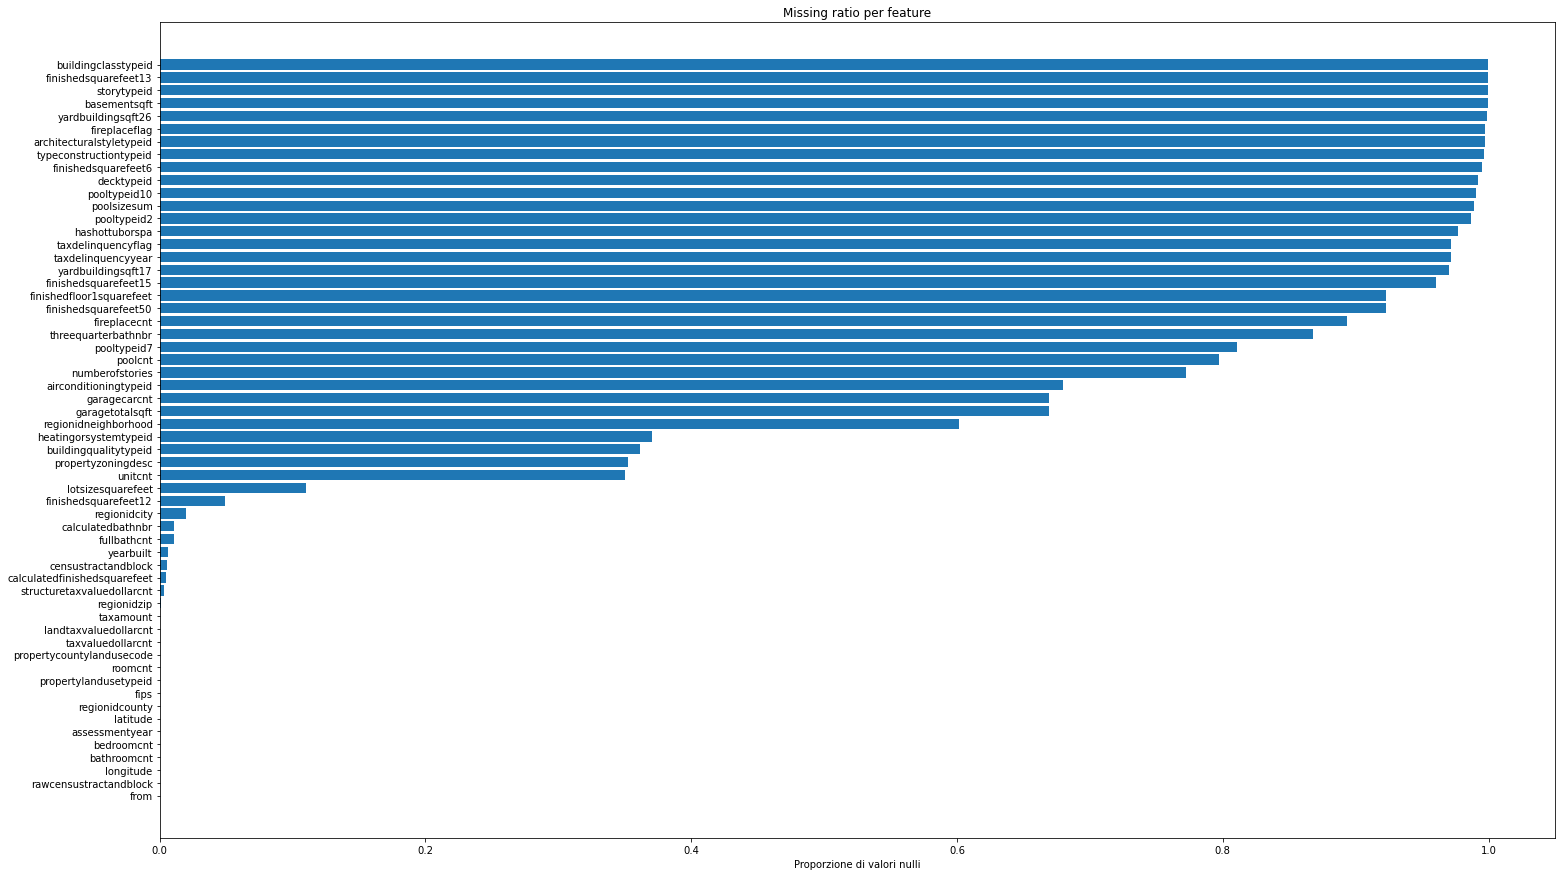

In [21]:
def missingRatioBarh(properties):
    
    """
    Funzione che genera un grafico rappresentante la proporzione di valori nulli per feature.
    """
    
    missing_values=properties.isnull().sum(axis=0)

    missing_ratio=(missing_values.sort_values(ascending=True)/properties.shape[0])

    fig,ax=plt.subplots(figsize=(25,15))
    
    ax.set_title('Missing ratio per feature')
    ax.set_xlabel("Proporzione di valori nulli")
    
    plt.barh(y=missing_ratio.index,width=missing_ratio.values)
    
    
missingRatioBarh(merged_prop)

In [22]:
"""
creazione dei dataset di train e test campionando randomicamente i dataset `merged_prop` e `logerror`
"""

train_X,test_X,train_Y,test_Y=train_test_split(merged_prop,logerror,test_size=0.33,random_state=42)

train_X=train_X.reset_index(drop=True).copy()
train_Y=train_Y.reset_index(drop=True).copy()
test_X=test_X.reset_index(drop=True).copy()
test_Y=test_Y.reset_index(drop=True).copy()


In [23]:
train_X

airconditioningtypeid  architecturalstyletypeid  basementsqft  \
0                         NaN                       NaN           NaN   
1                         NaN                       NaN           NaN   
2                         NaN                       NaN           NaN   
3                         NaN                       NaN           NaN   
4                         NaN                       NaN           NaN   
...                       ...                       ...           ...   
224964                    1.0                       NaN           NaN   
224965                   13.0                       NaN           NaN   
224966                    NaN                       NaN           NaN   
224967                    NaN                       NaN           NaN   
224968                    NaN                       NaN           NaN   

        bathroomcnt  bedroomcnt  buildingclasstypeid  buildingqualitytypeid  \
0               4.0         5.0                  NaN                    NaN   
1               4.0         3.0                  NaN                    8.0   
2               2.0         4.0                  NaN                    4.0   
3               2.0         3.0                  NaN                    7.0   
4               2.0         3.0                  NaN                    4.0   
...             ...         ...                  ...                    ...   
224964          1.0         2.0                  NaN                    6.0   
224965          2.5         4.0                  NaN                    NaN   
224966          4.0         8.0                  NaN                    7.0   
224967          1.0         3.0                  NaN                    4.0   
224968          4.0         5.0                  NaN                    7.0   

        calculatedbathnbr  decktypeid  finishedfloor1squarefeet  ...  \
0                     4.0         NaN                       NaN  ...   
1                     4.0         NaN                       NaN  ...   
2                     2.0         NaN                       NaN  ...   
3                     2.0         NaN                       NaN  ...   
4                     2.0         NaN                       NaN  ...   
...                   ...         ...                       ...  ...   
224964                1.0         NaN                       NaN  ...   
224965                2.5         NaN                       NaN  ...   
224966                4.0         NaN                       NaN  ...   
224967                1.0         NaN                       NaN  ...   
224968                4.0         NaN                       NaN  ...   

        fireplaceflag  structuretaxvaluedollarcnt  taxvaluedollarcnt  \
0                 NaN                    657051.0          1361000.0   
1                 NaN                    217091.0           414675.0   
2                 NaN                    263833.0           438014.0   
3                 NaN                     59132.0            74204.0   
4                 NaN                    135192.0           225315.0   
...               ...                         ...                ...   
224964            NaN                    253812.0          1269062.0   
224965            NaN                    137709.0           236723.0   
224966            NaN                    241000.0           681000.0   
224967            NaN                     78506.0            98129.0   
224968            NaN                     59939.0           879627.0   

        assessmentyear  landtaxvaluedollarcnt  taxamount  taxdelinquencyflag  \
0               2016.0               703949.0   18898.14                 NaN   
1               2016.0               197584.0    5258.18                 NaN   
2               2015.0               174181.0    5525.36                 NaN   
3               2015.0                15072.0    5862.16                 NaN   
4               2015.0                90123.0    297

In [24]:
train_Y

logerror
0       0.040200
1       0.096200
2      -0.050290
3       0.046900
4      -0.024300
...          ...
224964 -0.032908
224965 -0.052300
224966  0.083400
224967  0.026600
224968  0.073774

[224969 rows x 1 columns]

In [25]:
test_X

airconditioningtypeid  architecturalstyletypeid  basementsqft  \
0                         1.0                       NaN           NaN   
1                         NaN                       NaN           NaN   
2                         1.0                       NaN           NaN   
3                         NaN                       NaN           NaN   
4                         NaN                       NaN           NaN   
...                       ...                       ...           ...   
110802                    NaN                       NaN           NaN   
110803                    NaN                       NaN           NaN   
110804                    NaN                       NaN           NaN   
110805                    NaN                       NaN           NaN   
110806                    NaN                       NaN           NaN   

        bathroomcnt  bedroomcnt  buildingclasstypeid  buildingqualitytypeid  \
0               2.0         3.0                  NaN                    8.0   
1               3.0         3.0                  NaN                    8.0   
2               2.0         3.0                  NaN                    8.0   
3               2.0         3.0                  NaN                    8.0   
4               1.0         2.0                  NaN                    4.0   
...             ...         ...                  ...                    ...   
110802          2.5         3.0                  NaN                    NaN   
110803          2.5         3.0                  NaN                    NaN   
110804          2.0         4.0                  NaN                    7.0   
110805          2.5         4.0                  NaN                    NaN   
110806          3.0         2.0                  NaN                    NaN   

        calculatedbathnbr  decktypeid  finishedfloor1squarefeet  ...  \
0                     2.0         NaN                       NaN  ...   
1                     3.0         NaN                       NaN  ...   
2                     2.0         NaN                       NaN  ...   
3                     2.0         NaN                       NaN  ...   
4                     1.0         NaN                       NaN  ...   
...                   ...         ...                       ...  ...   
110802                2.5         NaN                       NaN  ...   
110803                2.5         NaN                       NaN  ...   
110804                2.0         NaN                       NaN  ...   
110805                2.5         NaN                       NaN  ...   
110806                3.0         NaN                       NaN  ...   

        fireplaceflag  structuretaxvaluedollarcnt  taxvaluedollarcnt  \
0                 NaN                    188381.0           350030.0   
1                 NaN                    131231.0           355128.0   
2                 NaN                    231130.0           288911.0   
3                 NaN                     84286.0           338022.0   
4                 NaN                     73707.0           368535.0   
...               ...                         ...                ...   
110802            NaN                    157395.0           319826.0   
110803            NaN                    158800.0           565401.0   
110804            NaN                    104773.0           182503.0   
110805            NaN                    277797.0           450163.0   
110806            NaN                    258053.0           614766.0   

        assessmentyear  landtaxvaluedollarcnt  taxamount  taxdelinquencyflag  \
0               2016.0               161649.0    4302.85                 NaN   
1               2016.0               223897.0    4307.85                 NaN   
2               2016.0                57781.0    4405.25                 NaN   
3               2016.0               253736.0    4085.32                 NaN   
4               2016.0               294828.0    451

In [26]:
test_Y

logerror
0       0.302882
1       0.022478
2      -0.006000
3      -0.008350
4      -0.175500
...          ...
110802 -0.025781
110803  0.063551
110804  0.135400
110805 -0.028400
110806  0.090189

[110807 rows x 1 columns]

In [27]:
del merged_prop,logerror
gc.collect()

10100

In [28]:
def tryDic(unique_dic_train,x):
    """
    Funzione che restituisce il valore nel dizionario `unique_dic_train` con chiave `x`. Se `x` e' non presente nel dizionario ritorno -1.

    Args:
        unique_dic_train (dict): dizionario contenente gli id numerici delle categorie associati alla categoria.
        x (int): nome categoria

    Returns:
        (int): id numerico categoria se presente nel dizionario, -1 altrimenti.
    """
    try:
        return unique_dic_train[x]
    except:
        return -1
    

def isPresent(series,value):
    """
    Funzione di supporto a 'resize_range': controlla che value sia presente in series.

    Args:
        series (pd.Series): series.
        value (int): id.

    Returns:
        (boolean): True: valore presente, False: valore assente.
    """
    for e in series:
        if e == value:
            return True
        
    return False

def resize_range(list):
    
    """
    Funzione che per ogni feature categoriale prende le prime 5 categorie piu' numerose nel dataset di train e le converte utilizzando un id numerico.
    Inoltre aggiunge una categoria "altro" con id "-1".
    
    Esegue lo stesso procedimento anche per il dataset di test.
    
    Inserisce le categorie presenti nel dataset di train anche nel dataset di test per avere le stesse colonne.

    Args:
        list (list of String): lista di features.
    """
    for e in list:
          
        values=train_X[e].value_counts().head(5).index
        unique_dic={e:i for i,e in enumerate(values)}
        
        train_X[e]=train_X[e].apply(func=(lambda x: tryDic(unique_dic,x) ))
        
        if not isPresent(train_X[e],-1):
            train_X[e+'_-1']=0
        
        test_X[e]=test_X[e].apply(func=(lambda x: tryDic(unique_dic,x) ))
        
        if not isPresent(test_X[e],-1):
            test_X[e+'_-1']=0
            
        for k,v in unique_dic.items():
            if not isPresent(test_X[e],v):
                test_X[e+'_'+str(v)]=0
            

quantitative_features=['bathroomcnt','bedroomcnt','buildingqualitytypeid'
                        ,'finishedfloor1squarefeet','calculatedfinishedsquarefeet'
                        ,'finishedsquarefeet6','finishedsquarefeet13','finishedsquarefeet15'
                        ,'garagecarcnt','garagetotalsqft','lotsizesquarefeet','numberofstories'
                        ,'roomcnt','unitcnt','yardbuildingsqft17','yardbuildingsqft26'
                        ,'taxvaluedollarcnt','structuretaxvaluedollarcnt','landtaxvaluedollarcnt'
                        ,'threequarterbathnbr','fullbathcnt','latitude','longitude','taxamount'
                        ,'fireplacecnt','yearbuilt','poolcnt','poolsizesum','basementsqft'] #media e correlazione

categorial_features=['airconditioningtypeid','architecturalstyletypeid','buildingclasstypeid'
                        ,'decktypeid','fips','heatingorsystemtypeid','regionidcounty','regionidzip'
                        ,'regionidneighborhood','typeconstructiontypeid','censustractandblock'
                        ,'propertycountylandusecode','propertylandusetypeid','propertyzoningdesc'
                        ,'taxdelinquencyyear','storytypeid','taxdelinquencyflag','regionidcity'
                        ,'assessmentyear'] #moda

zero_features=['airconditioningtypeid','basementsqft','fireplacecnt','poolcnt','poolsizesum'
            ,'regionidcity','storytypeid','decktypeid','pooltypeid10','pooltypeid2','pooltypeid7'
            ,'hashottuborspa','propertycountylandusecode','propertylandusetypeid'
            ,'propertyzoningdesc','taxdelinquencyflag'] #fill with 0

def featuresMod():
    
    """
    Funzione di preparazione dei dataset di train e test:
    1) Modifica e pulizia di features
    2) Riempimento valori nulli con media o moda
    3) Applicazione del One Hot Econding per features categoriali utilizzando solo le categorie contenute in train
        
    Returns:
        (pd.Dataframe): dataset di train.
        (pd.Dataframe): dataset di test.
    """
    
    #bathroomcnt e calculatedbathnbr descrivono la stessa cosa, fillo i nan dove possibile e elimino calculatedbathnbr      
    train_X['bathroomcnt'].fillna(train_X['calculatedbathnbr'],inplace=True)
    train_X.drop('calculatedbathnbr',axis=1,inplace=True)
        
    test_X['bathroomcnt'].fillna(test_X['calculatedbathnbr'],inplace=True)
    test_X.drop('calculatedbathnbr',axis=1,inplace=True)

    #decktypeid ha un unico valore (66.0) che rappresenta la presenza di un molo, nel caso il molo non ci sia presenta nan: trasformo in variabile categoriale booleana
    train_X['decktypeid'].replace(66,1,inplace=True)
    
    test_X['decktypeid'].replace(66,1,inplace=True)
    
    #storytypeid possiede solo un valore che indica un basement all'interno di una casa. Creo un categoria '0' che rappresenta l'assenza del basement
    train_X['storytypeid'].replace(7,1,inplace=True)
    
    test_X['storytypeid'].replace(7,1,inplace=True)
    
    #finishedsquarefeet50 e' uguale a finishedfloor1squarefeet, elimino
    train_X['finishedfloor1squarefeet'].fillna(train_X['finishedsquarefeet50'],inplace=True)
    train_X.drop('finishedsquarefeet50',axis=1,inplace=True)
    
    test_X['finishedfloor1squarefeet'].fillna(test_X['finishedsquarefeet50'],inplace=True)
    test_X.drop('finishedsquarefeet50',axis=1,inplace=True)

    #calculatedfinishedsquarefeet e' uguale a finishedsquarefeet12
    train_X['calculatedfinishedsquarefeet'].fillna(train_X['finishedsquarefeet12'],inplace=True)
    train_X.drop('finishedsquarefeet12',axis=1,inplace=True)

    test_X['calculatedfinishedsquarefeet'].fillna(test_X['finishedsquarefeet12'],inplace=True)
    test_X.drop('finishedsquarefeet12',axis=1,inplace=True)

    #fireplacecnt descrive il numero di camini nella casa, mentre 'fireplaceflag' descrive la presenza o meno del camino in casa: 
    #metto 0 dove c'e' nan in fireplacecnt e elimino fireplaceflag
    train_X.drop('fireplaceflag',axis=1,inplace=True)
    
    test_X.drop('fireplaceflag',axis=1,inplace=True)
 
    #'rawcensustractandblock' e 'censustractandblock' descrivono la stessa cosa ma in scala diversa: 
    #fillo i nan di 'censustractandblock' con rawcensustractandblock 
    #e per il resto tengo la moda, elimino rawcensustractandblock
    train_X['censustractandblock'].fillna(train_X['rawcensustractandblock']*1.0e+06,inplace=True)
    train_X.drop('rawcensustractandblock',axis=1,inplace=True)
    
    test_X['censustractandblock'].fillna(test_X['rawcensustractandblock']*1.0e+06,inplace=True)
    test_X.drop('rawcensustractandblock',axis=1,inplace=True)

    #hashottuborspa presenza nan al posto di False, trasformo 'hashottuborspa' in numerica
    train_X['hashottuborspa'].replace(True,1,inplace=True)
    
    test_X['hashottuborspa'].replace(True,1,inplace=True)

    #taxdelinquencyflag presenza nan al posto di False,, trasformo 'taxdelinquencyflag' in numerica
    train_X['taxdelinquencyflag'].replace('Y',1,inplace=True)
    
    test_X['taxdelinquencyflag'].replace('Y',1,inplace=True)

    #trasformo yearbuilt in variabile quantitativa rappresentante l'eta'
    train_X['yearbuilt'].fillna(train_X['yearbuilt'].mode(),inplace=True)
    train_X['yearbuilt']=train_X["from"]-train_X['yearbuilt']
    
    test_X['yearbuilt'].fillna(test_X['yearbuilt'].mode(),inplace=True)
    test_X['yearbuilt']=test_X["from"]-test_X['yearbuilt']
    
    
    train_X["from"]=train_X["from"].apply(lambda x: 1 if x==2016 else 0)
    test_X["from"]=test_X["from"].apply(lambda x: 1 if x==2016 else 0)
    
    for col in zero_features:
        train_X[col].fillna(0,inplace=True)
        test_X[col].fillna(0,inplace=True)
        
    for col in quantitative_features:
        train_X[col].fillna(train_X[col].mean(),inplace=True)
        test_X[col].fillna(train_X[col].mean(),inplace=True)
        
    for col in categorial_features:
        train_X[col].fillna(train_X[col].mode()[0],inplace=True)
        test_X[col].fillna(train_X[col].mode()[0],inplace=True)
        
    
    resize_range(categorial_features)
    
    return pd.get_dummies(train_X, columns=categorial_features),pd.get_dummies(test_X, columns=categorial_features)

train_X,test_X=featuresMod()

In [29]:
train_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224969 entries, 0 to 224968
Columns: 129 entries, basementsqft to assessmentyear_2
dtypes: float64(33), int64(9), uint8(87)
memory usage: 90.8 MB


In [30]:
test_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110807 entries, 0 to 110806
Columns: 129 entries, basementsqft to assessmentyear_1
dtypes: float64(33), int64(14), uint8(82)
memory usage: 48.4 MB


In [31]:
train_X.sort_index(axis=1,inplace=True)
test_X.sort_index(axis=1,inplace=True)

In [32]:
train_X

airconditioningtypeid_-1  airconditioningtypeid_0  \
0                              0                        1   
1                              0                        1   
2                              0                        1   
3                              0                        1   
4                              0                        1   
...                          ...                      ...   
224964                         0                        0   
224965                         0                        0   
224966                         0                        1   
224967                         0                        1   
224968                         0                        1   

        airconditioningtypeid_1  airconditioningtypeid_2  \
0                             0                        0   
1                             0                        0   
2                             0                        0   
3                             0                        0   
4                             0                        0   
...                         ...                      ...   
224964                        1                        0   
224965                        0                        1   
224966                        0                        0   
224967                        0                        0   
224968                        0                        0   

        airconditioningtypeid_3  airconditioningtypeid_4  \
0                             0                        0   
1                             0                        0   
2                             0                        0   
3                             0                        0   
4                             0                        0   
...                         ...                      ...   
224964                        0                        0   
224965                        0                        0   
224966                        0                        0   
224967                        0                        0   
224968                        0                        0   

        architecturalstyletypeid_-1  architecturalstyletypeid_0  \
0                                 0                           1   
1                                 0                           1   
2                                 0                           1   
3                                 0                           1   
4                                 0                           1   
...                             ...                         ...   
224964                            0                           1   
224965                            0                           1   
224966                            0                           1   
224967                            0                           1   
224968                            0                           1   

        architecturalstyletypeid_1  architecturalstyletypeid_2  ...  \
0                                0                           0  ...   
1                                0                           0  ...   
2                                0                           0  ...   
3                                0                           0  ...   
4                                0                           0  ...   
...                            ...                         ...  ...   
224964                           0                           0  ...   
224965                           0                           0  ...   
224966                           0                           0  ...   
224967                           0                           0  ...   
224968                           0                           0  ...   

        threequarterbathnbr  typeconstructiontypeid_-1  \
0                  1.009503                          0   
1                  1.009503                          0   
2

In [33]:
test_X

airconditioningtypeid_-1  airconditioningtypeid_0  \
0                              0                        0   
1                              0                        1   
2                              0                        0   
3                              0                        1   
4                              0                        1   
...                          ...                      ...   
110802                         0                        1   
110803                         0                        1   
110804                         0                        1   
110805                         0                        1   
110806                         0                        1   

        airconditioningtypeid_1  airconditioningtypeid_2  \
0                             1                        0   
1                             0                        0   
2                             1                        0   
3                             0                        0   
4                             0                        0   
...                         ...                      ...   
110802                        0                        0   
110803                        0                        0   
110804                        0                        0   
110805                        0                        0   
110806                        0                        0   

        airconditioningtypeid_3  airconditioningtypeid_4  \
0                             0                        0   
1                             0                        0   
2                             0                        0   
3                             0                        0   
4                             0                        0   
...                         ...                      ...   
110802                        0                        0   
110803                        0                        0   
110804                        0                        0   
110805                        0                        0   
110806                        0                        0   

        architecturalstyletypeid_-1  architecturalstyletypeid_0  \
0                                 0                           1   
1                                 0                           1   
2                                 0                           1   
3                                 0                           1   
4                                 0                           1   
...                             ...                         ...   
110802                            0                           1   
110803                            0                           1   
110804                            0                           1   
110805                            0                           1   
110806                            0                           1   

        architecturalstyletypeid_1  architecturalstyletypeid_2  ...  \
0                                0                           0  ...   
1                                0                           0  ...   
2                                0                           0  ...   
3                                0                           0  ...   
4                                0                           0  ...   
...                            ...                         ...  ...   
110802                           0                           0  ...   
110803                           0                           0  ...   
110804                           0                           0  ...   
110805                           0                           0  ...   
110806                           0                           0  ...   

        threequarterbathnbr  typeconstructiontypeid_-1  \
0                  1.009503                          0   
1                  1.009503                          0   
2

/tmp/ipykernel_60405/1604522463.py:14: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  correlations=pd.Series()


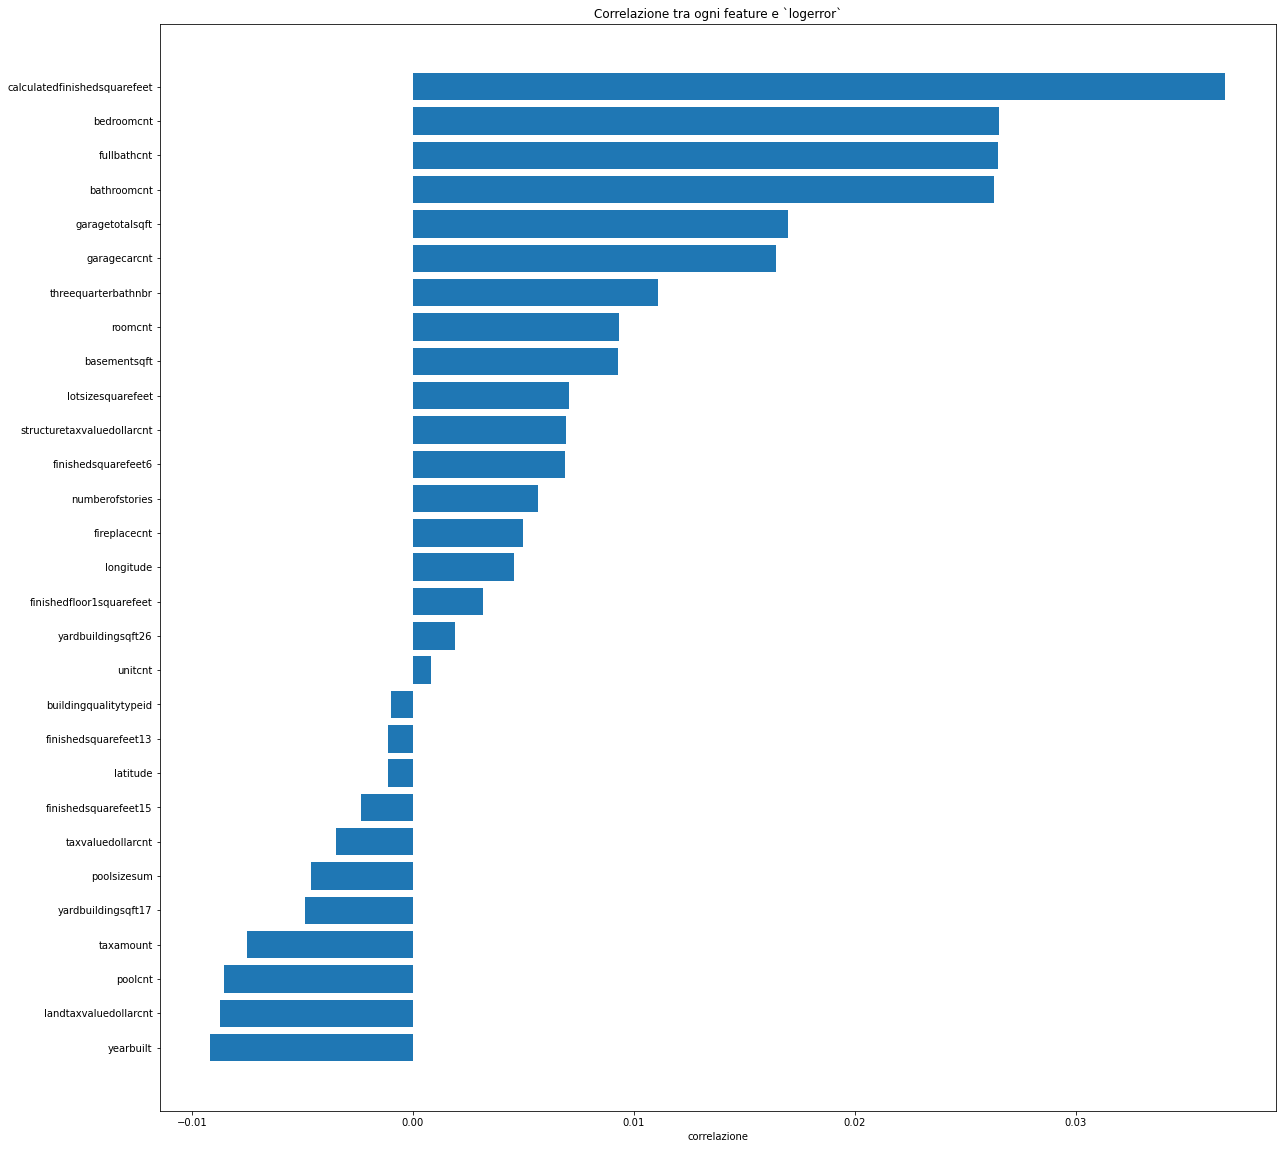

In [34]:
def correlationBarh(propertiesdataframe,logerror):
    
    """
    Funzione che calcola la correlazione tra ogni features e risposta generando un grafico.
    
    Returns:
        correlations (pd.Series): Series contenente le correlazione tra features e risposta (logerror).
    """
    tmp_float=pd.DataFrame(propertiesdataframe)
    for col in tmp_float:
        if col not in quantitative_features:
            tmp_float.drop(col,axis=1,inplace=True)

    correlations=pd.Series()
    
    for col in tmp_float:
       correlations[col]=np.corrcoef(tmp_float[col],logerror["logerror"])[0,1]

    correlations.sort_values(inplace=True)
    correlations.fillna(0,inplace=True)

    fig, ax=plt.subplots(figsize=(20,20))
    
    ax.set_title('Correlazione tra ogni feature e `logerror`')
    
    ax.set_xlabel("correlazione")

    ax.barh(y=correlations.index,width=correlations.values)
    
    return correlations

correlation=correlationBarh(train_X,train_Y)

In [35]:
correlation

yearbuilt                      -0.009172
landtaxvaluedollarcnt          -0.008717
poolcnt                        -0.008576
taxamount                      -0.007504
yardbuildingsqft17             -0.004903
poolsizesum                    -0.004612
taxvaluedollarcnt              -0.003473
finishedsquarefeet15           -0.002373
latitude                       -0.001147
finishedsquarefeet13           -0.001140
buildingqualitytypeid          -0.001012
unitcnt                         0.000800
yardbuildingsqft26              0.001886
finishedfloor1squarefeet        0.003172
longitude                       0.004579
fireplacecnt                    0.004992
numberofstories                 0.005643
finishedsquarefeet6             0.006882
structuretaxvaluedollarcnt      0.006930
lotsizesquarefeet               0.007063
basementsqft                    0.009287
roomcnt                         0.009347
threequarterbathnbr             0.011101
garagecarcnt                    0.016420
garagetotalsqft 

In [36]:
del correlation,quantitative_features

gc.collect()

6161

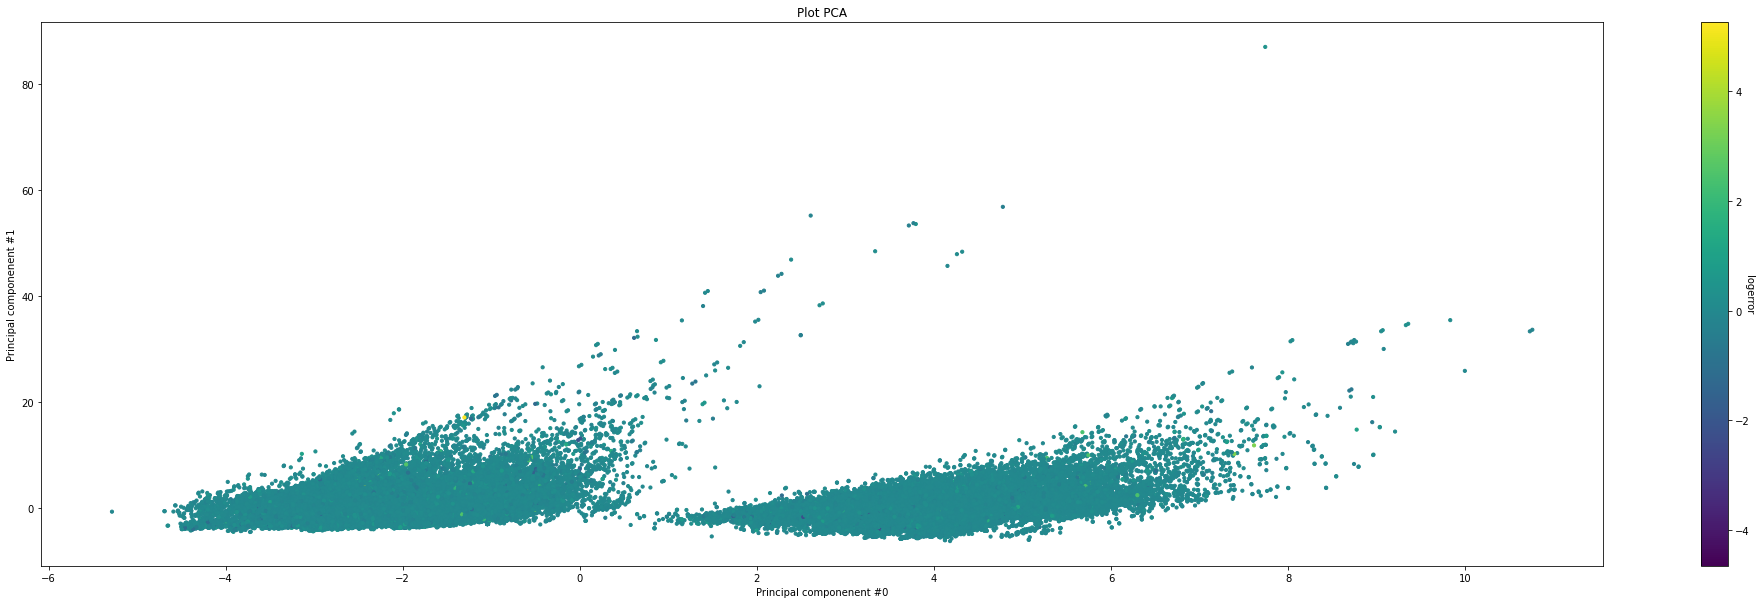

In [37]:
def pca_prop(merged_prop,logerror,year=None):
    """
    Funzione che genera un grafico delle features riducendo il numero di dimensioni tramite PCA.

    Args:
        merged_prop (pd.Dataframe): dataframe features.
        logerror (pd.Dataframe): dataframe risposta.
        year (int, optional): anno da prendere in considerazione per generare il grafico: 0=2016, 1=2017. Defaults prende in cosiderazione tutti e due gli anni.
    """

    if year!=None:
        tmp=merged_prop[merged_prop["from"]==year]
    else:
        tmp=merged_prop
    
    standardscaler=StandardScaler()
    standardscaler.fit(tmp)
    
    rescaled_merged_prop=standardscaler.transform(tmp)
    
    pca=PCA(2)
    x_trans=pca.fit_transform(rescaled_merged_prop)
    
    fig,ax=plt.subplots(figsize=(35,10))
    
    ax.set_title('Plot PCA')
    
    ax.set_xlabel("Principal componenent #0")
    ax.set_ylabel("Principal componenent #1")
      
    scat=ax.scatter(x_trans[:,0],x_trans[:,1],s=10,c=logerror.iloc[tmp.index].to_numpy())
    
    cbar=plt.colorbar(scat)
    
    cbar.ax.set_ylabel('logerror', rotation=270)
    
pca_prop(train_X,train_Y,None)

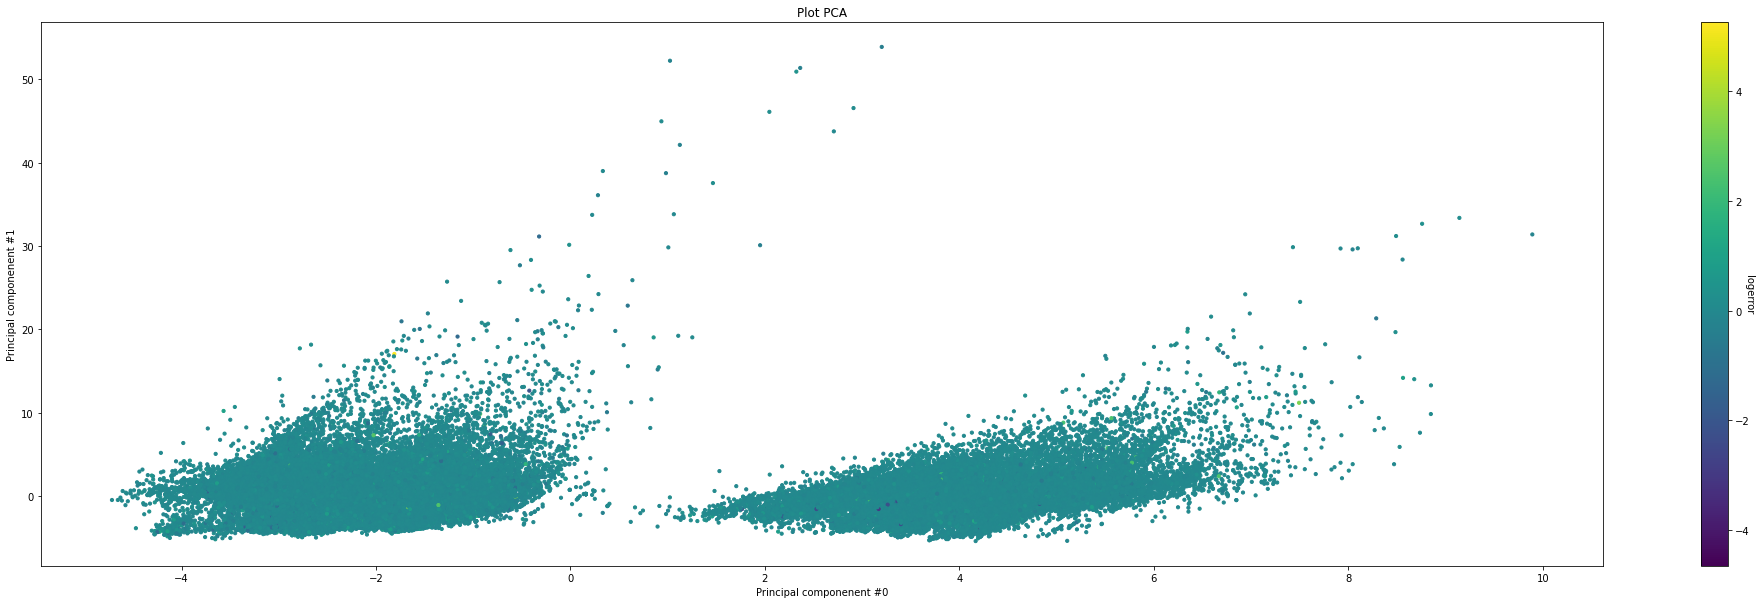

In [38]:
pca_prop(train_X,train_Y,0)

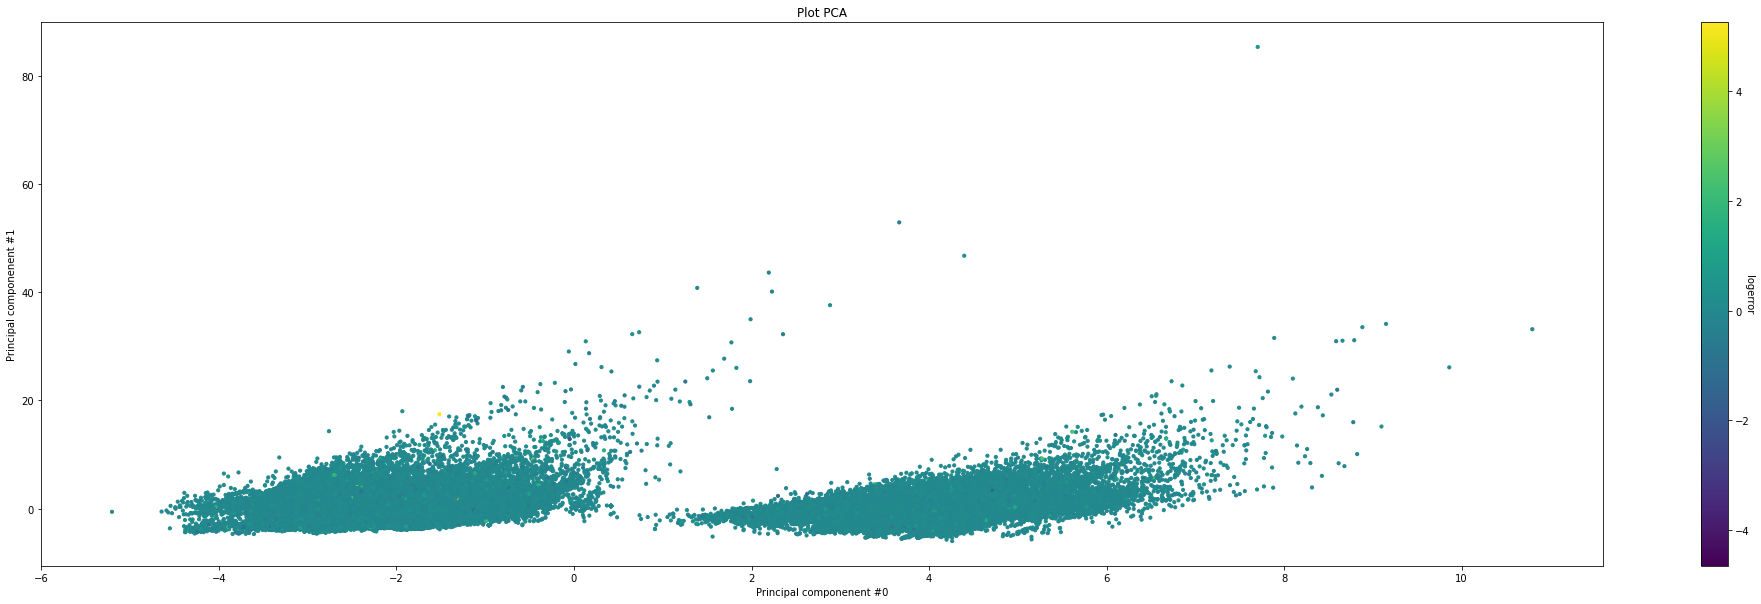

In [39]:
pca_prop(train_X,train_Y,1)

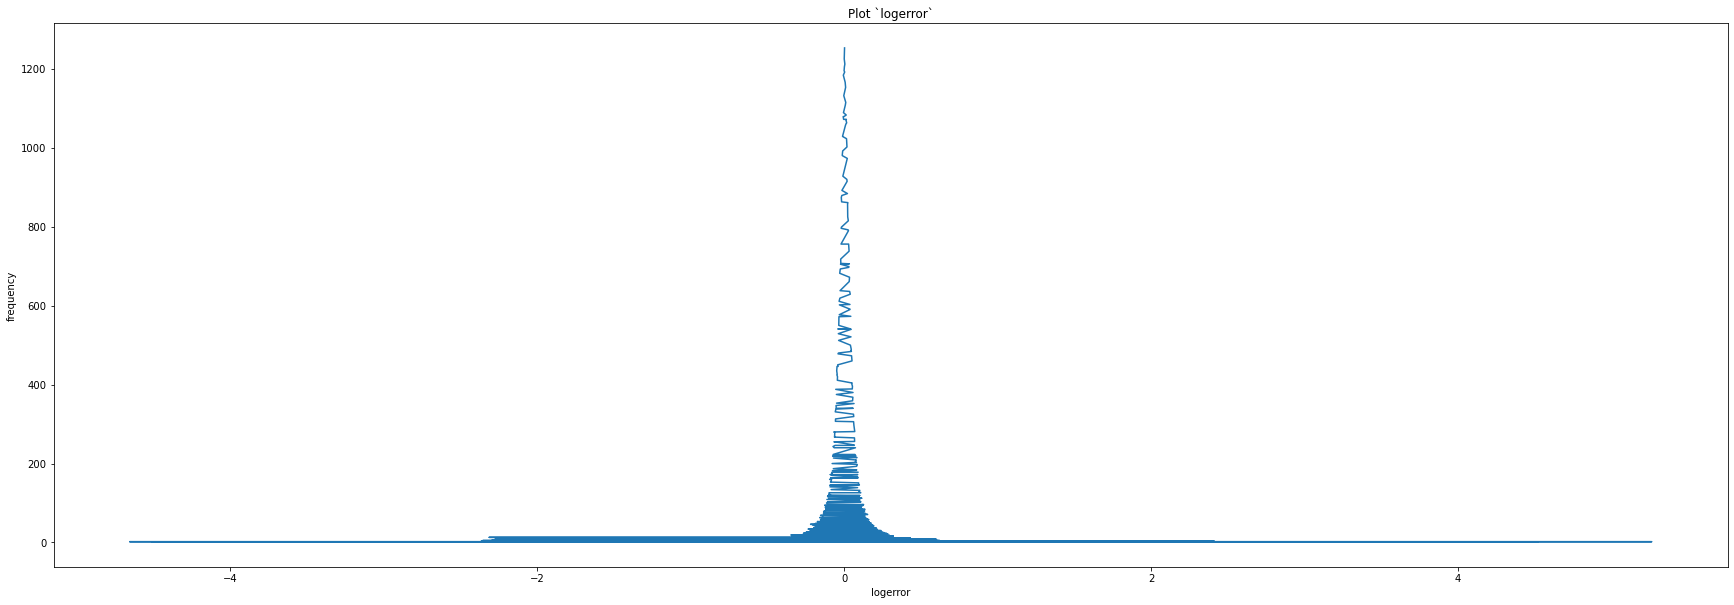

In [40]:
def plot_logerror():
    
    """
    Funzione che genera un grafico della risposta.
    """
    fig,ax=plt.subplots(figsize=(30,10))
    train_Y['logerror'].value_counts().plot(ax=ax, kind="line", xlabel='logerror', ylabel='frequency')
    
    ax.set_title('Plot `logerror`')
    
plot_logerror()

N outlier rimossi:  11248 / 224969


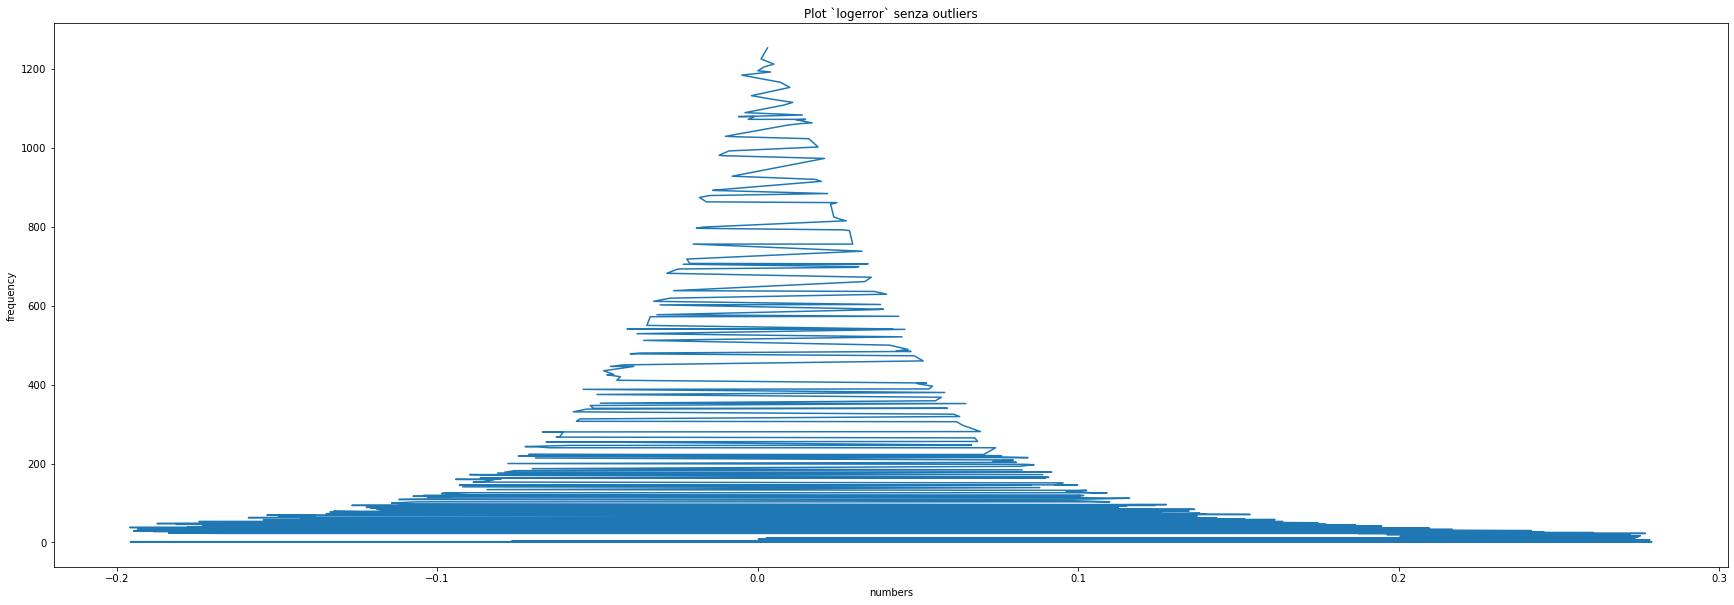

In [41]:
def plot_logerror_no_outliers(logerror):
    
    """
    Funzione che genera un grafico della risposta una volta tolto il 2.5% dei valori per ogni coda.
    
    Args:
        logerror (pd.Dataframe): dataframe logerror.
    """
    n_row=logerror.shape[0]
    value_count=logerror['logerror'].value_counts().sort_index(ascending=True)

    left=0
    right=0

    no_outliers_left=[]
    no_outliers_right=[]

    for i in value_count.index:
        
        if left+(value_count.loc[i]/n_row)<0.025:
            left=left+(value_count.loc[i]/n_row)

        else:
            no_outliers_left.append(i)
    
    for i in value_count.index[::-1]:
        
        if right+(value_count.loc[i]/n_row)<0.025:
            right=right+(value_count.loc[i]/n_row)
        
        else:
            no_outliers_right.append(i)
                
    no_outliers=list(set(no_outliers_left) & set(no_outliers_right))

    logerror_outlierfree=logerror[logerror['logerror'].isin(no_outliers)]

    fig,ax=plt.subplots(figsize=(30,10))
    logerror_outlierfree['logerror'].value_counts().plot(ax=ax, kind="line", xlabel='numbers', ylabel='frequency')
    
    ax.set_title('Plot `logerror` senza outliers')

    print("N outlier rimossi: ",logerror.shape[0]-logerror_outlierfree.shape[0],"/",logerror.shape[0])
    
plot_logerror_no_outliers(train_Y)

In [42]:
def randomForestSelector():
    
    """
    Funzione di tunning per random forest regressor.
    
    Returns:
        (Object): oggetto di GridSearchCV contenente tutte le informazioni del tunning svolto.
    """
                
    rf=RandomForestRegressor(n_estimators=30)
    properties={
        #min_sample_leaf piu piccolo possibile
        #max feature piu grande possibile
        #min_samples_split piu' piccolo possibile
        #max_leaf_nodes piu' grande possibile
        #max_samples piu' alto possibile 
    }
    
    grid=GridSearchCV(rf,properties,scoring="neg_mean_squared_error",cv=8,n_jobs=-1,return_train_score=True,verbose=2)
    grid.fit(train_X,train_Y["logerror"])
    
    return grid

grid=randomForestSelector()

Fitting 8 folds for each of 1 candidates, totalling 8 fits
[CV] END .................................................... total time= 9.3min
[CV] END .................................................... total time= 9.3min
[CV] END .................................................... total time= 9.4min
[CV] END .................................................... total time= 9.5min
[CV] END .................................................... total time= 9.5min
[CV] END .................................................... total time= 9.5min
[CV] END .................................................... total time= 9.6min
[CV] END .................................................... total time= 9.6min


Best Score:  -0.019344576562869954
Best Params:  {}


mean_test_score  mean_train_score
0        -0.019345         -0.003316

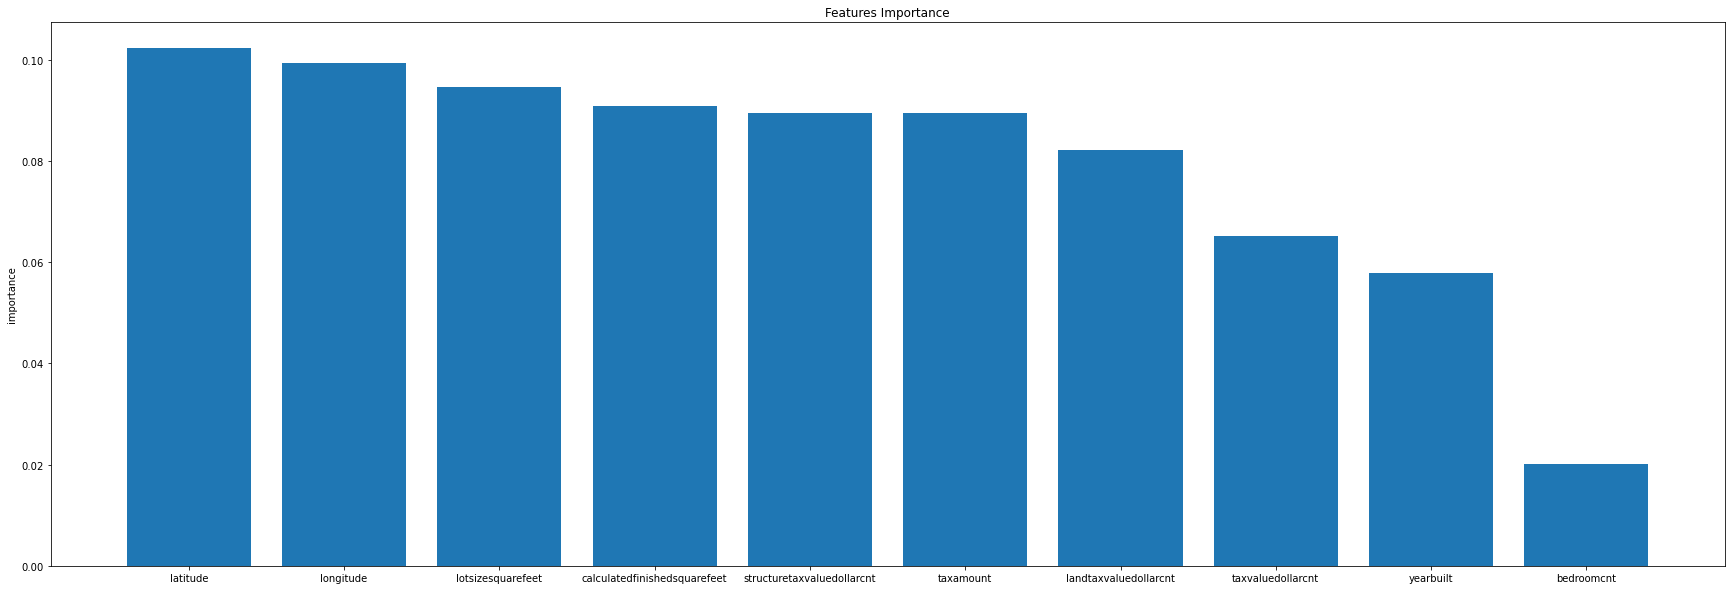

In [52]:
def featuresImportance(grid):
    
    """
    Funzione che genera un grafico di importanza di features secondo la RF tunnata precedentemente.

    Args:
        grid (Object): oggetto di GridSearchCV contenente tutte le informazioni del tunning svolto.

    Returns:
        (pd.Dataframe): dataframe contenete i risultati di GridSearchCV.
    """
    
    print ("Best Score: ",grid.best_score_)
    print ("Best Params: ", grid.best_params_)

    to_plot=pd.DataFrame()

    to_plot["features"]=train_X.columns
    to_plot["feature_importances"]=grid.best_estimator_.feature_importances_

    to_plot.sort_values("feature_importances",ascending=False,inplace=True)

    fig,ax=plt.subplots(figsize=(30,10))

    ax.bar(to_plot["features"].head(10),to_plot["feature_importances"].head(10))

    ax.set_title("Features Importance")
    
    ax.set_ylabel("importance")
    
    return pd.DataFrame(grid.cv_results_) 

result=featuresImportance(grid)

result[["mean_test_score","mean_train_score"]]

In [68]:
def featureSelection(best_RandomForestRegressor):
    
    """
    Funzione che applica la RFECV al dataset di train.
    
    Args:
        best_RandomForestRegressor (Object): Modello da utilizzare per la RFECV.
    Returns:
        selector (Object): Oggetto interno di RFECV contenente le informazioni sulla selezione delle features.
    """

    selector=RFECV(best_RandomForestRegressor, step=1,cv=8,scoring="neg_mean_squared_error",
                   min_features_to_select=1,
                   n_jobs=-1,
                   verbose=2)

    selector.fit(train_X,train_Y["logerror"])
    
    return selector

selector=featureSelection(train_X,train_Y,grid.best_estimator_) 

Fitting estimator with 129 features.
Fitting estimator with 129 features.
Fitting estimator with 129 features.
Fitting estimator with 129 features.
Fitting estimator with 129 features.
Fitting estimator with 129 features.
Fitting estimator with 129 features.
Fitting estimator with 129 features.
Fitting estimator with 128 features.
Fitting estimator with 128 features.
Fitting estimator with 128 features.
Fitting estimator with 128 features.
Fitting estimator with 128 features.
Fitting estimator with 128 features.
Fitting estimator with 128 features.
Fitting estimator with 128 features.
Fitting estimator with 127 features.
Fitting estimator with 127 features.
Fitting estimator with 127 features.
Fitting estimator with 127 features.
Fitting estimator with 127 features.
Fitting estimator with 127 features.
Fitting estimator with 127 features.
Fitting estimator with 127 features.
Fitting estimator with 126 features.
Fitting estimator with 126 features.
Fitting estimator with 126 features.
F

Numero ottimale di features:3


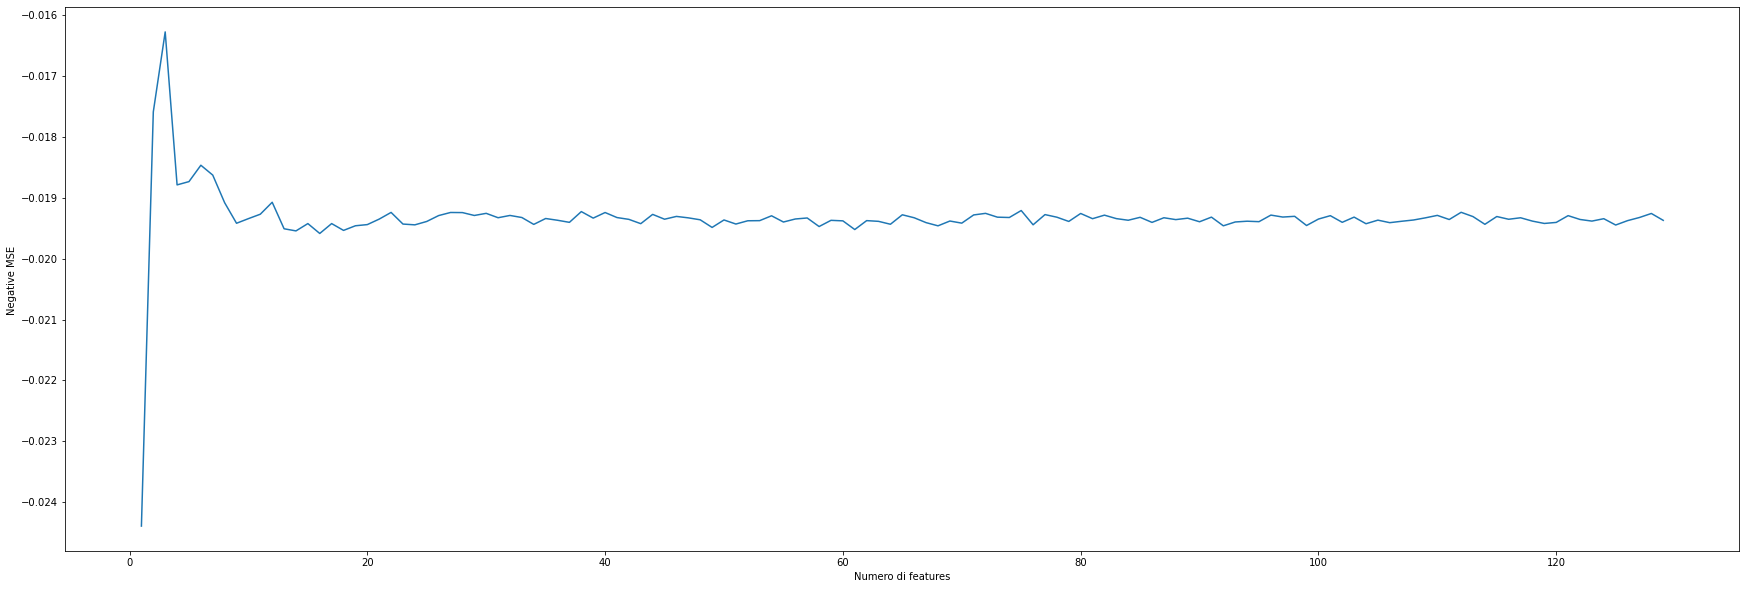

In [69]:
"""
Generazione di un grafico che mette in relazione in numero di features con il negative MSE.
"""

print("Numero ottimale di features:"+str(selector.n_features_))

plt.figure(figsize=(30,10))
plt.xlabel("Numero di features")
plt.ylabel("Negative MSE ")
plt.plot(
    range(1, len(selector.grid_scores_) + 1),
    selector.grid_scores_,
)
plt.show()

In [70]:
#seleziono le features piu' importanti
 
train_X=train_X[train_X.columns[selector.support_]]
train_X

latitude    longitude  taxamount
0       33692993.0 -117813413.0   18898.14
1       33861725.0 -118378914.0    5258.18
2       33738933.0 -118333129.0    5525.36
3       34212465.0 -118600974.0    5862.16
4       34222077.0 -118538097.0    2978.31
...            ...          ...        ...
224964  34066854.0 -118368355.0   15336.99
224965  33678270.0 -117787696.0    2549.78
224966  34162844.0 -118147128.0    8630.63
224967  33900112.0 -118227488.0    1841.57
224968  34086829.0 -118313400.0   10935.01

[224969 rows x 3 columns]

In [71]:
#seleziono le features piu' importanti

test_X=test_X[test_X.columns[selector.support_]]
test_X

latitude    longitude  taxamount
0       34196655.0 -118450767.0    4302.85
1       34125600.0 -118069000.0    4307.85
2       34632629.0 -118230893.0    4405.25
3       34269435.0 -118310210.0    4085.32
4       34175092.0 -118367966.0    4511.35
...            ...          ...        ...
110802  33686770.0 -117790831.0    3385.10
110803  33596021.0 -117716573.0    5689.92
110804  33944725.0 -118153275.0    2492.86
110805  33904759.0 -117873584.0    5238.58
110806  33598928.0 -117580776.0    7047.98

[110807 rows x 3 columns]

In [72]:
del selector,grid,result

gc.collect()

32232

In [1]:
#cella di mezzo per velocizzare esecuzione
if 'train_X' in globals():
    
    train_X.to_csv(r'./data_output/train_X.csv',index=False)
    train_Y.to_csv(r'./data_output/train_Y.csv',index=False)
    test_X.to_csv(r'./data_output/test_X.csv',index=False)
    test_Y.to_csv(r'./data_output/test_Y.csv',index=False)
else:
    import pandas as pd
    import numpy as np
    import gc
    import matplotlib.pyplot as plt

    from sklearn.decomposition import PCA

    from sklearn.feature_selection import RFECV

    from sklearn.model_selection import GridSearchCV

    from sklearn.preprocessing import StandardScaler

    from sklearn.linear_model import LinearRegression

    from sklearn.tree import DecisionTreeRegressor
    from sklearn.ensemble import AdaBoostRegressor

    from sklearn.ensemble import RandomForestRegressor

    from sklearn.model_selection import train_test_split
    from sklearn.metrics import mean_squared_error

    from IPython.display import clear_output

    train_X=pd.read_csv('data_output/train_X.csv')
    train_Y=pd.read_csv('data_output/train_Y.csv')

    test_X=pd.read_csv('data_output/test_X.csv')
    test_Y=pd.read_csv('data_output/test_Y.csv')

In [2]:
from mlxtend.evaluate import bias_variance_decomp

def bias_variance(model):
    
    """
    Funzione che genera un grafico della decomposizione del MSE.
    """
    
    mse, bias, var = bias_variance_decomp(model,
                                            train_X.values,train_Y["logerror"].values,
                                            test_X.values,test_Y["logerror"].values,
                                            loss='mse', num_rounds=20, random_seed=1)
    
    
    print(
        "{0}: {1:.30f} (error) = {2:.30f} (bias^2) + {3:.30f} (var)".format(
            "Decomposizione: ",mse, bias, var
        ))
        
    
    fig,ax=plt.subplots(figsize=(20,10))
    
    ax.set_title('bias-variance decomposition')
    
    ax.plot([x for x in range(1,11)],np.repeat(bias,10),'o:',label="bias^2")
    ax.plot([x for x in range(1,11)],np.repeat(var,10),'o:',label="variance")
    ax.plot([x for x in range(1,11)],np.repeat(mse,10),'o:',label="mse")
    
    ax.grid()
    ax.legend()
    

Algoritmi:

Vengono definite delle funzioni con nome `NomeModelloSelector` il cui scopo e' quello di eseguire un `GridSearchCV` per il modello specificato.

Linear Regression:

In [3]:
def LinearRegressionSelector(X,Y):
           
    model=LinearRegression()
    properties={'fit_intercept':[True,False],'normalize':[True,False],'positive':[True,False]}
    
    grid=GridSearchCV(model,properties,scoring="neg_mean_squared_error",cv=15,n_jobs=-1,return_train_score=True,verbose=2)
    grid.fit(X,Y)
    
    clear_output(wait=True)
    
    result=pd.DataFrame(grid.cv_results_)
    
    
    print ("Best Score: ",grid.best_score_)
    print ("Best Params: ", grid.best_params_)
    
    return grid.best_estimator_,result

In [4]:
best_LinearRegressor,result_lr=LinearRegressionSelector(train_X,train_Y)
result_lr[["param_fit_intercept","param_normalize","param_positive","mean_test_score","mean_train_score"]]

Best Score:  -0.027219356091746416
Best Params:  {'fit_intercept': True, 'normalize': True, 'positive': True}


param_fit_intercept param_normalize param_positive  mean_test_score  \
0                True            True           True        -0.027219   
1                True            True          False        -0.027219   
2                True           False           True        -0.027219   
3                True           False          False        -0.027219   
4               False            True           True        -0.027220   
5               False            True          False        -0.027220   
6               False           False           True        -0.027220   
7               False           False          False        -0.027220   

   mean_train_score  
0         -0.027218  
1         -0.027217  
2         -0.027218  
3         -0.027217  
4         -0.027219  
5         -0.027218  
6         -0.027219  
7         -0.027218

In [5]:
print("Risultati per regressione lineare: ")
print("mse: "+str(mean_squared_error(y_true=test_Y,y_pred=best_LinearRegressor.predict(test_X))))

Risultati per regressione lineare: 
mse: 0.02794294912909073


Decomposizione: : 0.027943087500409007767343538831 (error) = 0.027942859277569617043601724049 (bias^2) + 0.000000228222839392798284321285 (var)


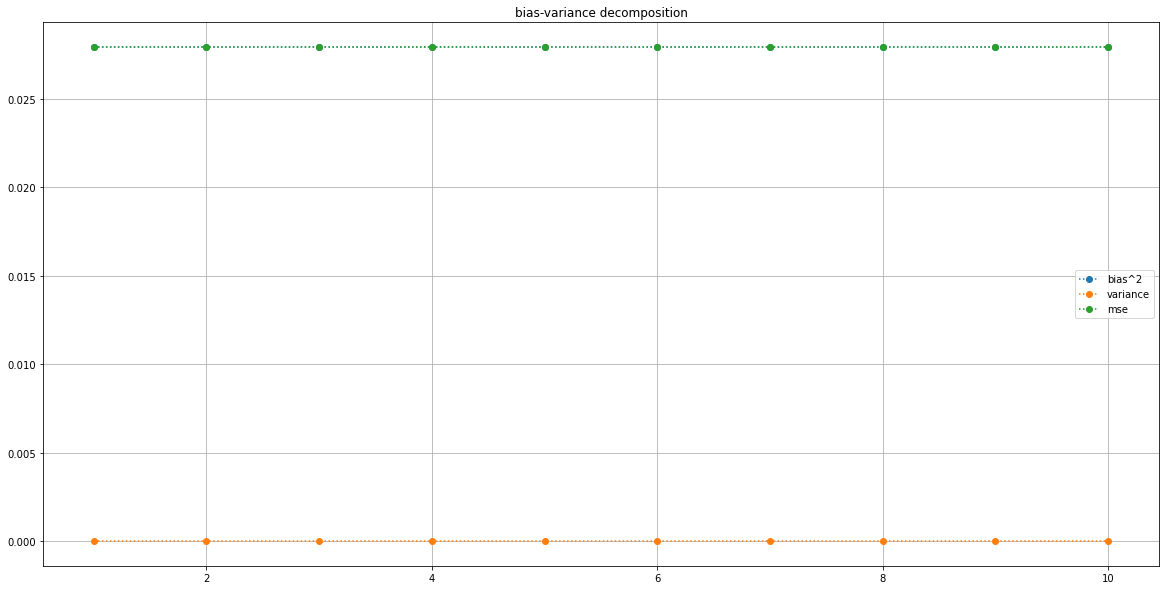

In [6]:
bias_variance(best_LinearRegressor)

Decision Tree

In [7]:
def DecisionTreeRegressorSelection(X,Y):
    
    dt=DecisionTreeRegressor()
    properties={
                #min_samples_leaf e min_samples_split non danno risultati significativi quando tunnati: minimo possibile
                'max_leaf_nodes':[x for x in range(220,450,10)],
                'max_features':[0.9,0.95,"auto"]
                }
    
    grid=GridSearchCV(dt,properties,scoring="neg_mean_squared_error",cv=8,return_train_score=True,verbose=2,n_jobs=-1)

    grid.fit(X,Y)
    
    clear_output(wait=True)
        
    result=pd.DataFrame(grid.cv_results_)
    
    print ("Best Score: ",grid.best_score_)
    print ("Best Params: ", grid.best_params_)
    
    return grid.best_estimator_,result

In [8]:
best_DecisionTreeRegressor,result_dt=DecisionTreeRegressorSelection(train_X,train_Y)

result_dt[["mean_test_score","mean_train_score"]]

Best Score:  -0.026560960721467915
Best Params:  {'max_features': 0.95, 'max_leaf_nodes': 340}


mean_test_score  mean_train_score
0         -0.027256         -0.024637
1         -0.027019         -0.024570
2         -0.027317         -0.024633
3         -0.027024         -0.024381
4         -0.026851         -0.024126
..              ...               ...
64        -0.027052         -0.022910
65        -0.027037         -0.022836
66        -0.026922         -0.022777
67        -0.026952         -0.022729
68        -0.027106         -0.022688

[69 rows x 2 columns]

In [9]:
print("Risultati per decision tree: ")
print("mse: "+str(mean_squared_error(y_true=test_Y,y_pred=best_DecisionTreeRegressor.predict(test_X))))

Risultati per decision tree: 
mse: 0.026581681903204812


Decomposizione: : 0.028538423747264139718193831641 (error) = 0.025782962518337008278601629740 (bias^2) + 0.002755461228927135776400891842 (var)


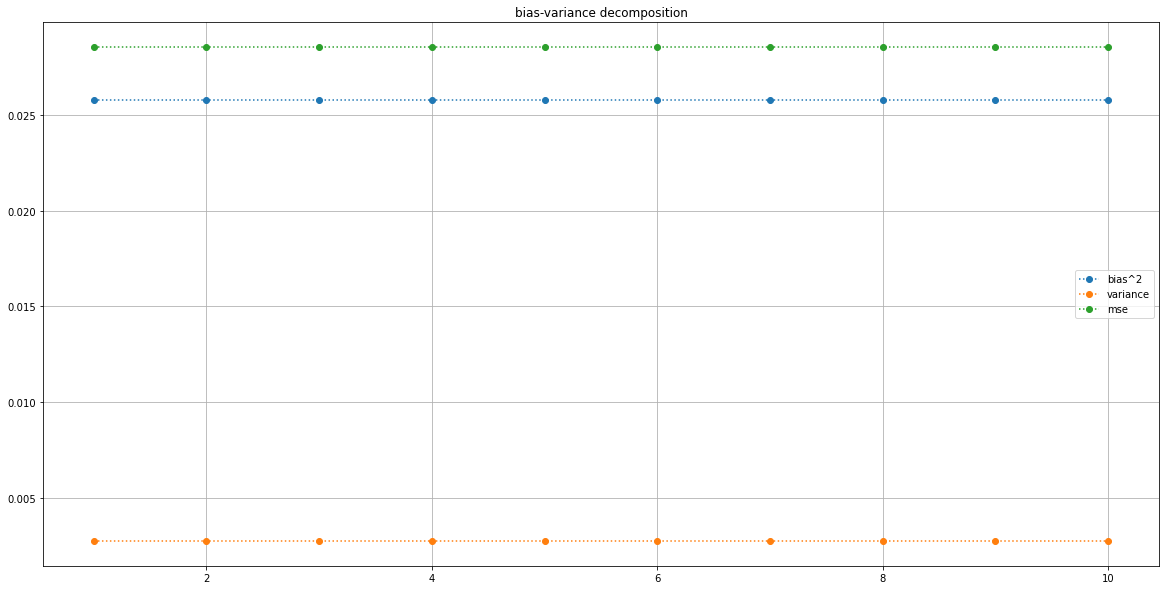

In [10]:
bias_variance(best_DecisionTreeRegressor)

In [11]:
def AdaBoostRegressor_Selection(X,Y,base_estimator):
    
    properties={
        'base_estimator':[base_estimator],
        'n_estimators':[x for x in range(5,45,5)],
        'learning_rate':[0.007,0.0075,0.008]        
        }
    
    grid=GridSearchCV(AdaBoostRegressor(),properties,scoring="neg_mean_squared_error",cv=8,return_train_score=True,verbose=2,n_jobs=-1)
    grid.fit(X,Y["logerror"])
    
    clear_output(wait=True)
        
    result=pd.DataFrame(grid.cv_results_)
    
    print ("Best Score: ",grid.best_score_)
    print ("Best Params: ", grid.best_params_)
    
    return grid.best_estimator_,result

In [12]:
best_AdaBoostRegressor,result_boosting=AdaBoostRegressor_Selection(train_X,train_Y,best_DecisionTreeRegressor)
result_boosting[["param_n_estimators","param_learning_rate","mean_test_score","mean_train_score"]]

Best Score:  -0.02615107876637355
Best Params:  {'base_estimator': DecisionTreeRegressor(max_features=0.95, max_leaf_nodes=340), 'learning_rate': 0.0075, 'n_estimators': 25}


param_n_estimators param_learning_rate  mean_test_score  mean_train_score
0                   5               0.007        -0.026312         -0.024868
1                  10               0.007        -0.026571         -0.024870
2                  15               0.007        -0.026461         -0.025067
3                  20               0.007        -0.026576         -0.025111
4                  25               0.007        -0.026393         -0.025071
5                  30               0.007        -0.026402         -0.025177
6                  35               0.007        -0.026424         -0.025091
7                  40               0.007        -0.026472         -0.025006
8                   5              0.0075        -0.026391         -0.024787
9                  10              0.0075        -0.026515         -0.024976
10                 15              0.0075        -0.026271         -0.025105
11                 20              0.0075        -0.026495         -0.025140
12                 25              0.0075        -0.026151         -0.025065
13                 30              0.0075        -0.026366         -0.025100
14                 35              0.0075        -0.026372         -0.024959
15                 40              0.0075        -0.026303         -0.025046
16                  5               0.008        -0.026738         -0.024875
17                 10               0.008        -0.026323         -0.025015
18                 15               0.008        -0.026532         -0.025003
19                 20               0.008        -0.026537         -0.025012
20                 25               0.008        -0.026280         -0.024928
21                 30               0.008        -0.026249         -0.024941
22                 35               0.008        -0.026560         -0.025023
23                 40               0.008        -0.026341         -0.024920

In [13]:
print("Risultati per boosting regressor: ")
print("mse: "+str(mean_squared_error(y_true=test_Y,y_pred=best_AdaBoostRegressor.predict(test_X))))

Risultati per boosting regressor: 
mse: 0.02699823768840658


Decomposizione: : 0.027152271786939151387851865138 (error) = 0.026581098064152753474020940416 (bias^2) + 0.000571173722786405611666349369 (var)


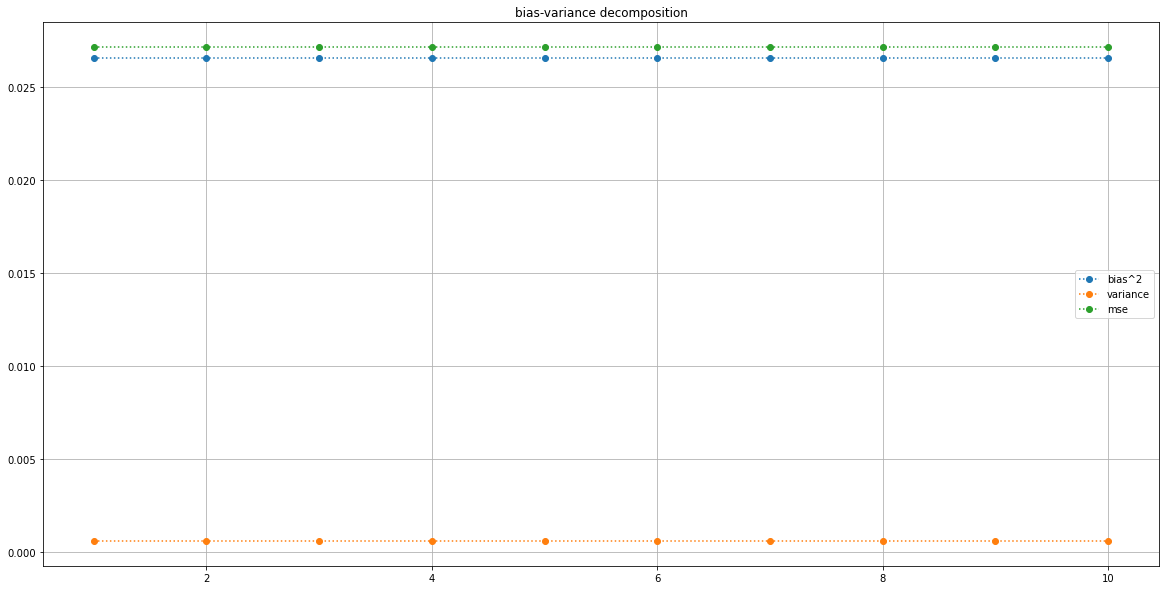

In [14]:
bias_variance(best_AdaBoostRegressor)

In [15]:
def randomForestSelection(X,Y):
    
    rf=RandomForestRegressor(n_estimators=50,oob_score=False)
    properties={
                #min_sample_leaf piu piccolo possibile
                #max feature piu grande possibile
                #min_samples_split piu' piccolo possibile
                #max_leaf_nodes piu' grande possibile
                #max_samples piu' alto possibile 
                
                }
    
    grid=GridSearchCV(rf,properties,scoring="neg_mean_squared_error",cv=8,n_jobs=-1,return_train_score=True,verbose=2)
    grid.fit(X,Y["logerror"])
    
    clear_output(wait=True)
        
    result=pd.DataFrame(grid.cv_results_)
    
    print ("Best Score: ",grid.best_score_)
    print ("Best Params: ", grid.best_params_)
    
    return grid.best_estimator_,result

In [16]:
best_randomForestRegressor,result_rf=randomForestSelection(train_X,train_Y)
result_rf[["mean_test_score","mean_train_score"]]

Best Score:  -0.01610821048970919
Best Params:  {}


mean_test_score  mean_train_score
0        -0.016108         -0.002902

In [17]:
print("Risultati per random forest: ")
print("mse: "+str(mean_squared_error(y_true=test_Y,y_pred=best_randomForestRegressor.predict(test_X))))

Risultati per random forest: 
mse: 0.01461433512299117


Decomposizione: : 0.020200553720616035158208489975 (error) = 0.016539747297050627627967855915 (bias^2) + 0.003660806423565410132325848025 (var)


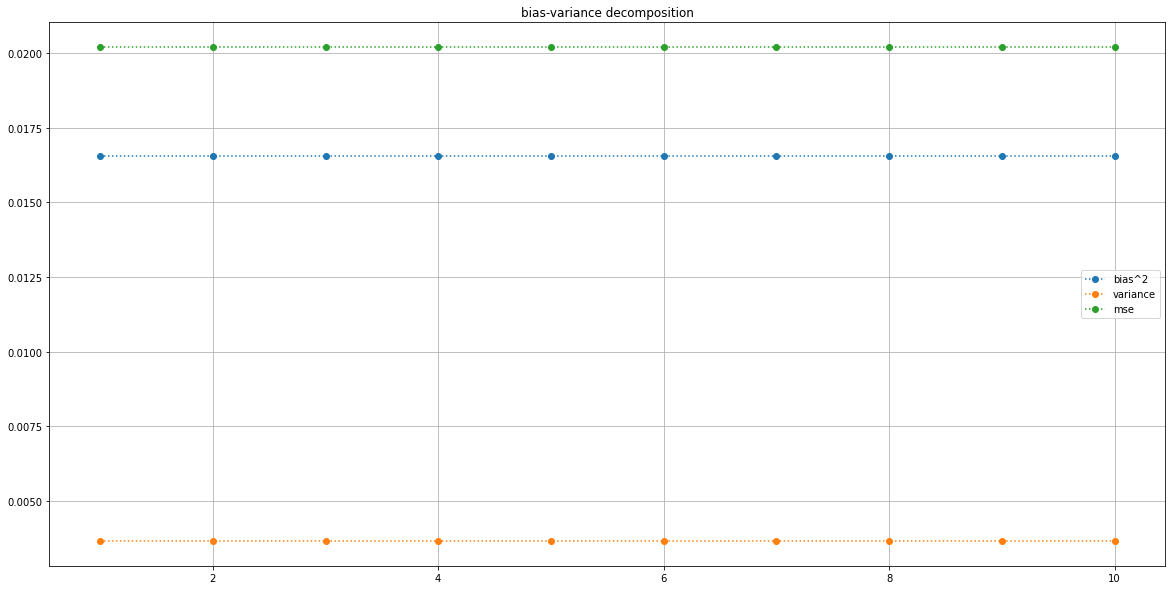

In [18]:
bias_variance(best_randomForestRegressor)

In [1]:
#cella di mezzo per velocizzare esecuzione

import pickle 

if 'train_X' in globals():

    with open('data_output/models.pkl', 'wb') as outp:
    
        for m in [best_AdaBoostRegressor,best_DecisionTreeRegressor,best_LinearRegressor,best_randomForestRegressor]:
            pickle.dump(m, outp, pickle.HIGHEST_PROTOCOL)
        
else:

    import pandas as pd
    import numpy as np
    import gc
    import matplotlib.pyplot as plt

    from sklearn.decomposition import PCA

    from sklearn.feature_selection import RFECV

    from sklearn.model_selection import GridSearchCV

    from sklearn.preprocessing import StandardScaler

    from sklearn.linear_model import LinearRegression

    from sklearn.tree import DecisionTreeRegressor
    from sklearn.ensemble import AdaBoostRegressor

    from sklearn.ensemble import RandomForestRegressor

    from sklearn.model_selection import train_test_split
    from sklearn.metrics import mean_squared_error

    from IPython.display import clear_output

    train_X=pd.read_csv('data_output/train_X.csv')
    train_Y=pd.read_csv('data_output/train_Y.csv')

    test_X=pd.read_csv('data_output/test_X.csv')
    test_Y=pd.read_csv('data_output/test_Y.csv')
        
    with open('data_output/models.pkl', 'rb') as inp:
        
        best_AdaBoostRegressor=pickle.load(inp)
        
        best_DecisionTreeRegressor=pickle.load(inp)
        
        best_LinearRegressor=pickle.load(inp)
        
        best_randomForestRegressor=pickle.load(inp)
    


Considerazioni finali:

In [30]:
def model_selection():
    """
    Funzione che seleziona il modello migliore tra quelli analizzati.
    
    Returns:
        model_min (Object): modello migliore.
    """
    models=[best_AdaBoostRegressor,best_DecisionTreeRegressor,best_LinearRegressor,best_randomForestRegressor]
    
    min_mse=None
    model_min=None
    
    for i,m in enumerate(models):
        
        m.fit(train_X,train_Y["logerror"])
        y_pred=m.predict(test_X)
        mse=mean_squared_error(test_Y["logerror"],y_pred)
        
        if i==0:
            min_mse=mse
            model_min=m
        
        print(str(i)+") ","model:",m,"\n    mse:",mse,'\n')
        
        if min_mse > mse:
            min_mse=mse
            model_min=m
            
    return model_min

In [31]:
best=model_selection()
print("modello migliore: ",best)

0)  model: AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_features=0.95,
                                                       max_leaf_nodes=340),
                  learning_rate=0.0075, n_estimators=25) 
    mse: 0.02689255679969093 

1)  model: DecisionTreeRegressor(max_features=0.95, max_leaf_nodes=340) 
    mse: 0.026993166052583947 

2)  model: LinearRegression(normalize=True, positive=True) 
    mse: 0.02794294912909073 

3)  model: RandomForestRegressor(n_estimators=50) 
    mse: 0.014583626349850104 

modello migliore:  RandomForestRegressor(n_estimators=50)


In [32]:
def best_worst_istances(sel):
    
    """
    Funzione che seleziona le prime `sel` istanze migliori e le prime sel istanze peggiori. La metrica utilizzata per selezionare le istanze e' il MSE.
    
    Args:
        sel (int): numero di istanze da considerare migliori/peggiori.

    Returns:
        best_instances (list): lista di dataframe relativi alle istanze migliori (X,Y,Y_pred,MSE).
        worst_instances (list): lista di dataframe relativi alle istanze peggiori (X,Y,Y_pred,MSE).
        other_instances (list): lista di dataframe relativi alle istanze rimanenti (X,Y,Y_pred,MSE).
    """

    mse_s=[]

    y_pred=best.predict(test_X)
    
    for i in test_X.index:
        mse=mean_squared_error(test_Y.iloc[[i]]["logerror"],y_pred[[i]])
        mse_s.append((i,mse,y_pred[[i]]))
        
    mse_s.sort(key=lambda tup: tup[1])
    
    best_instances_X=pd.DataFrame()
    best_instances_Y=pd.DataFrame()
    best_instances_Y_pred=pd.DataFrame()
    best_instances_mse=pd.DataFrame()
    
    for i,tup in enumerate(mse_s):
        if i<sel:
            best_instances_X=best_instances_X.append(test_X.iloc[tup[0]])
            best_instances_Y=best_instances_Y.append(test_Y.iloc[tup[0]])
            best_instances_Y_pred=best_instances_Y_pred.append(pd.Series(data=tup[2],name=tup[0]))
            
            best_instances_mse=best_instances_mse.append(pd.Series(data=tup[1],name=tup[0]))
            
    worst_instances_X=pd.DataFrame()
    worst_instances_Y=pd.DataFrame()
    worst_instances_Y_pred=pd.DataFrame()
    worst_instances_mse=pd.DataFrame()
    
    for i,tup in enumerate(mse_s[::-1]):
        if i<sel:
            worst_instances_X=worst_instances_X.append(test_X.iloc[tup[0]])
            worst_instances_Y=worst_instances_Y.append(test_Y.iloc[tup[0]])
            worst_instances_Y_pred=worst_instances_Y_pred.append(pd.Series(data=tup[2],name=tup[0]))
            
            worst_instances_mse=worst_instances_mse.append(pd.Series(data=tup[1],name=tup[0]))
    
    other_i=[x[0] for x in mse_s[sel:len(mse_s)-sel]]
    
    other_instances_mse=pd.DataFrame(index=other_i,data=[x[1] for x in mse_s[sel:len(mse_s)-sel]])
    
    other_instances_Y_pred=pd.DataFrame(index=other_i,data=[x[2] for x in mse_s[sel:len(mse_s)-sel]])
    
    best_instances=[best_instances_X,best_instances_Y,best_instances_Y_pred,best_instances_mse]
    worst_instances=[worst_instances_X,worst_instances_Y,worst_instances_Y_pred,worst_instances_mse]
    other_instances=[test_X.iloc[other_i],test_Y.iloc[other_i],other_instances_Y_pred,other_instances_mse]
    
    return best_instances,worst_instances,other_instances
    
    

In [83]:
best_instances,worst_instances,other_instances=best_worst_istances(200)

In [84]:
best_instances_X=best_instances[0]
best_instances_X

latitude    longitude  taxamount
51884  34115124.0 -117791181.0    3109.20
60610  34576508.0 -118050689.0    2675.81
89960  34576508.0 -118050689.0    2675.81
88803  33530408.0 -117692101.0    6753.74
38824  33900171.0 -118050364.0     966.37
...           ...          ...        ...
51918  34226054.0 -118814431.0   16368.56
61629  34693225.0 -118141289.0    1827.56
70196  34693225.0 -118141289.0    1827.56
96370  34044400.0 -118245000.0    4613.55
60282  33694456.0 -117959083.0    6391.72

[200 rows x 3 columns]

In [85]:
best_instances_Y=best_instances[1]
best_instances_Y

logerror
51884  0.015900
60610  0.032500
89960  0.032500
88803  0.017527
38824  0.040206
...         ...
51918 -0.009128
61629 -0.022200
70196 -0.022200
96370 -0.013100
60282 -0.008000

[200 rows x 1 columns]

In [86]:
best_instances_Y_pred=best_instances[2]
best_instances_Y_pred

0
51884  0.015900
60610  0.032500
89960  0.032500
88803  0.017528
38824  0.040208
...         ...
51918 -0.009194
61629 -0.022134
70196 -0.022134
96370 -0.013166
60282 -0.007933

[200 rows x 1 columns]

In [87]:
best_instances_mse=best_instances[3]
best_instances_mse

0
51884  7.025073e-16
60610  1.764496e-13
89960  1.764496e-13
88803  3.830007e-13
38824  1.140973e-12
...             ...
51918  4.338988e-09
61629  4.361489e-09
70196  4.361489e-09
96370  4.387858e-09
60282  4.432412e-09

[200 rows x 1 columns]

In [88]:
worst_instances_X=worst_instances[0]
worst_instances_X

latitude    longitude  taxamount
96800  33928708.0 -118038791.0    3821.81
37394  33928708.0 -118038791.0    3821.81
95745  33861099.0 -118130587.0    5788.80
4107   33861099.0 -118130587.0    5788.80
61916  34185275.0 -119225374.0   23720.68
...           ...          ...        ...
87168  33641535.0 -117587225.0    2124.98
60157  33979046.0 -118270415.0    3110.74
8812   33979046.0 -118270415.0    3110.74
89139  33647663.0 -117959370.0    8285.74
36731  33645633.0 -117645352.0    3236.12

[200 rows x 3 columns]

In [89]:
worst_instances_Y=worst_instances[1]
worst_instances_Y

logerror
96800 -4.605000
37394 -4.605000
95745  3.069365
4107   3.069365
61916  3.018000
...         ...
87168 -2.323000
60157 -1.013000
8812  -1.013000
89139  2.276052
36731  2.296991

[200 rows x 1 columns]

In [90]:
worst_instances_Y_pred=worst_instances[2]
worst_instances_Y_pred

0
96800  0.003875
37394  0.003875
95745 -0.004119
4107  -0.004119
61916 -0.005568
...         ...
87168 -1.242557
60157  0.060022
8812   0.060022
89139  1.208076
36731  1.240371

[200 rows x 1 columns]

In [91]:
worst_instances_mse=worst_instances[3]
worst_instances_mse

0
96800  21.241733
37394  21.241733
95745   9.446304
4107    9.446304
61916   9.141962
...          ...
87168   1.167357
60157   1.151377
8812    1.151377
89139   1.140572
36731   1.116446

[200 rows x 1 columns]

In [92]:
other_instances_X=other_instances[0]
other_instances_X

latitude    longitude  taxamount
76455   34002495.0 -118408376.0    3701.28
6180    33804800.0 -118392000.0    1761.08
58098   34507870.0 -118636615.0    6883.70
18469   34112939.0 -118102963.0   10828.68
63318   33935130.0 -117955947.0    4451.82
...            ...          ...        ...
107956  34153204.0 -118435442.0    1353.25
31713   33809309.0 -118370409.0    2638.91
12721   33811055.0 -117936938.0    6572.86
40954   34083517.0 -118428796.0  158396.18
56045   34083517.0 -118428796.0  158396.18

[110407 rows x 3 columns]

In [93]:
other_instances_Y=other_instances[1]
other_instances_Y

logerror
76455   0.030500
6180   -0.013834
58098   0.006000
18469   0.002569
63318   0.013108
...          ...
107956 -2.271428
31713  -0.265300
12721  -1.784000
40954   0.780809
56045   0.780809

[110407 rows x 1 columns]

In [94]:
other_instances_Y_pred=other_instances[2]
other_instances_Y_pred

0
76455   0.030567
6180   -0.013901
58098   0.006067
18469   0.002636
63318   0.013177
...          ...
107956 -1.234752
31713   0.777210
12721  -0.741091
40954  -0.272089
56045  -0.272089

[110407 rows x 1 columns]

In [95]:
other_instances_mse=other_instances[3]
other_instances_mse

0
76455   4.438142e-09
6180    4.494612e-09
58098   4.502038e-09
18469   4.557937e-09
63318   4.724303e-09
...              ...
107956  1.074697e+00
31713   1.086828e+00
12721   1.087659e+00
40954   1.108593e+00
56045   1.108593e+00

[110407 rows x 1 columns]

In [96]:
def pca_prop_param(X,Y_true,Y_pred):
    
    """
    Funzione che genera grafico dei dati tramite PCA.
    Sulla sinistra il colore rappresenta il `logerror` reale, sulla destra il `logerror` predetto 
    """
    
    standardscaler=StandardScaler()
    standardscaler.fit(X)
    
    rescaled_X=standardscaler.transform(X)
    
    pca=PCA(2)
    x_trans=pca.fit_transform(rescaled_X)
    
    fig,ax=plt.subplots(ncols=2,figsize=(30,10),sharex=True,sharey=True)
    
    fig.suptitle("Plot PCA")
    
    scat_0=ax[0].scatter(x_trans[:,0],x_trans[:,1],s=100,c=Y_true["logerror"])
    
    scat_1=ax[1].scatter(x_trans[:,0],x_trans[:,1],s=100,c=Y_pred[0])
    
    ax[0].set_title("Plot PCA con `logerror` vero")
    ax[1].set_title("Plot PCA con `logerror` predetto")
    
    
    for e in ax:
        e.set_xlabel("Principal componenent #0")
        e.set_ylabel("Principal componenent #1")
    
    cbar=plt.colorbar(scat_1)
    cbar.ax.set_ylabel('logerror', rotation=270)

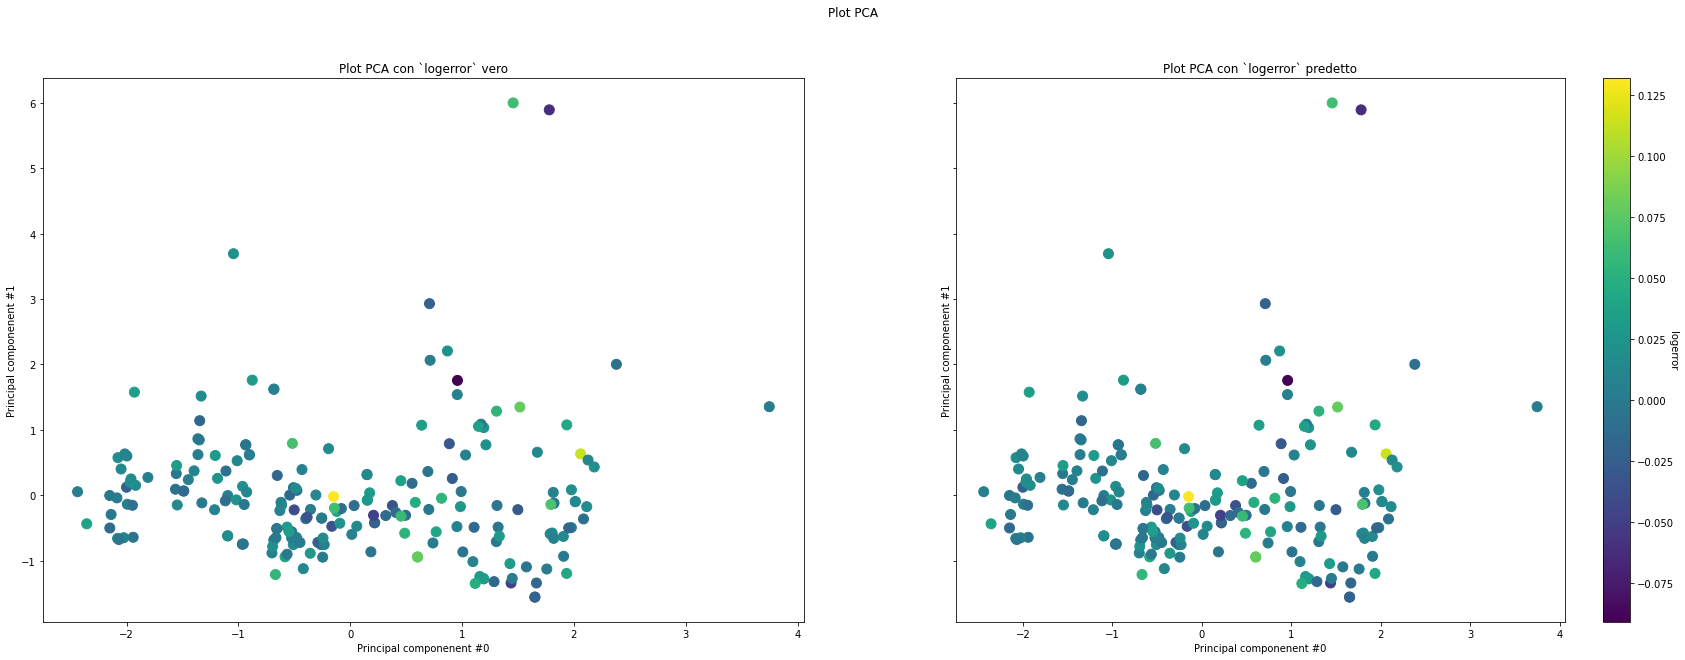

In [97]:
pca_prop_param(best_instances_X,best_instances_Y,best_instances_Y_pred)

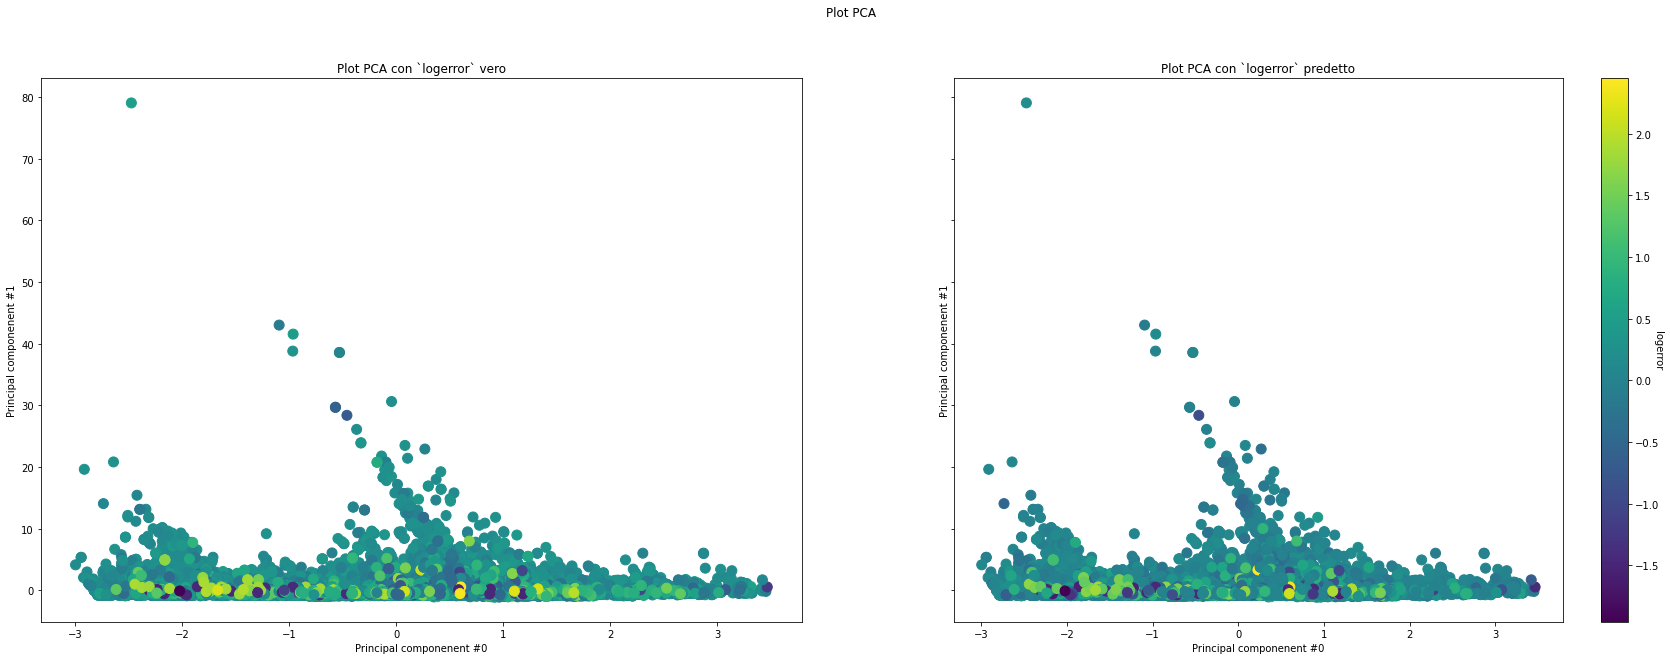

In [98]:
pca_prop_param(other_instances_X,other_instances_Y,other_instances_Y_pred)

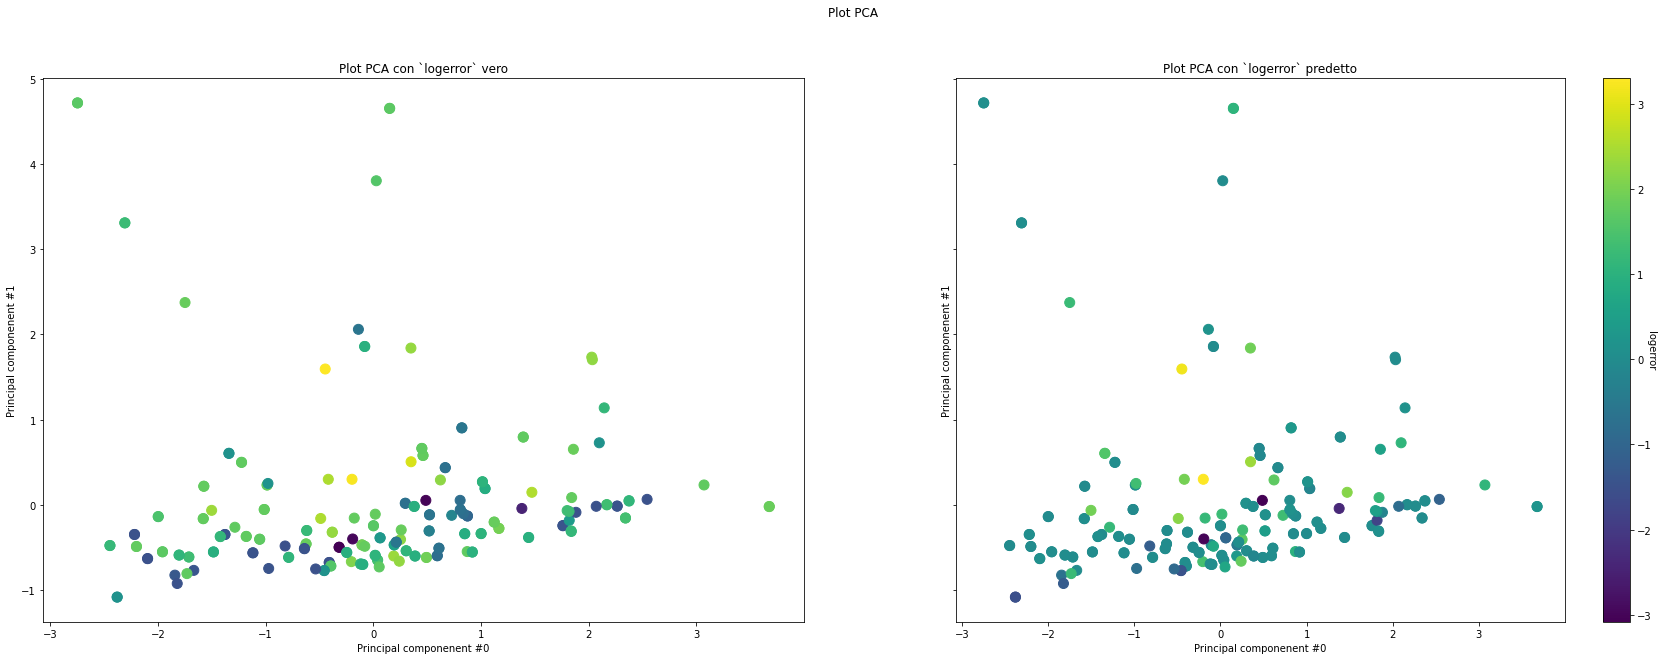

In [99]:
pca_prop_param(worst_instances_X,worst_instances_Y,worst_instances_Y_pred)

In [100]:
def plot_var(var,limit):
    """
    Funzione che genera grafico `true_logerror vs var`, limitando il valore massimo del MSE per una migliore visualizzazione.

    Args:
        var (String): variabile da plottare insieme a true_logerror.
        limit (int): limite superiore al valore del MSE per una migliore visualizzazione.
    """
    
    fig,ax=plt.subplots(ncols=3,figsize=(35,10),sharex=True,sharey=True)
    
    fig.suptitle('true_logerror vs '+var+' , limite al valore di MSE: '+str(limit))
    
    ax_0=ax[0].scatter(best_instances_X[var],best_instances_Y["logerror"],s=100,c=best_instances_mse,vmin=0,vmax=limit)
    
    ax_2=ax[2].scatter(worst_instances_X.loc[worst_instances_mse[worst_instances_mse[0]<limit].index][var],
                       worst_instances_Y.loc[worst_instances_mse[worst_instances_mse[0]<limit].index]["logerror"],
                       s=100,c=worst_instances_mse.loc[worst_instances_mse[worst_instances_mse[0]<limit].index],vmin=0,vmax=limit)
    
    ax_1=ax[1].scatter(other_instances_X[var],other_instances_Y["logerror"],s=100,c=other_instances_mse,vmin=0,vmax=limit)
    
    ax[0].set_title("best_instances")
    ax[1].set_title("other_instances")
    ax[2].set_title("worst_instances")
    
    for e in ax:
        e.set_xlabel(var)
        e.set_ylabel("true_logerror")
    
    cbar=plt.colorbar(ax_2)
    cbar.ax.set_ylabel('MSE', rotation=270)
        

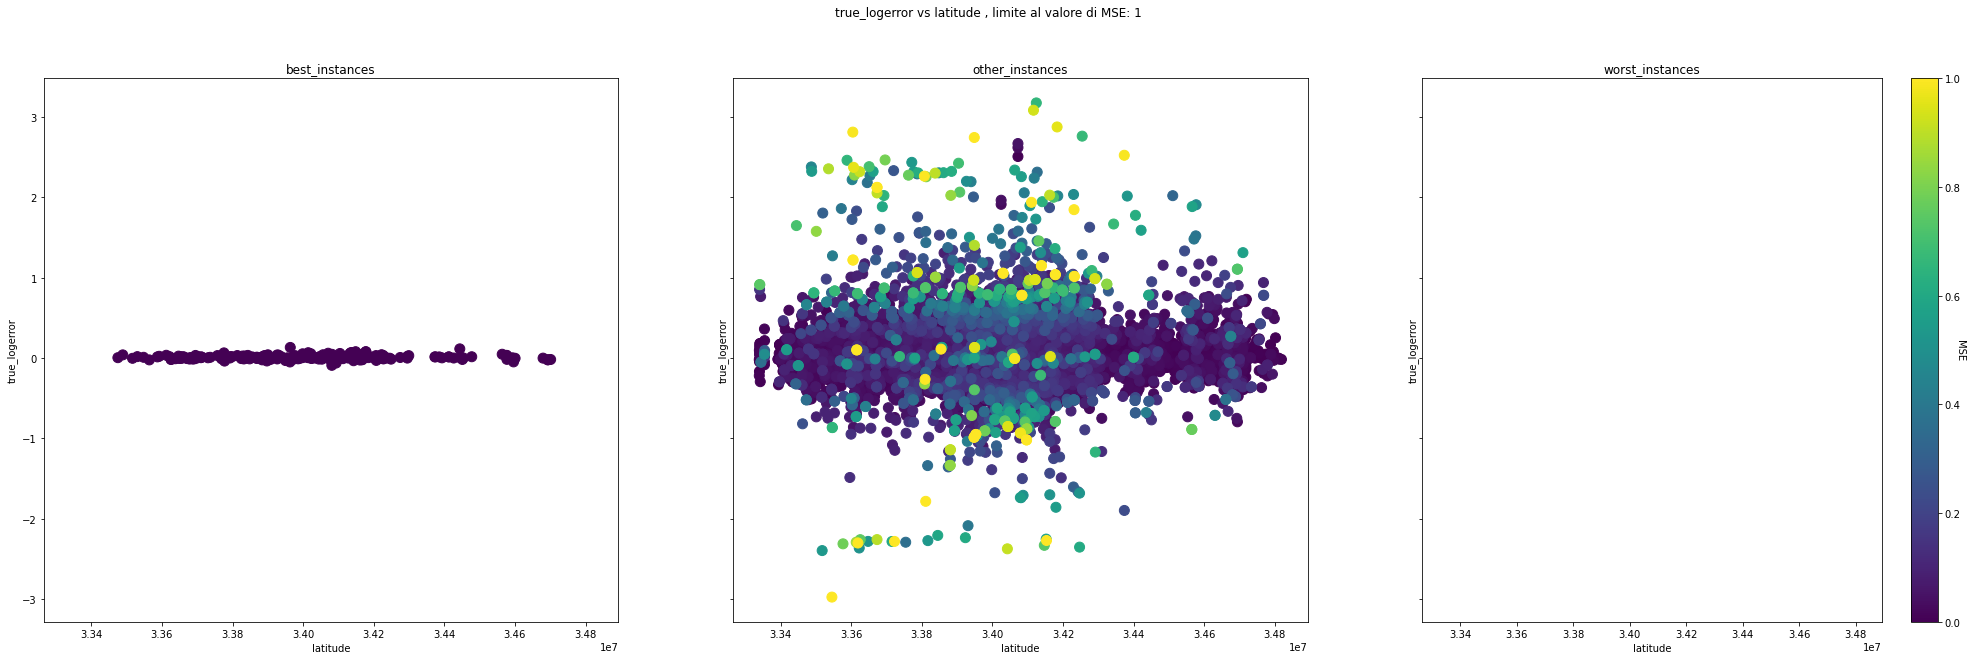

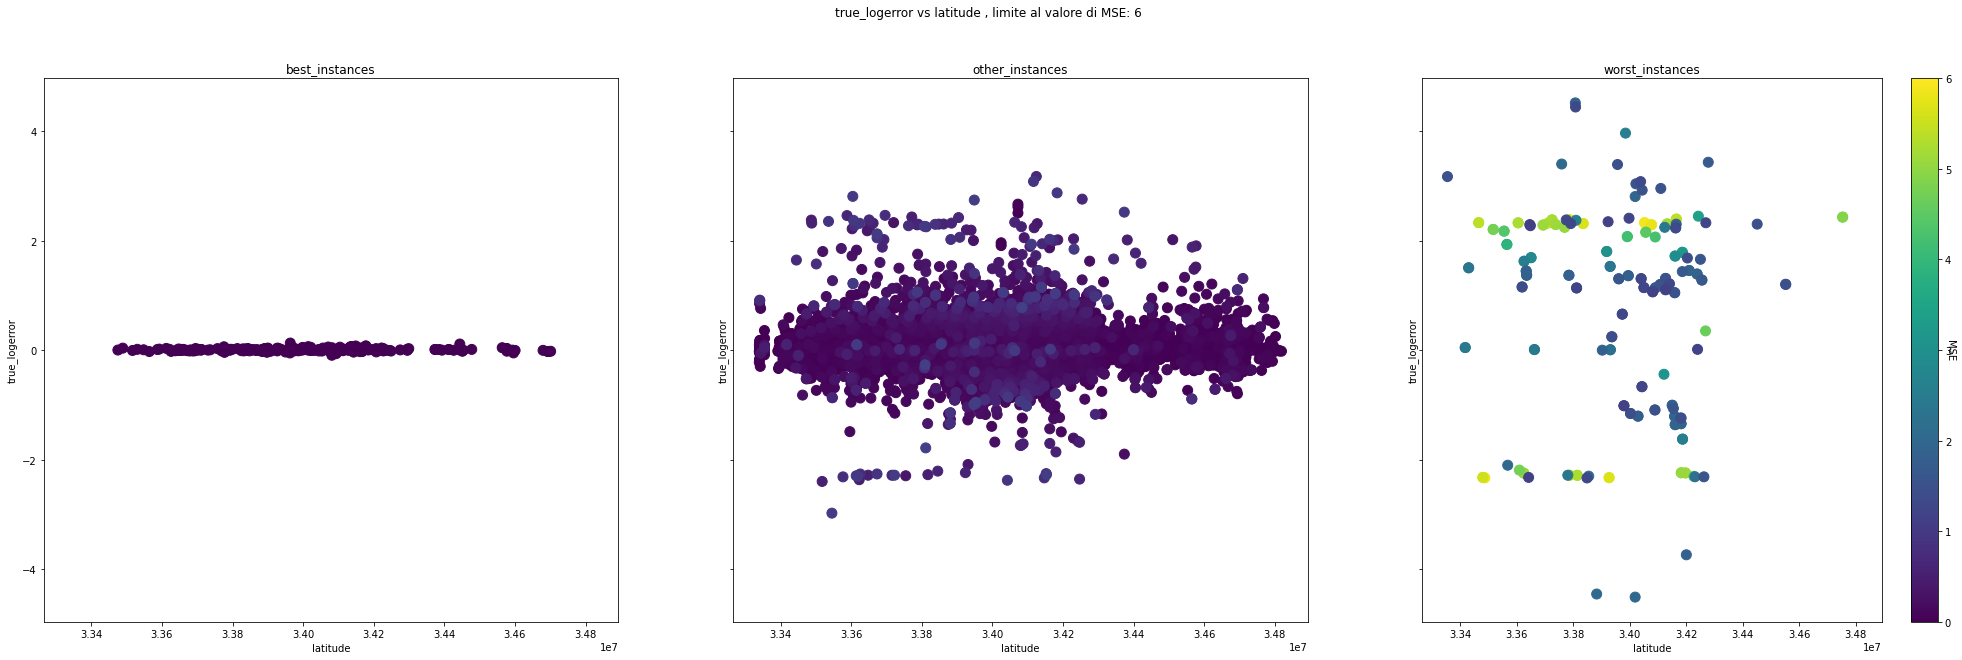

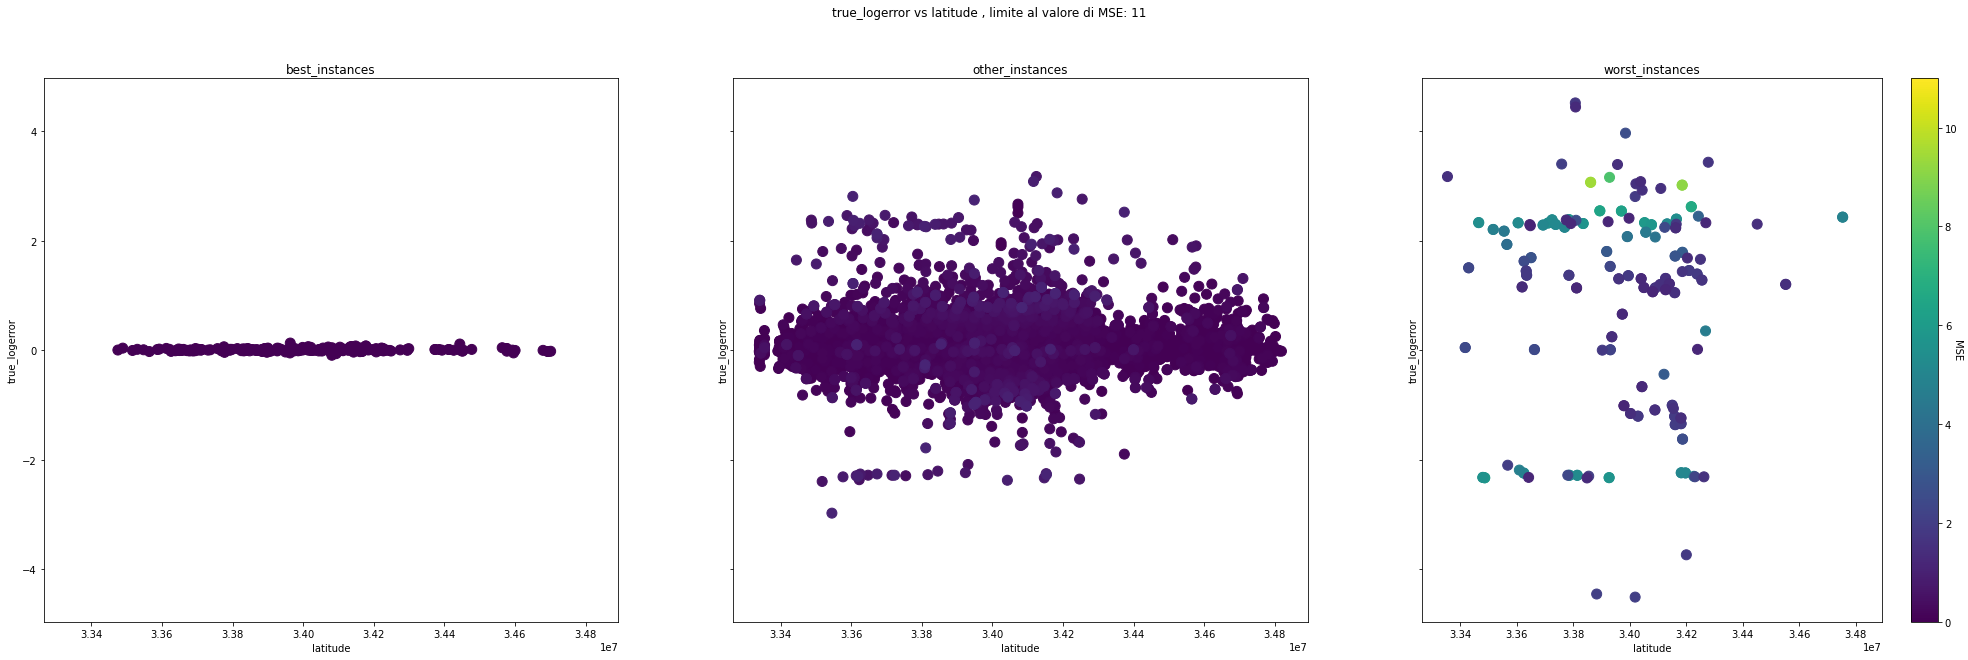

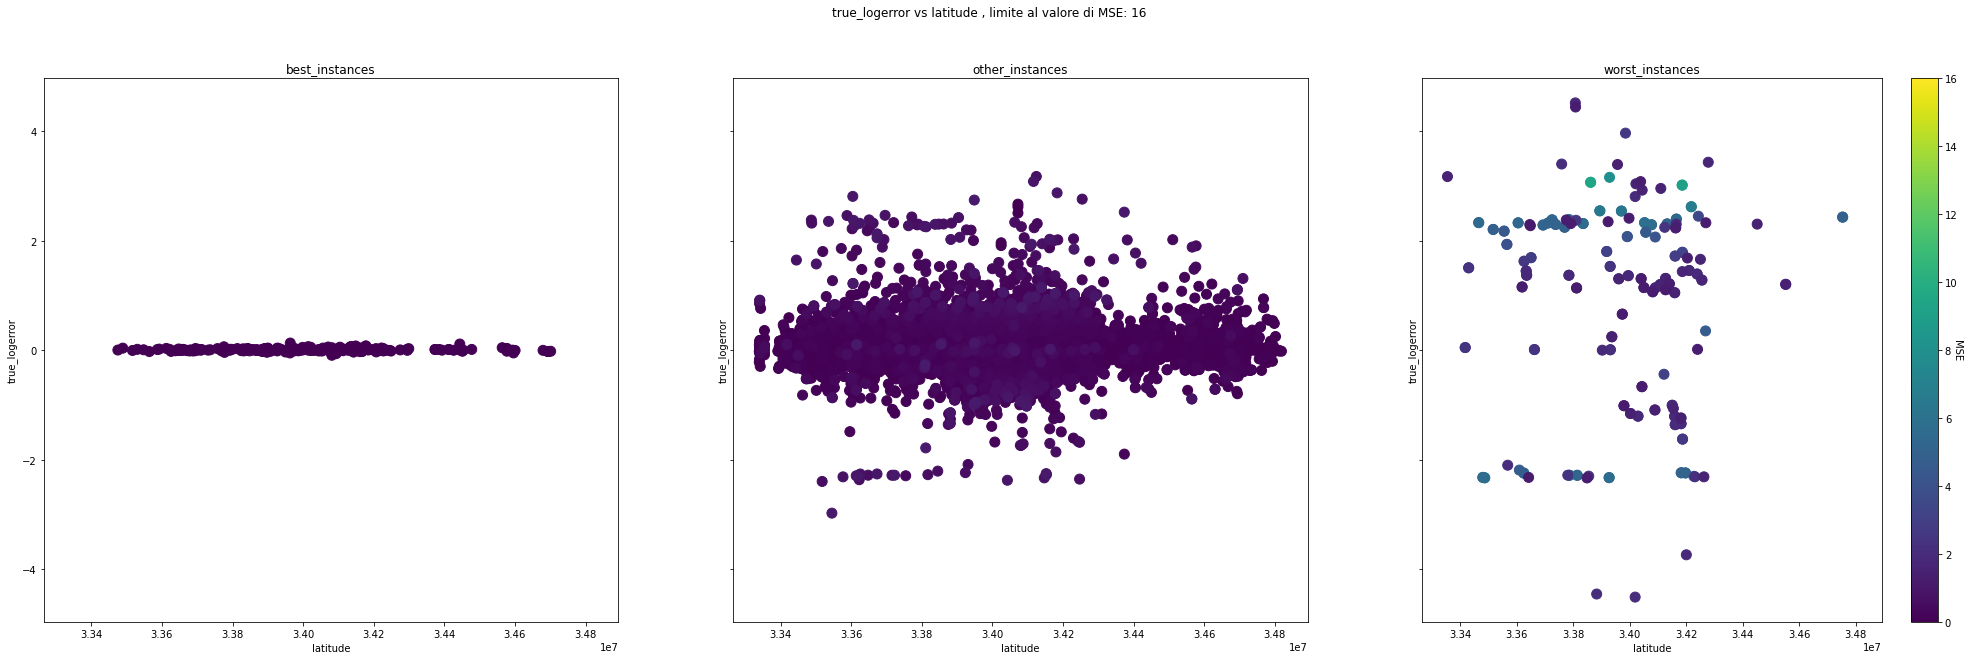

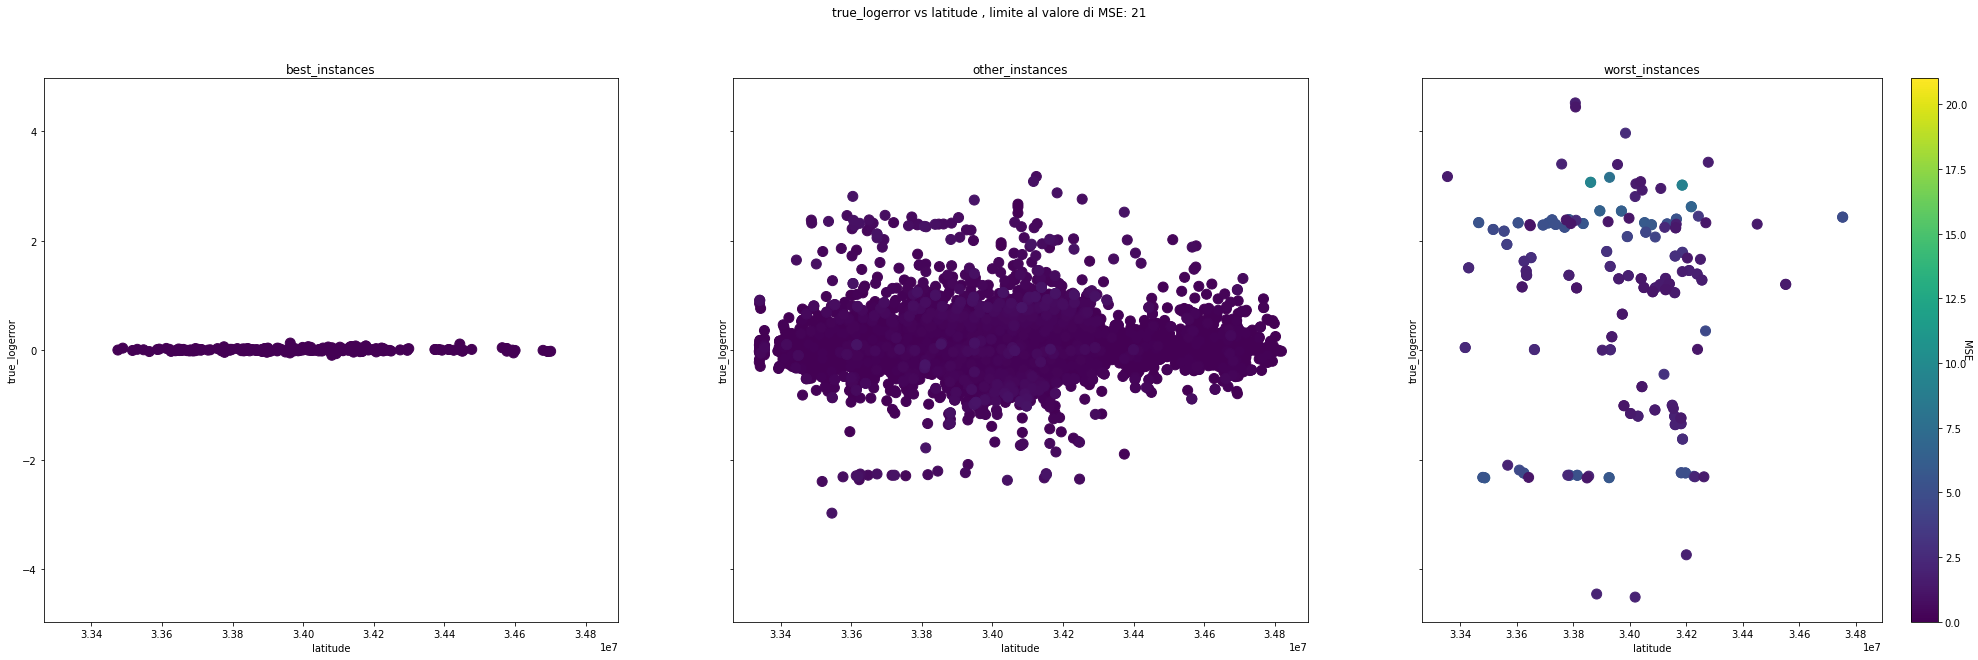

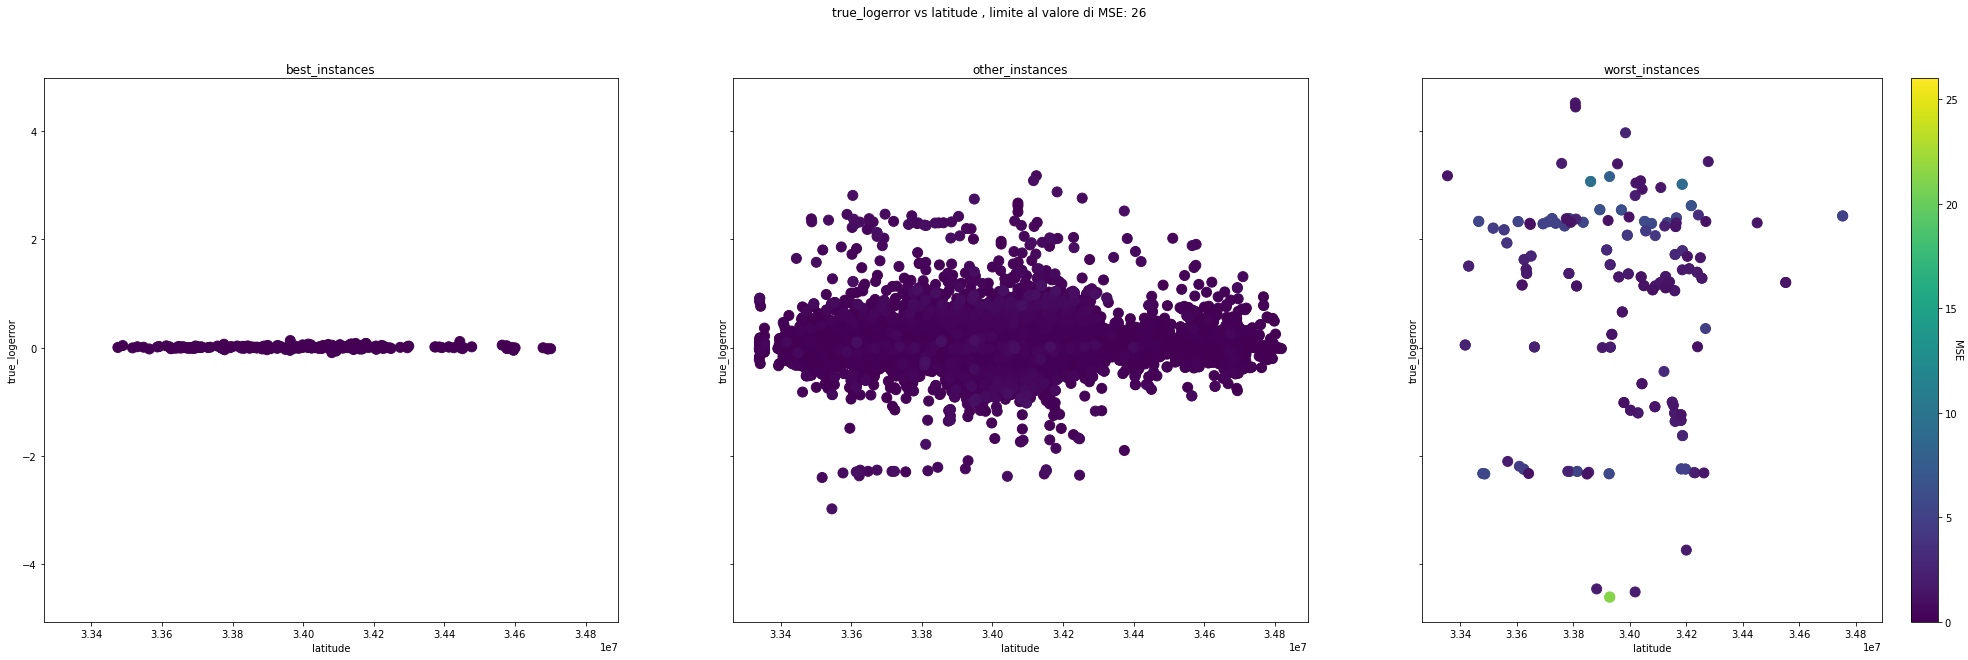

In [101]:
for i in range(1,30,5):
    plot_var("latitude",i)

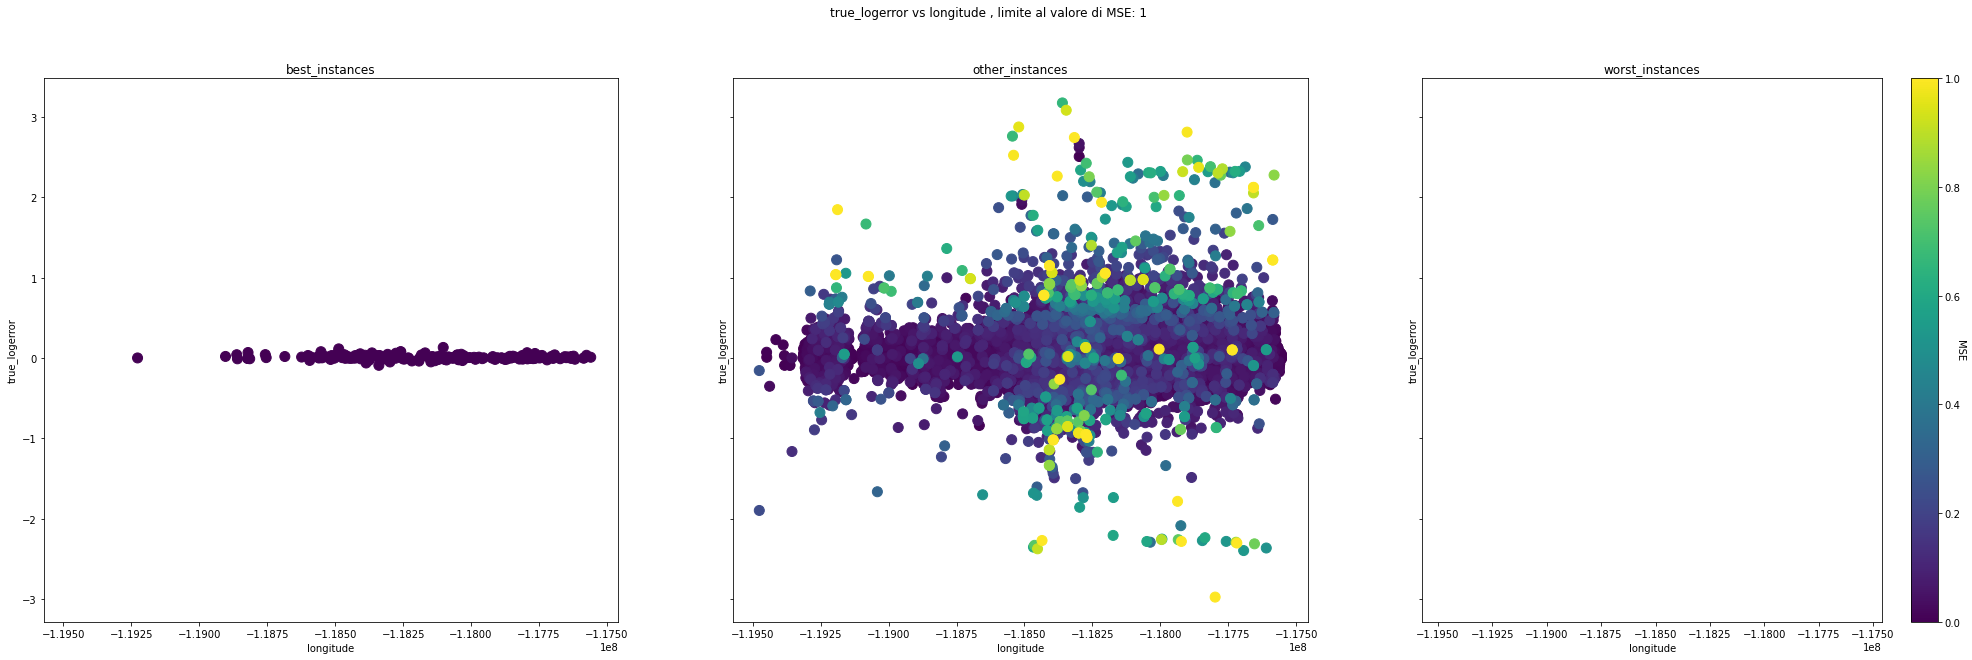

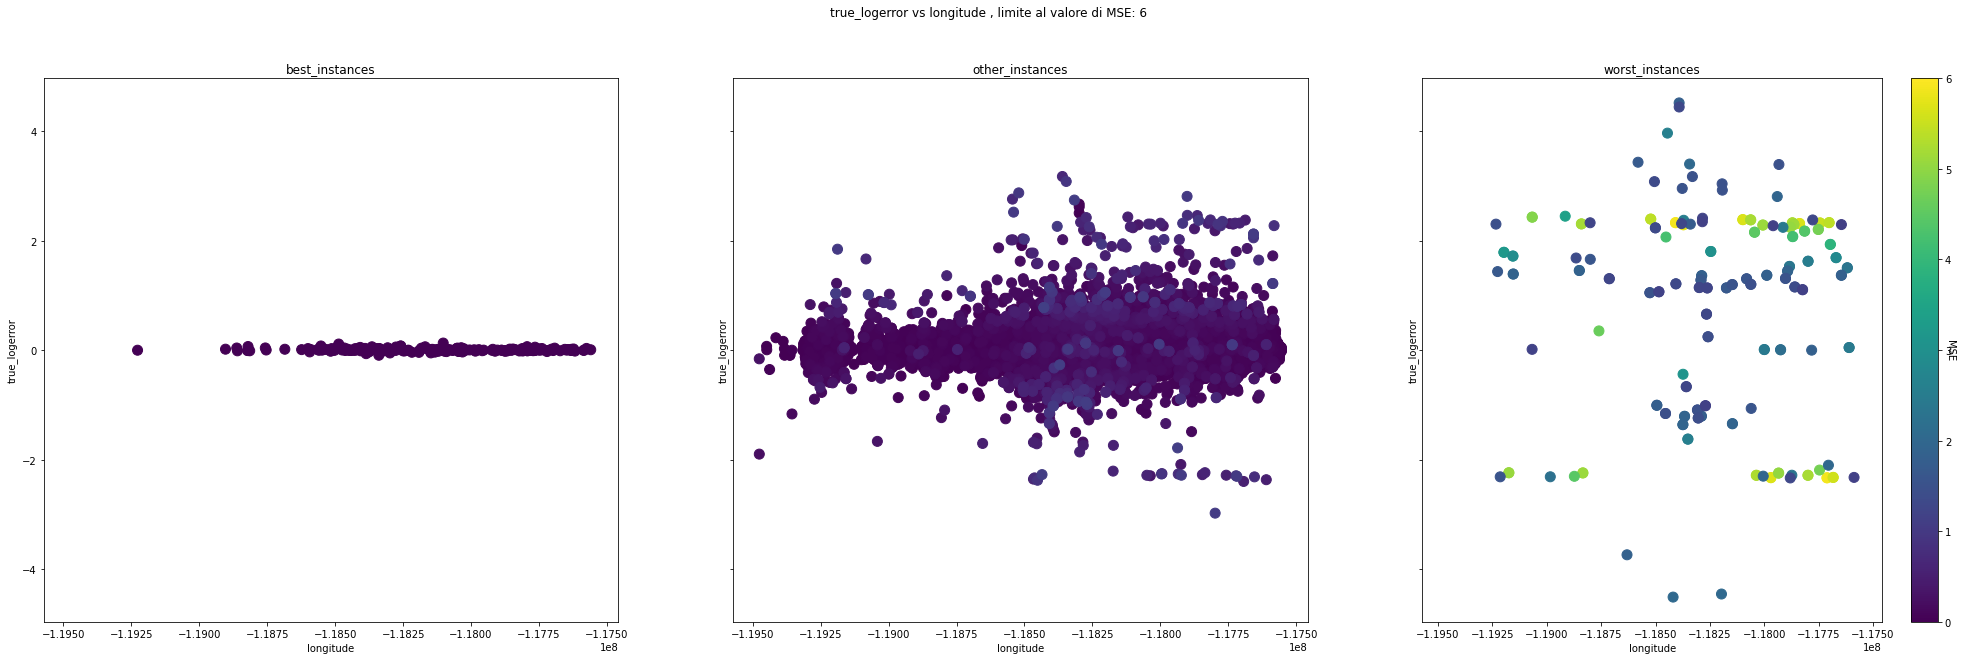

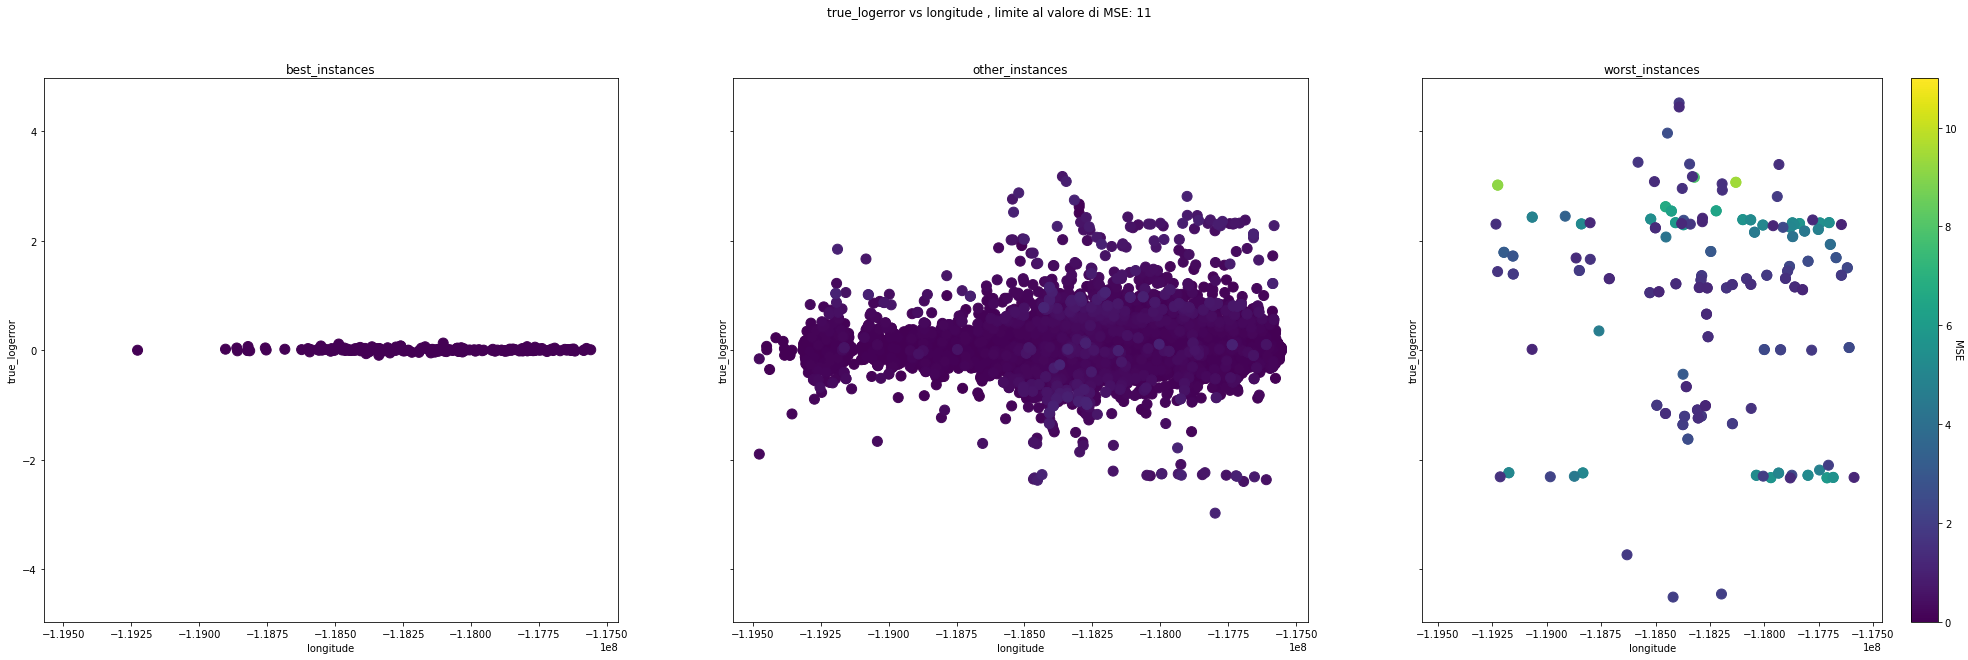

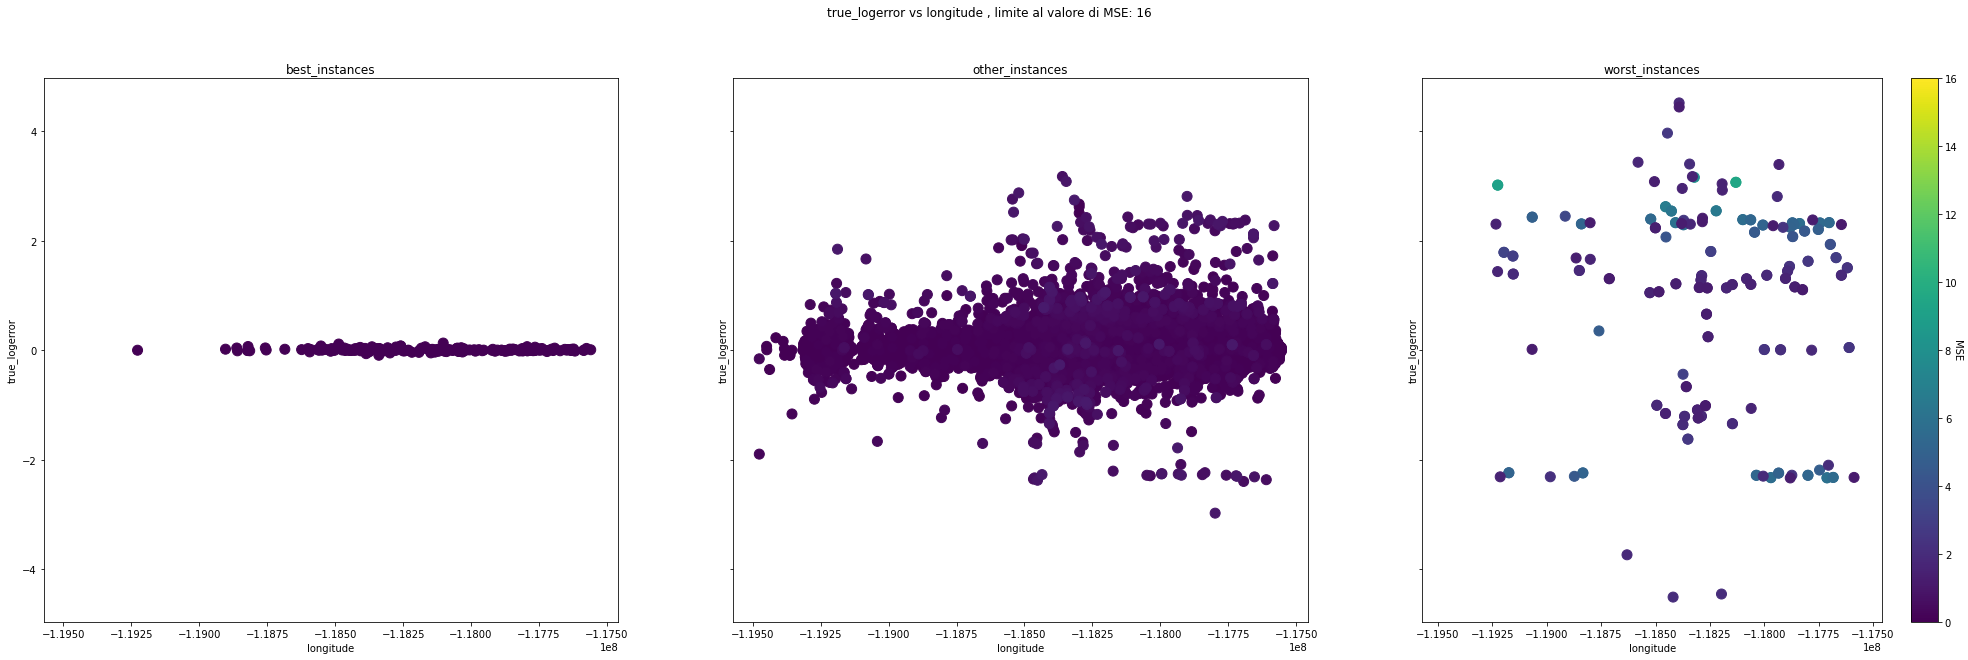

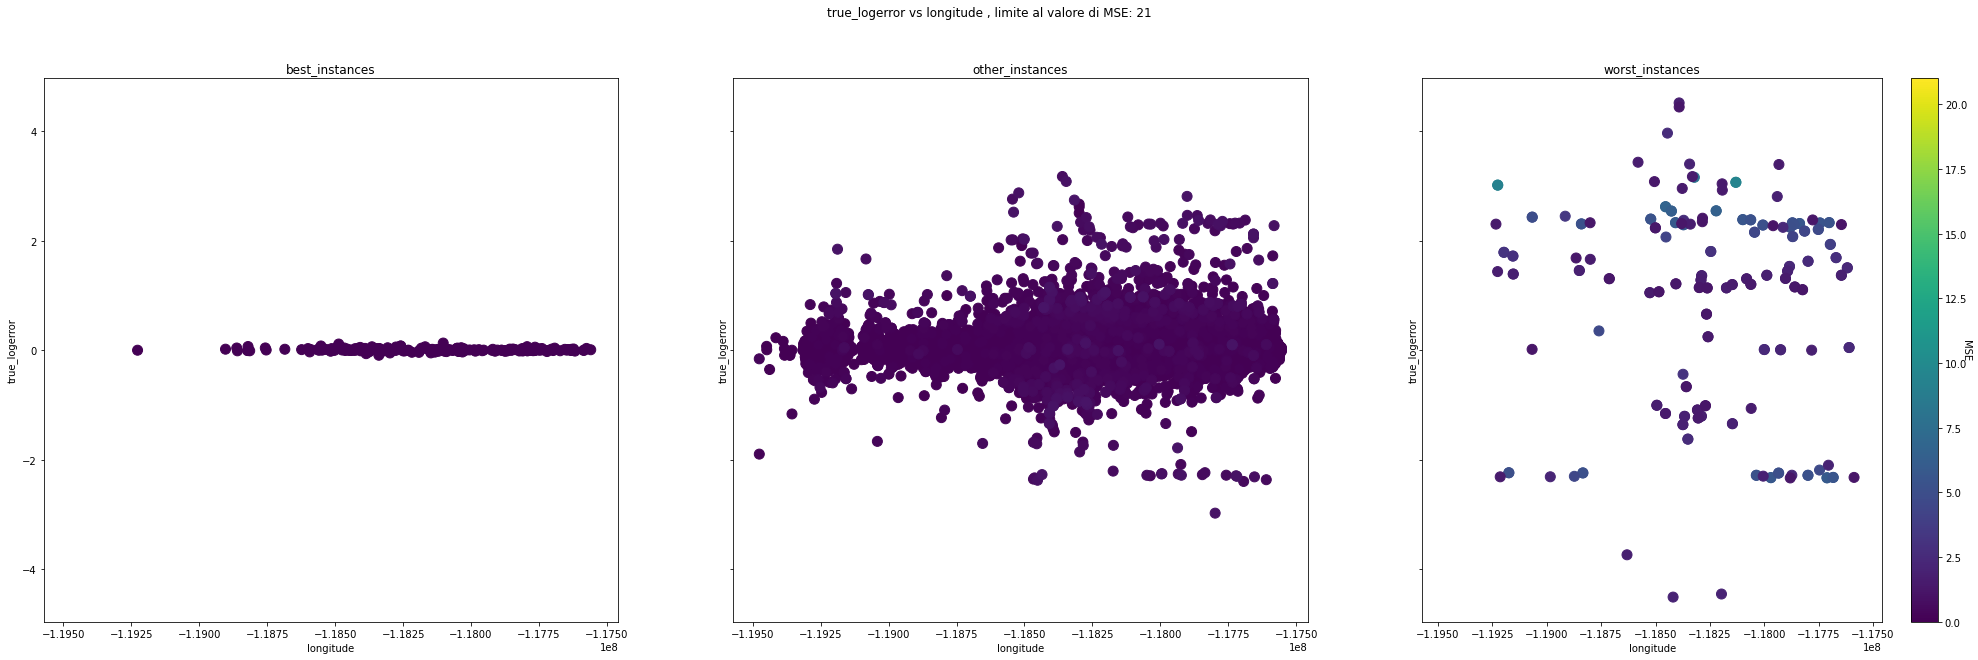

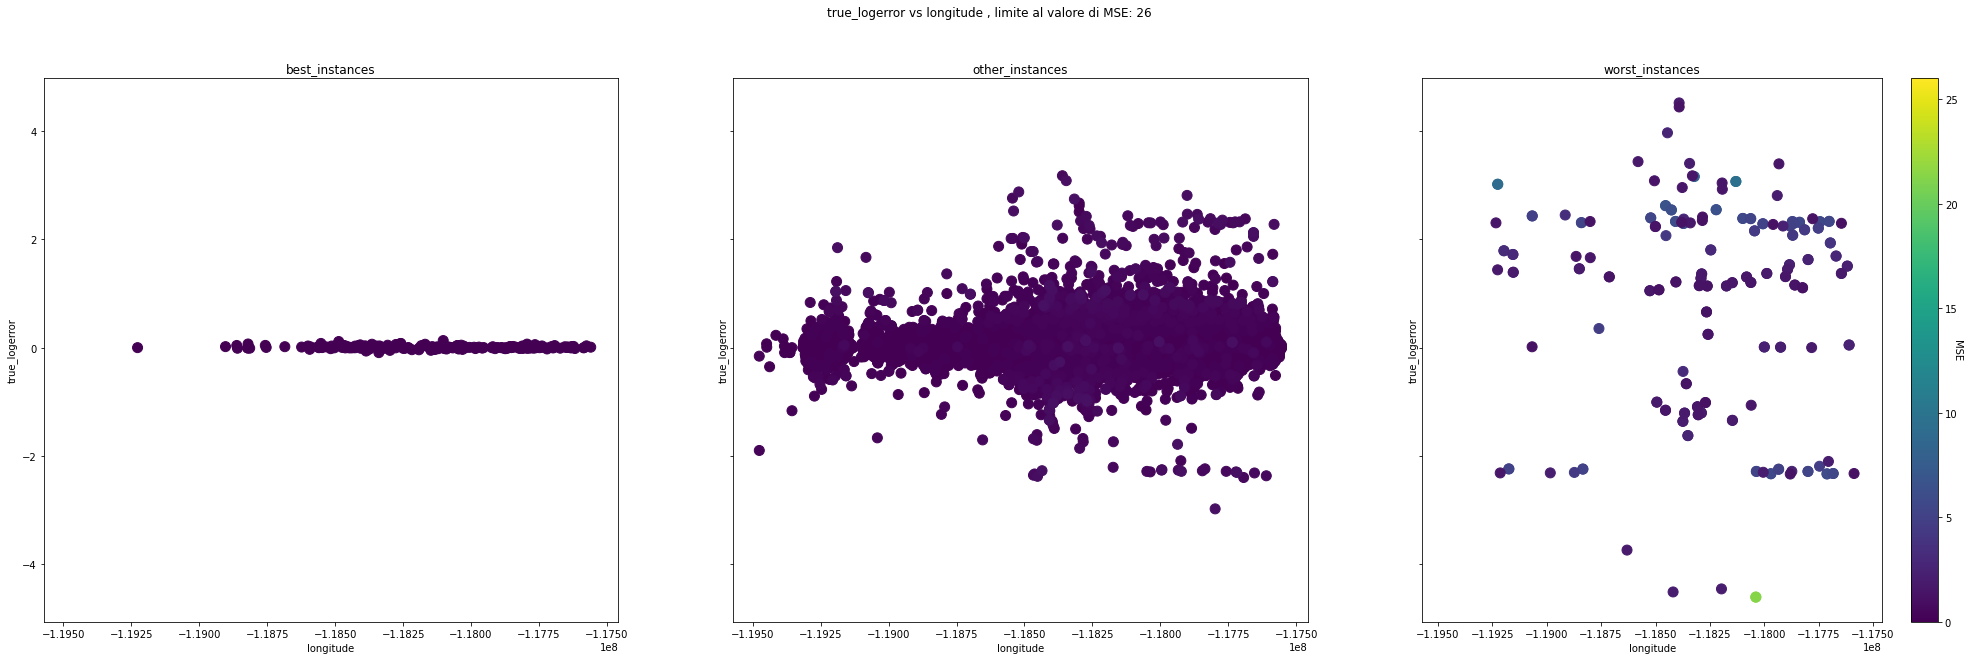

In [102]:
for i in range(1,30,5):
    plot_var("longitude",i)

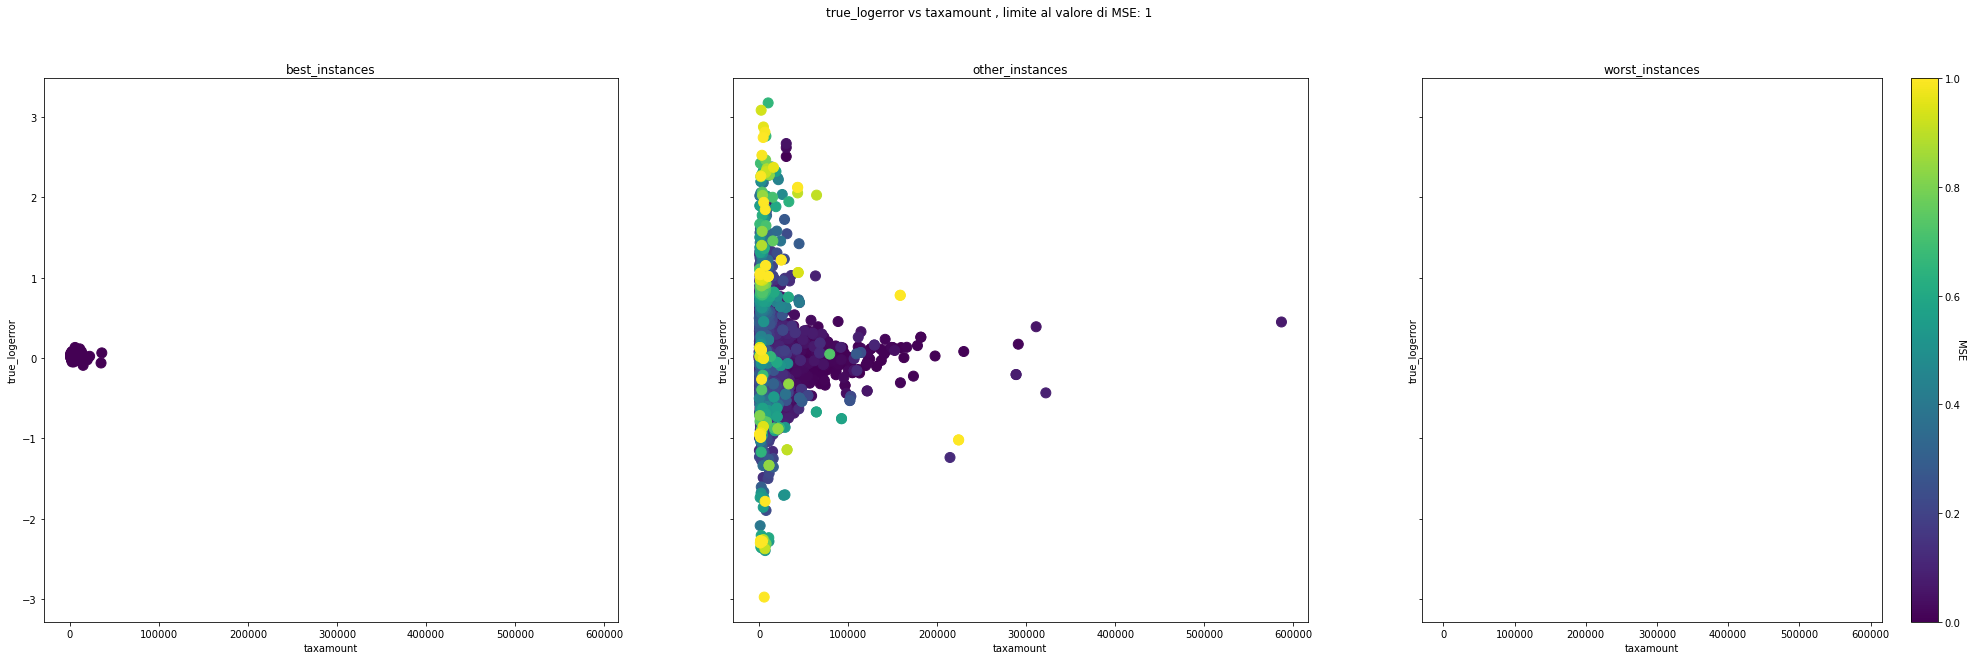

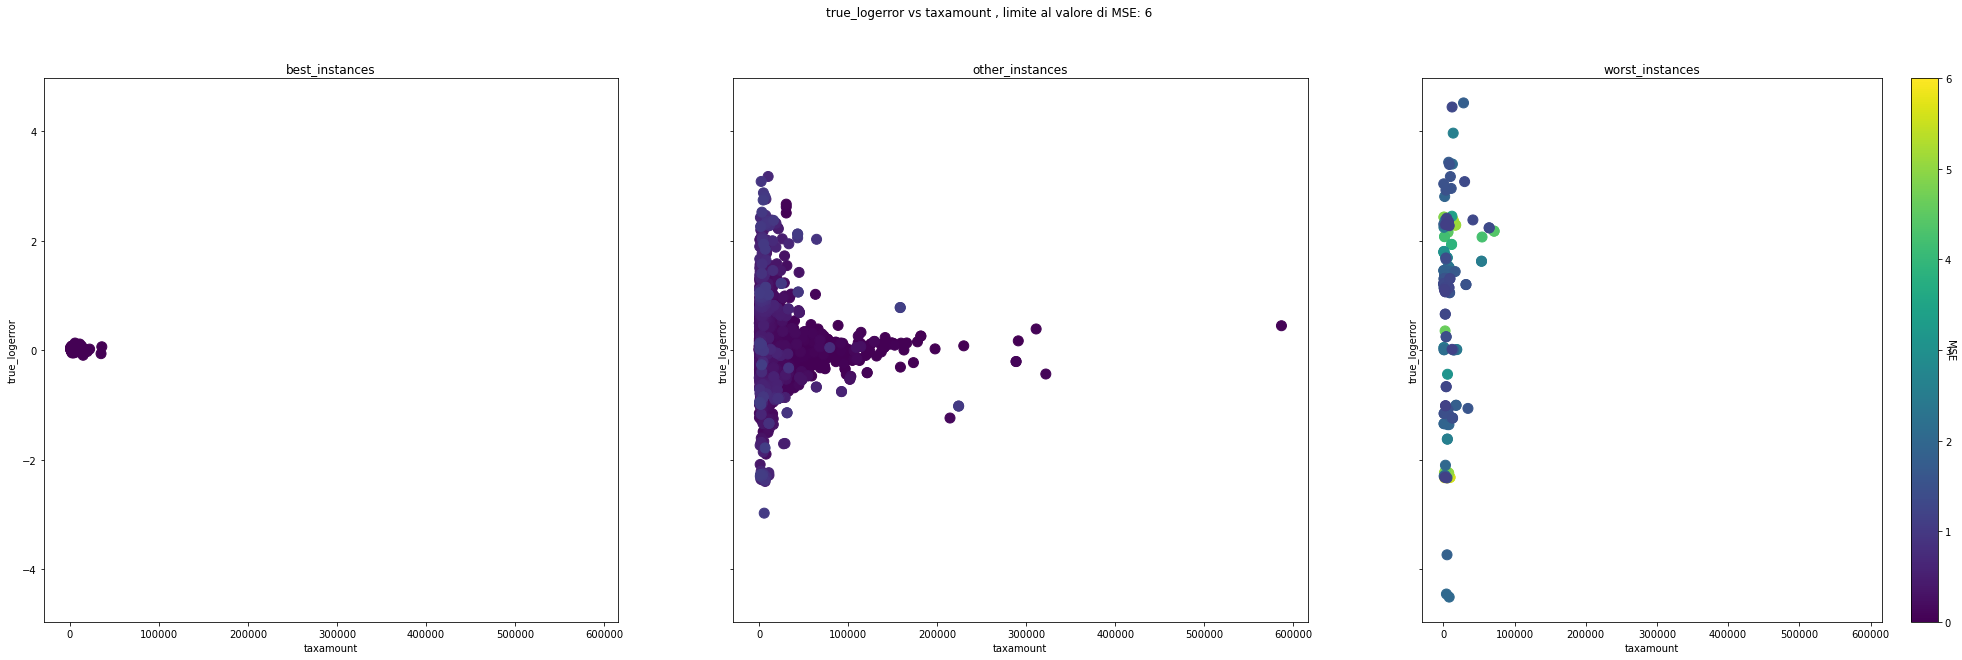

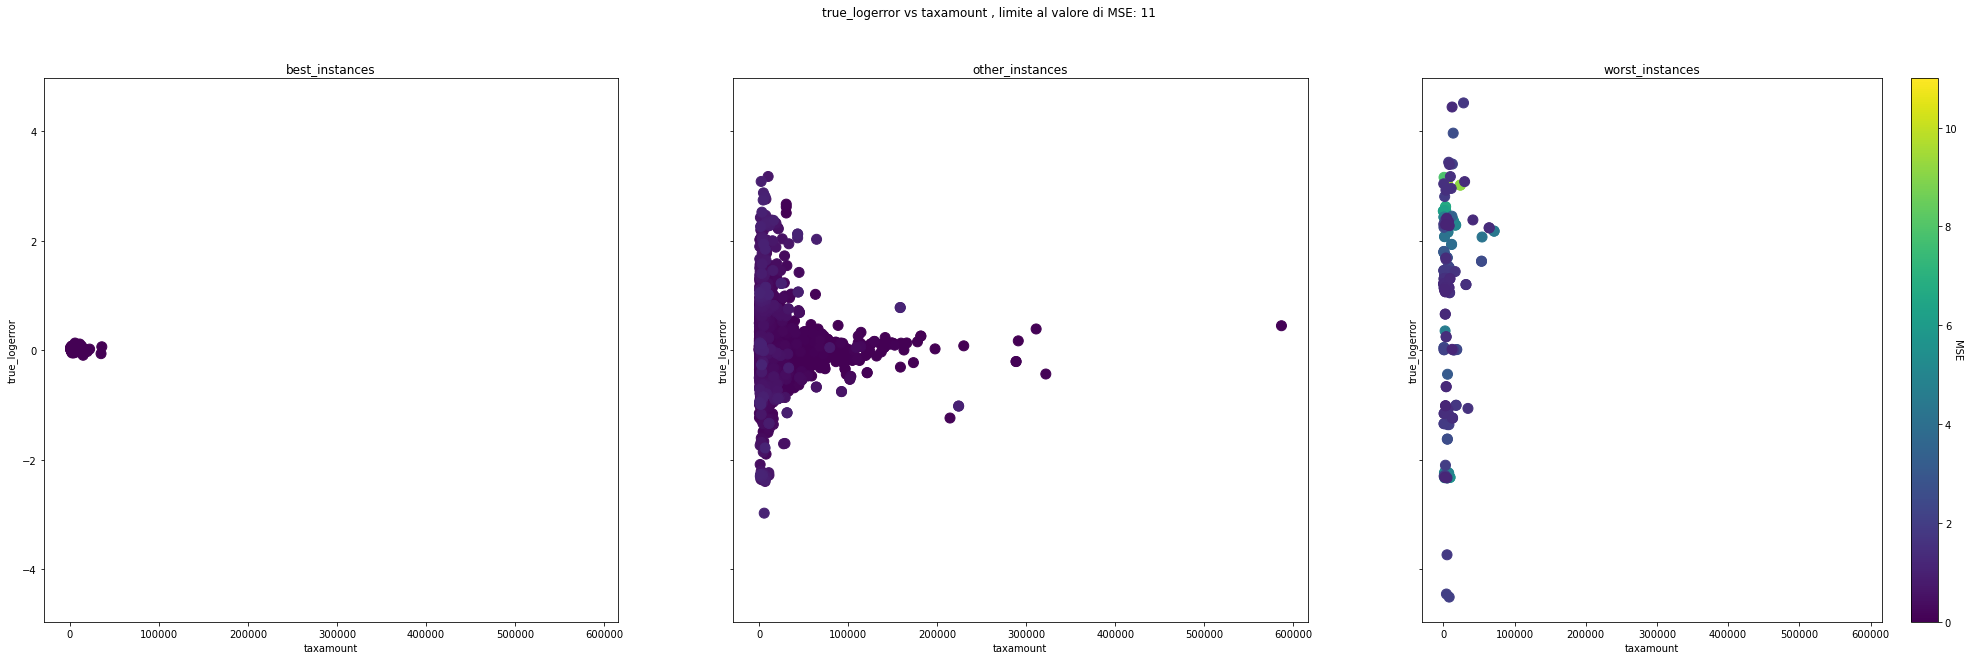

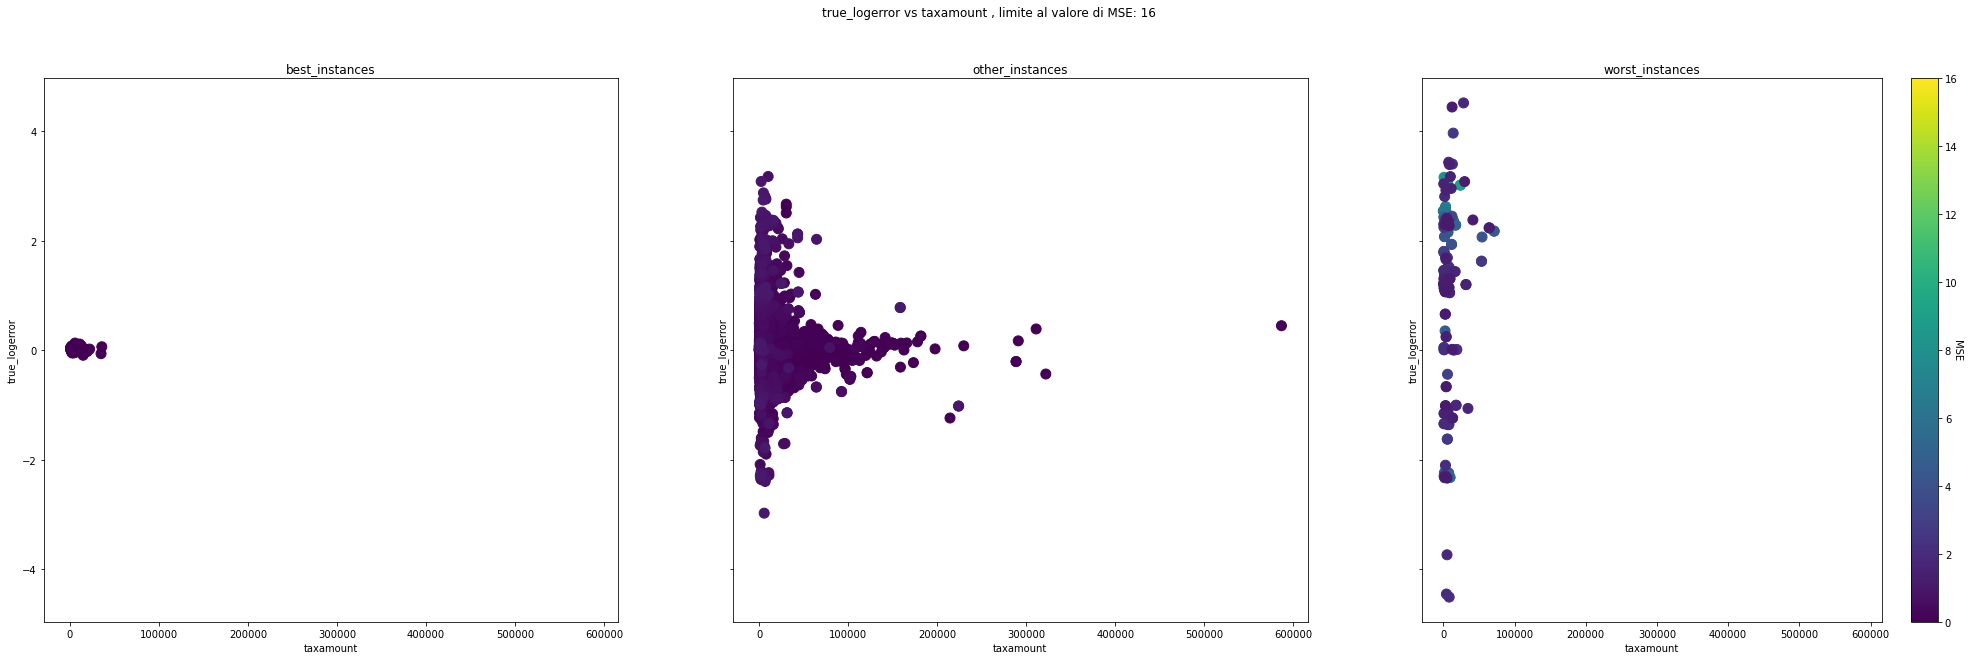

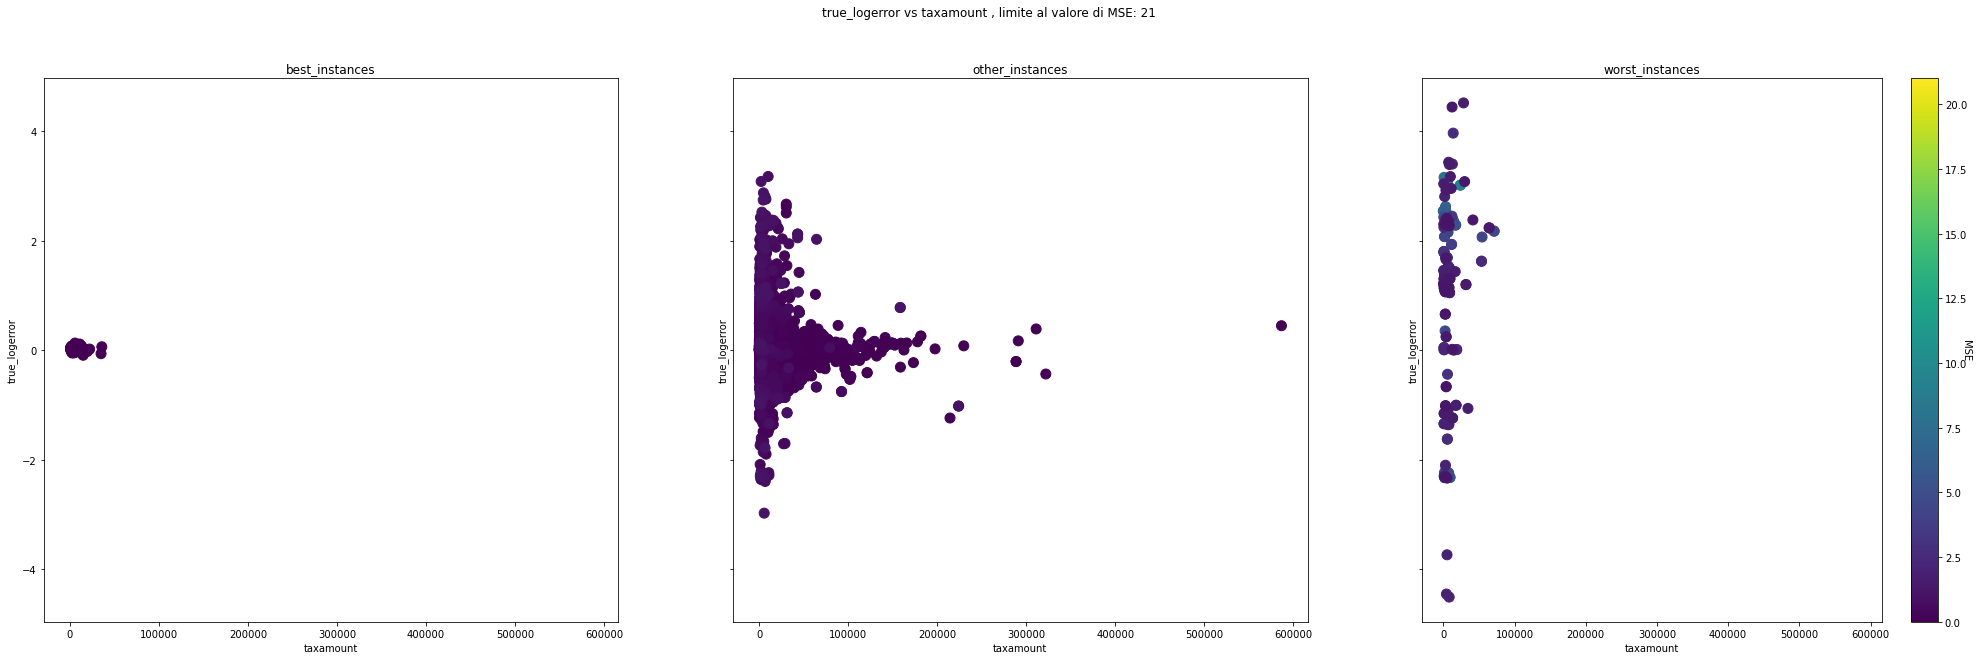

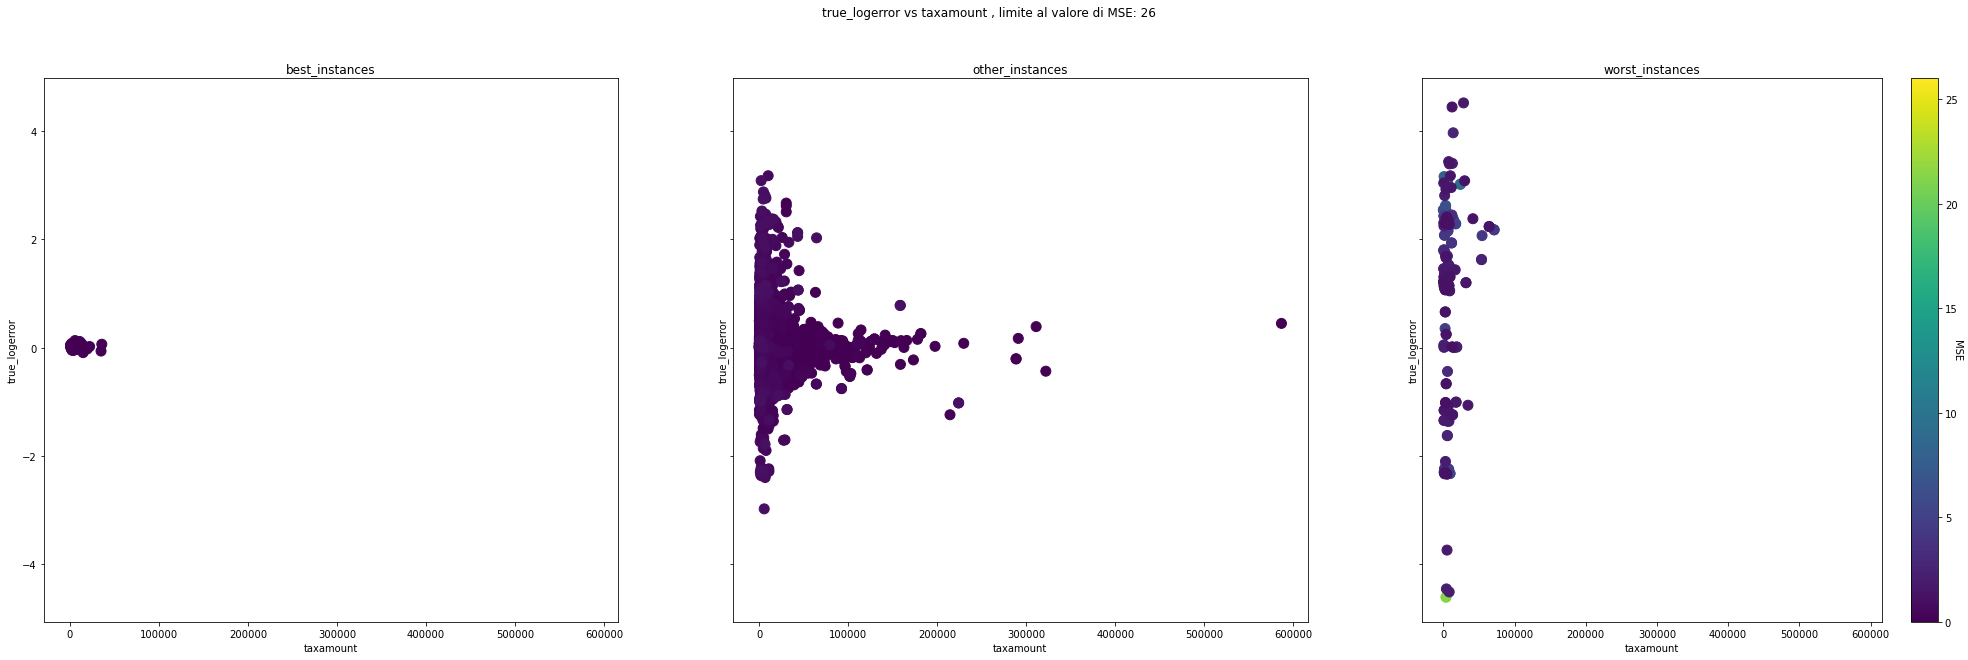

In [103]:
for i in range(1,30,5):
    plot_var("taxamount",i)

In [104]:
#plot valori_reali vs valori_stimati
import matplotlib.lines as mlines

def plot_pred():

    """
    Funzione che genera il grafico `pred_logerror vs true_logerror`.
    """
    
    fig,ax=plt.subplots(ncols=3,figsize=(40,15),sharex=True,sharey=True)
    
    fig.suptitle('pred_logerror vs true_logerror')
    
    ax[0].scatter(best_instances_Y["logerror"],best_instances_Y_pred[0],s=10)
    
    
    ax[2].scatter(worst_instances_Y.loc[worst_instances_mse.index]["logerror"],
                       worst_instances_Y_pred.loc[worst_instances_mse.index][0],
                       s=10)
    
    ax[1].scatter(other_instances_Y["logerror"],other_instances_Y_pred[0],s=10)
    
    ax[0].set_title("best_instances")
    ax[1].set_title("other_instances")
    ax[2].set_title("worst_instances")
    
    for e in ax:
        e.set_xlabel("true_logerror")
        e.set_ylabel("pred_logerror")
        
        line=mlines.Line2D([0, 1], [0, 1], color='red')
        line.set_transform(e.transAxes)
        e.add_line(line)

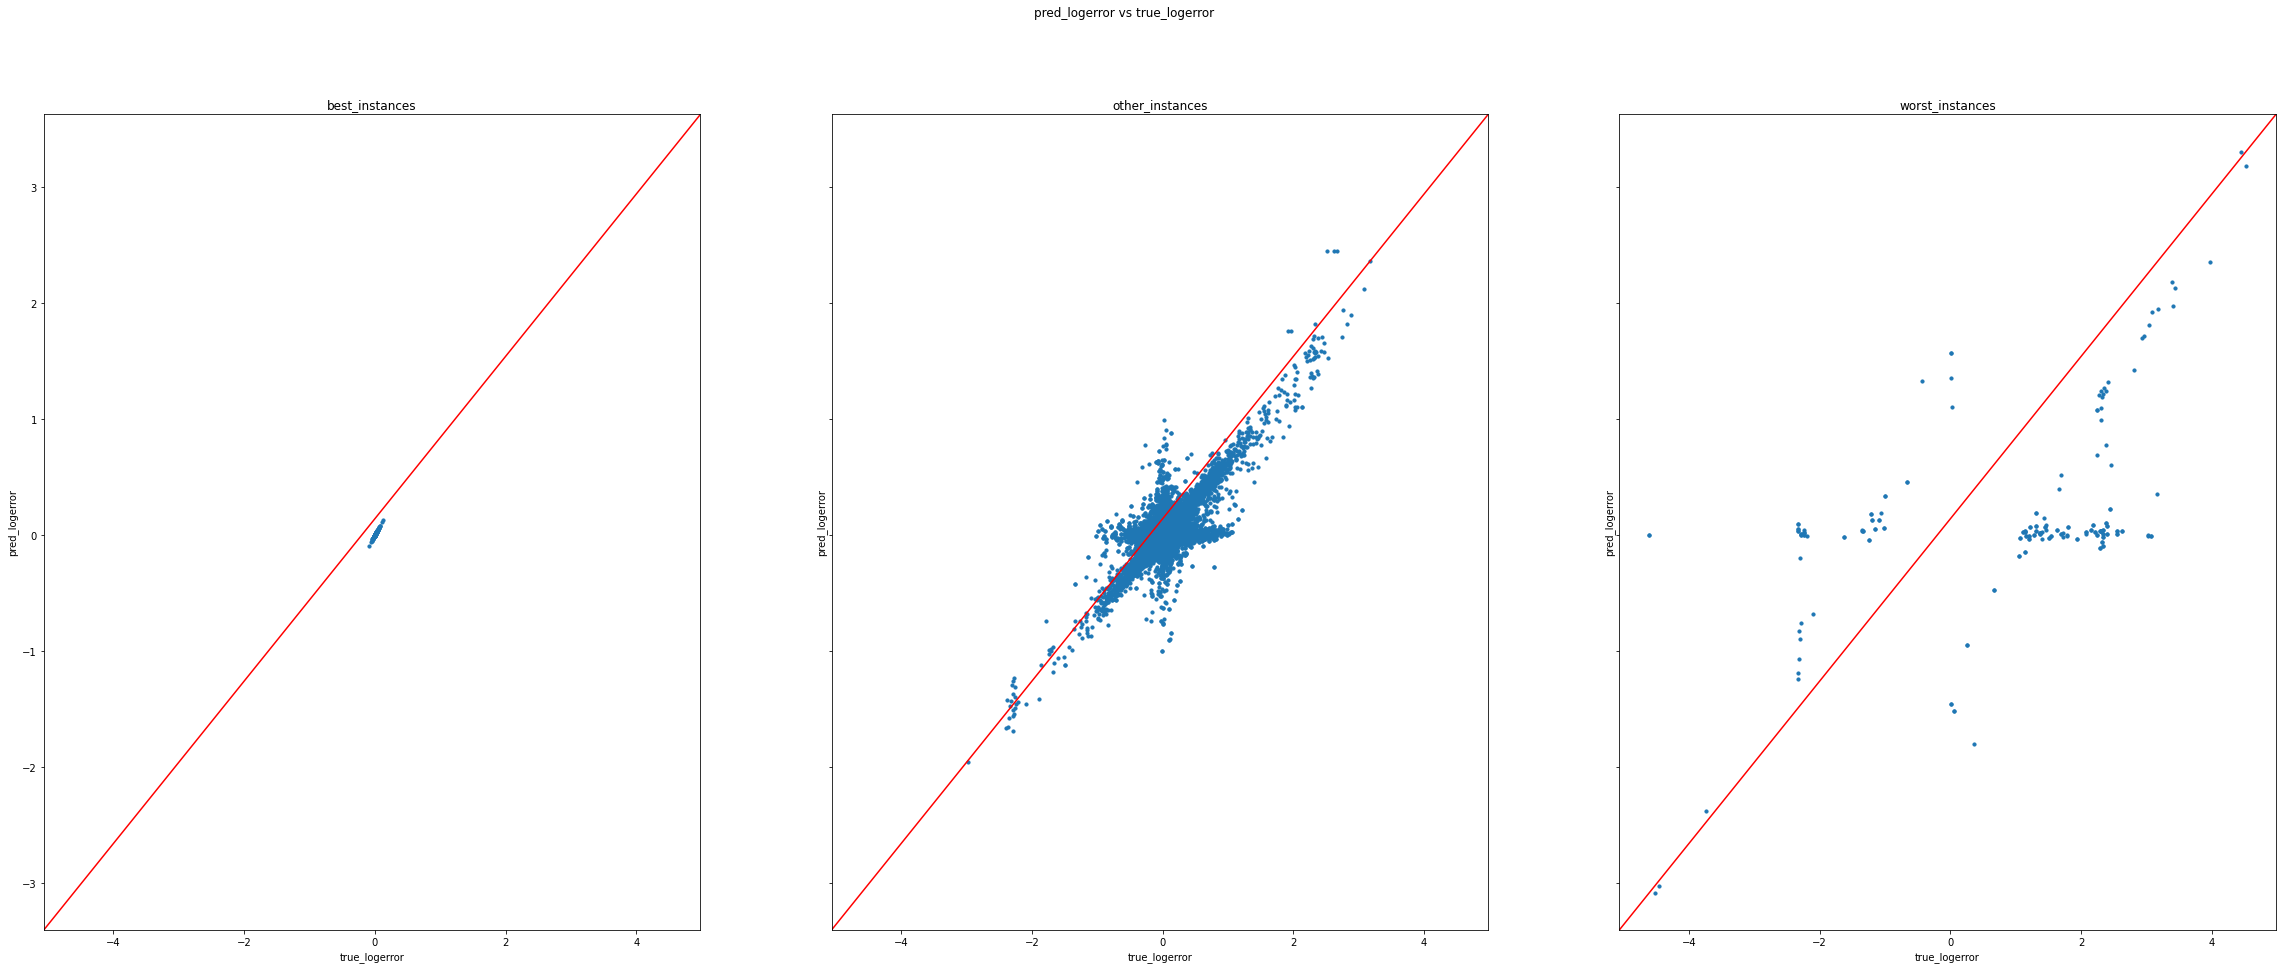

In [105]:
plot_pred()

In [106]:
#plot valori_stimati vs residui

def plot_res(limit):
    
    """
    Funzione che genera il grafico `pred_logerror vs residui`, limitando il valore massimo del MSE per una migliore visualizzazione.

    Args:
        limit (int): limite superiore al valore del MSE per una migliore visualizzazione.
    """
    
    fig,ax=plt.subplots(ncols=3,figsize=(40,10),sharex=True,sharey=True)
    
    fig.suptitle('pred_logerror vs residui, limite MSE: '+str(limit))
    
    ax[0].scatter(best_instances_Y_pred[0],best_instances_Y["logerror"]-best_instances_Y_pred[0],s=100,c=best_instances_mse,vmin=0,vmax=limit)
    
    ax_2=ax[2].scatter(worst_instances_Y_pred.loc[worst_instances_mse[worst_instances_mse[0]<limit].index][0],
                       worst_instances_Y.loc[worst_instances_mse[worst_instances_mse[0]<limit].index]["logerror"]-worst_instances_Y_pred.loc[worst_instances_mse[worst_instances_mse[0]<limit].index][0],
                       s=100,c=worst_instances_mse.loc[worst_instances_mse[worst_instances_mse[0]<limit].index],vmin=0,vmax=limit)
    
    ax[1].scatter(other_instances_Y_pred[0],other_instances_Y["logerror"]-other_instances_Y_pred[0],s=100,c=other_instances_mse,vmin=0,vmax=limit)
    
    ax[0].set_title("best_instances")
    ax[1].set_title("other_instances")
    ax[2].set_title("worst_instances")
    
    cbar=plt.colorbar(ax_2)
    cbar.ax.set_ylabel('MSE', rotation=270)
    
    for e in ax:
        e.set_xlabel('residui')
        e.set_ylabel("pred_logerror")
    
    

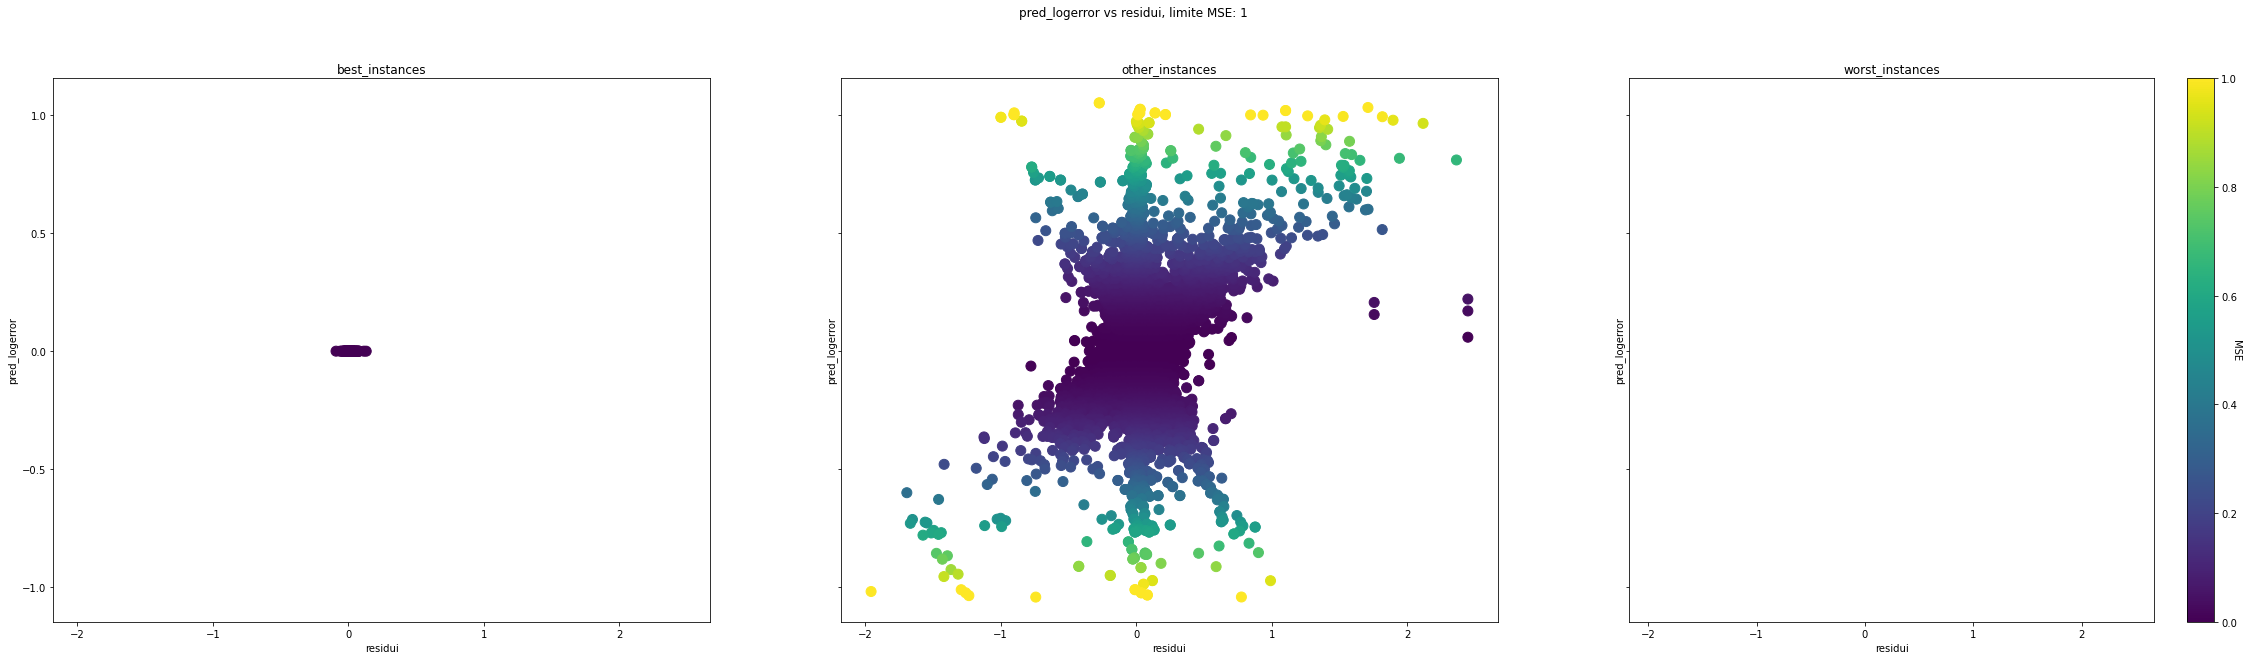

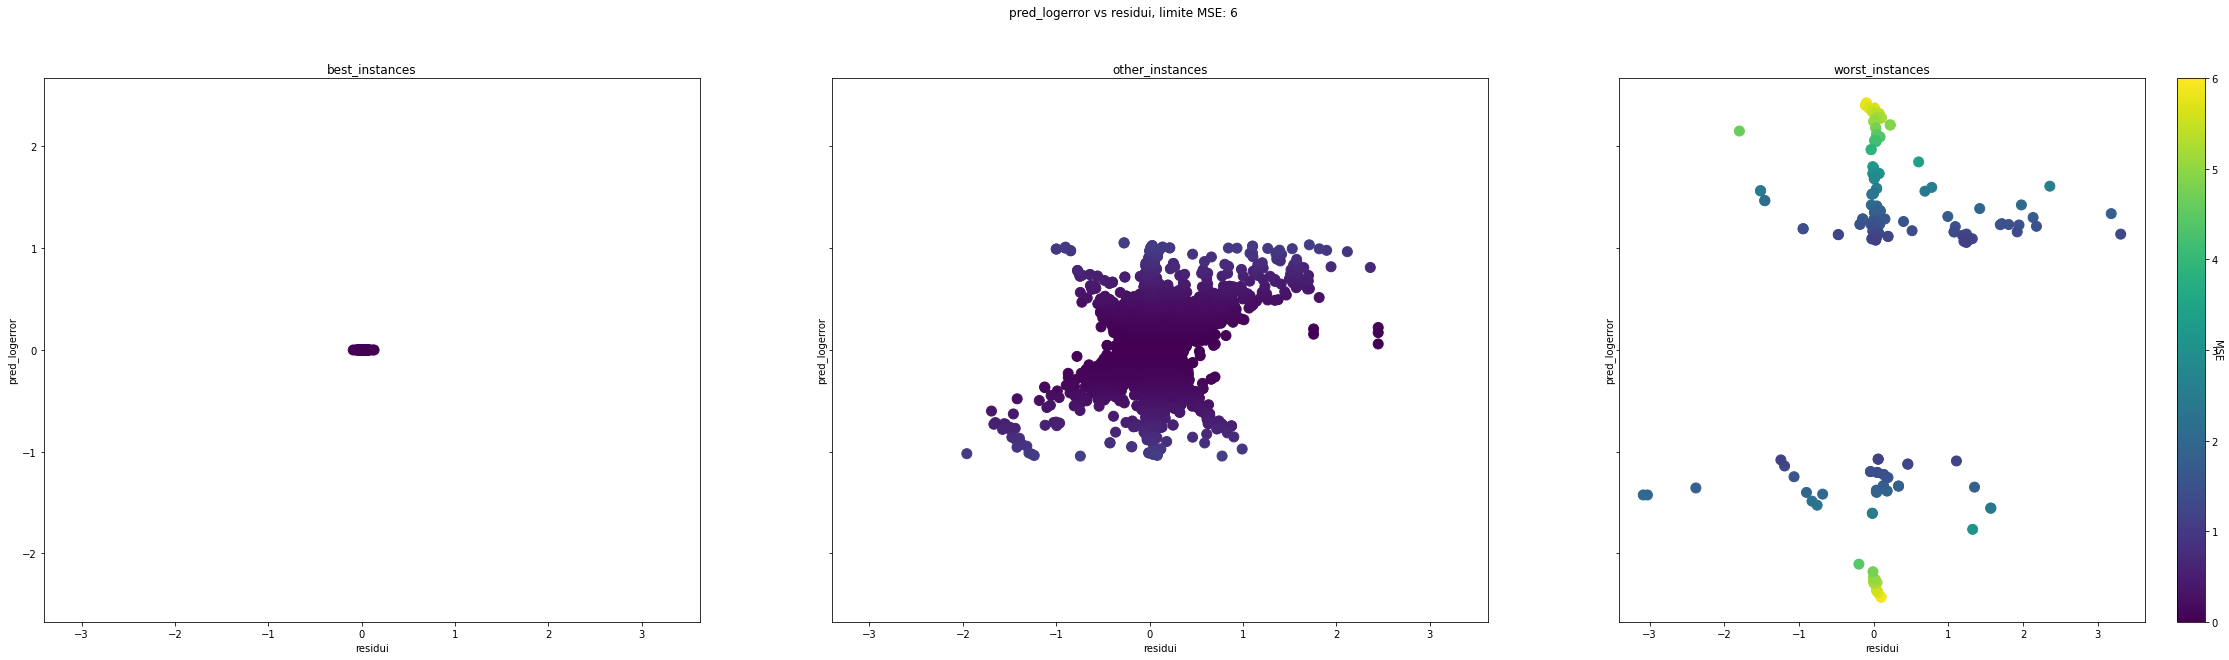

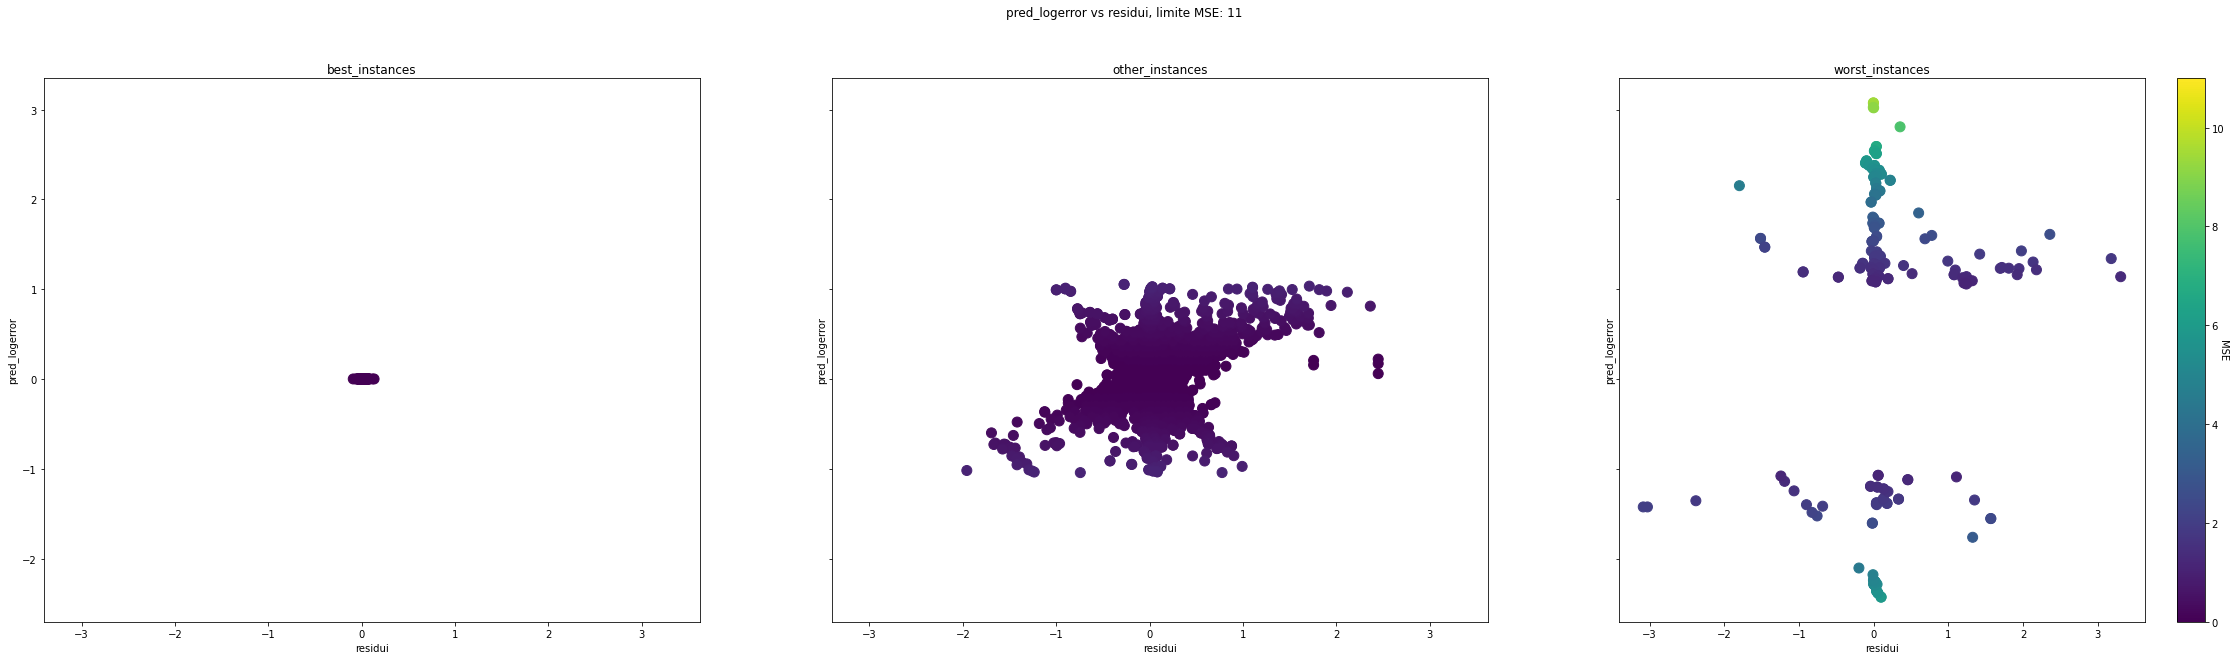

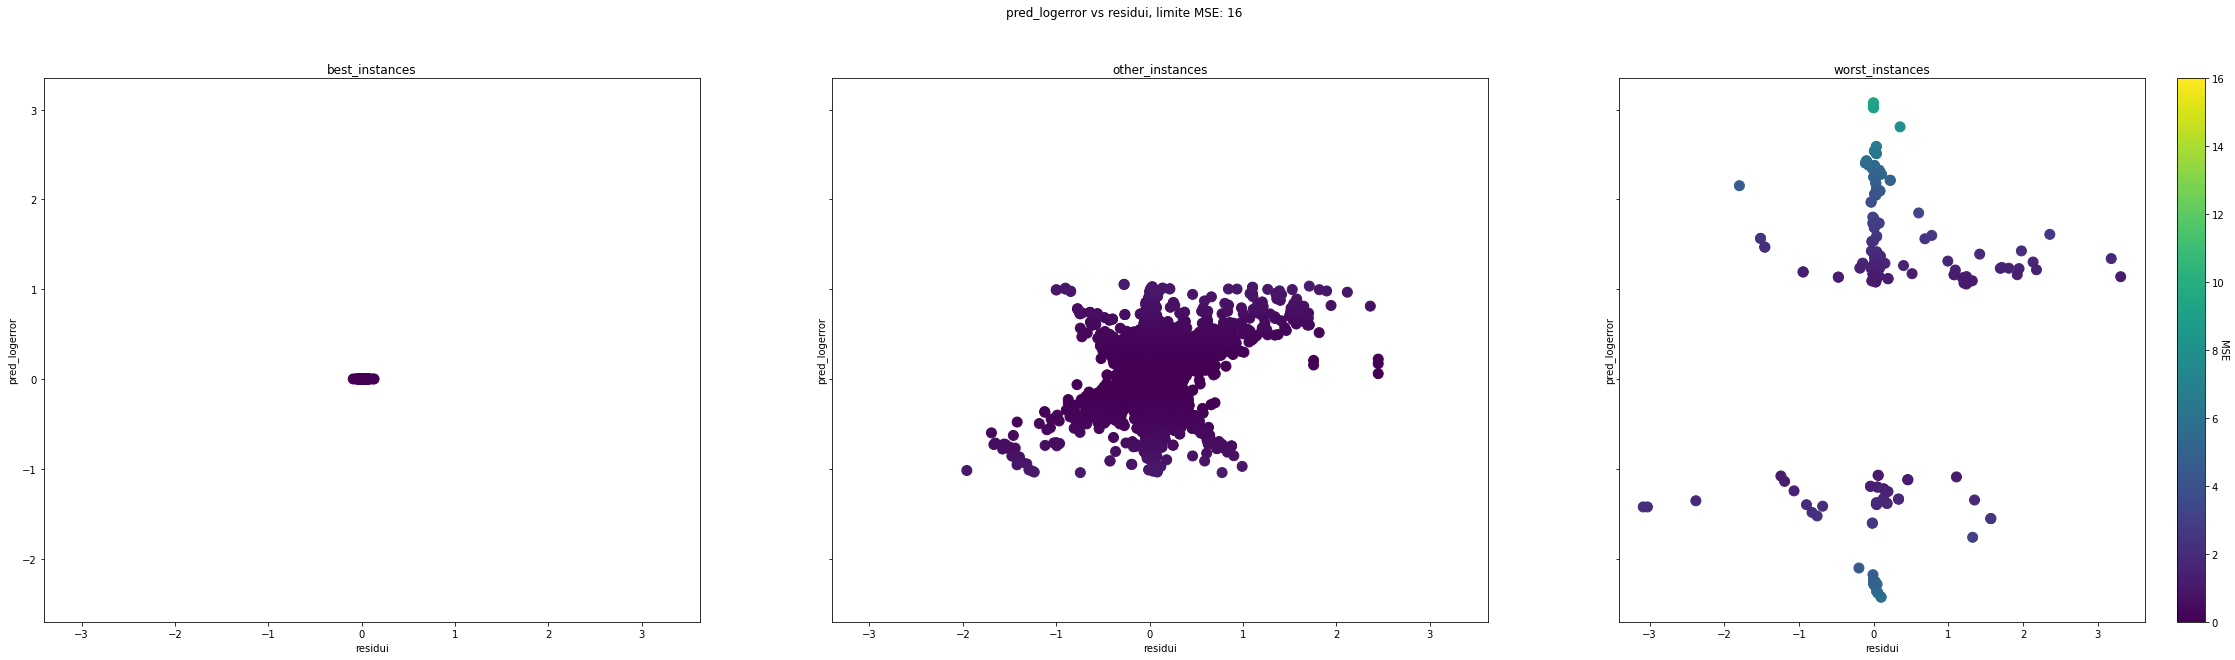

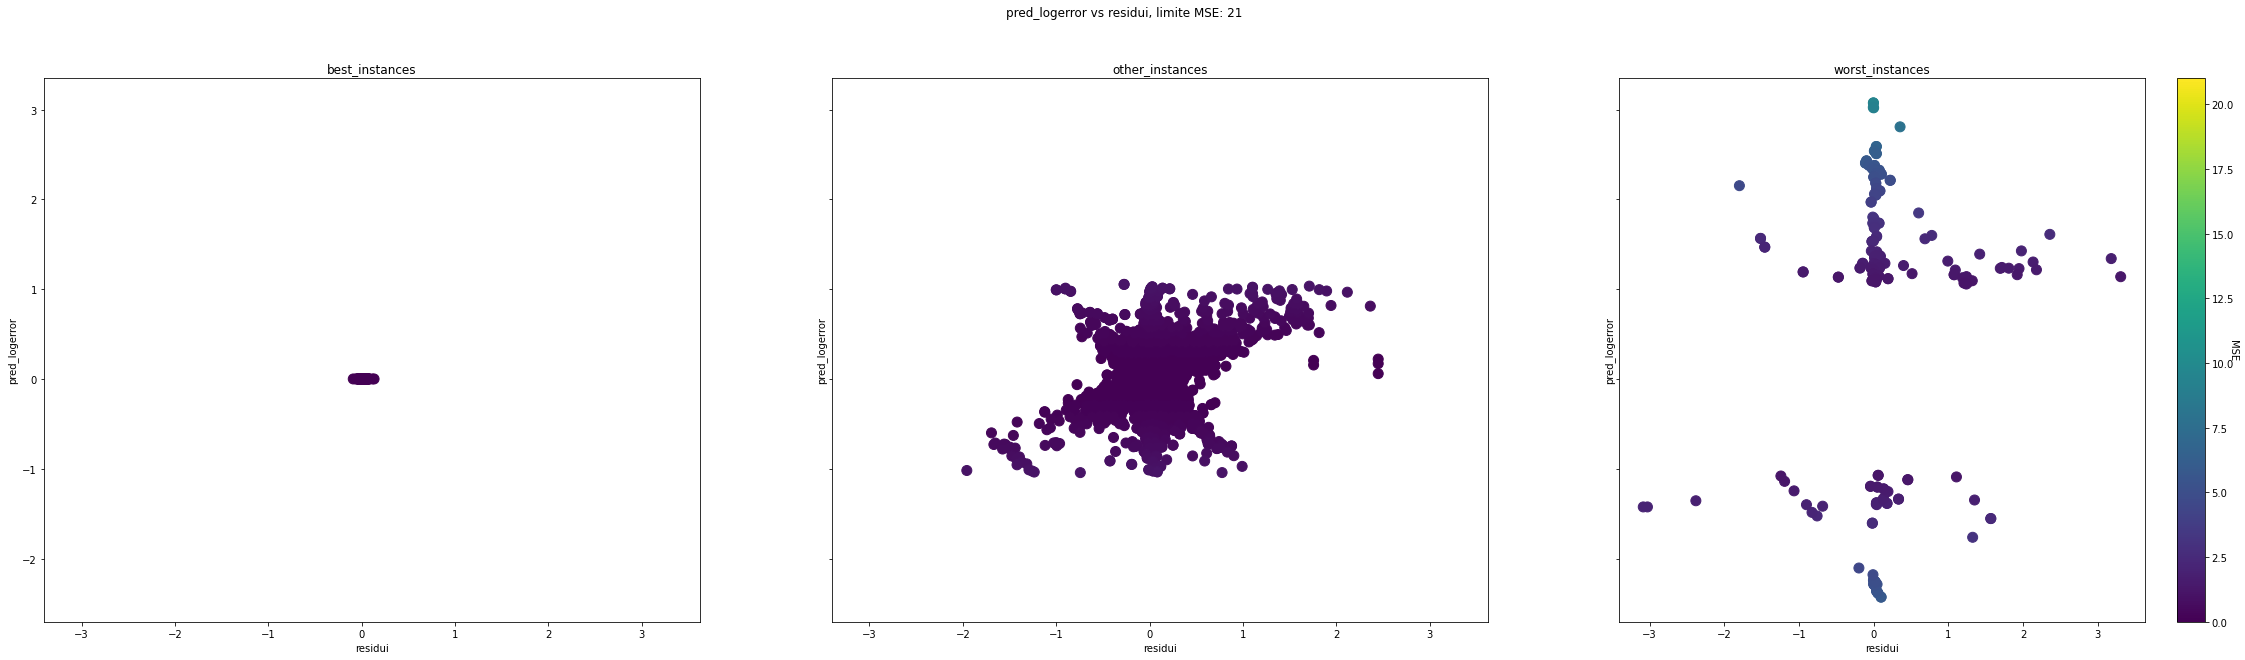

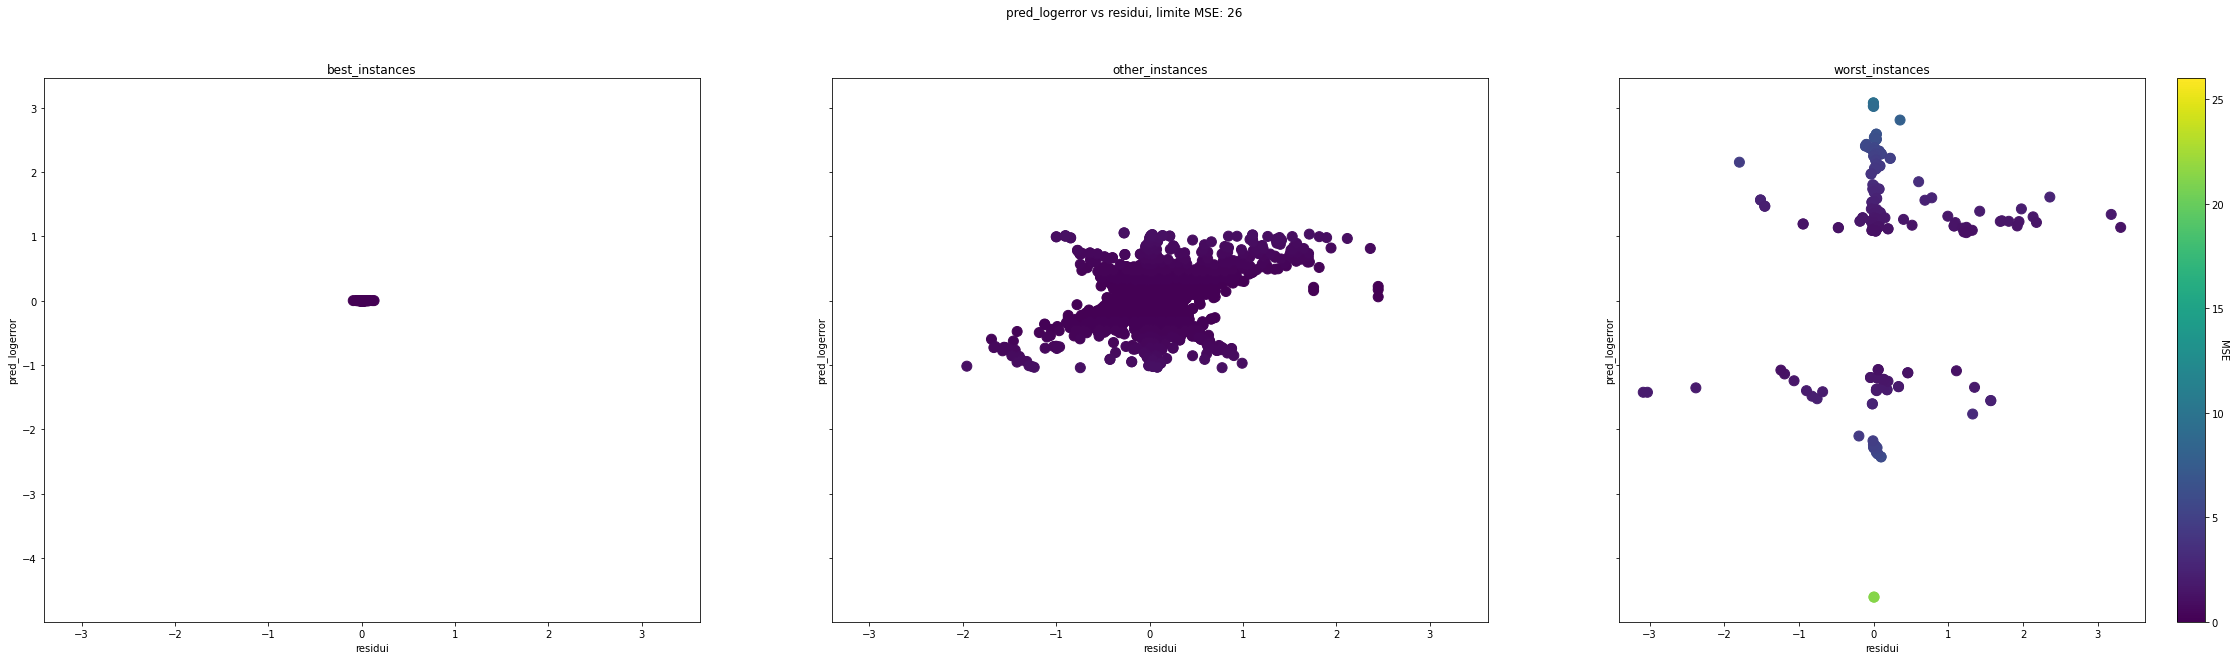

In [107]:
for i in range(1,30,5):
    plot_res(i)

In [114]:
print("mse istanze migliori: ",best_instances_mse[0].mean())
print("mse istanze rimanenti ",other_instances_mse[0].mean())
print("mse istanze peggiori ",worst_instances_mse[0].mean())

mse istanze migliori:  1.4960161769128593e-09
mse istanze rimanenti  0.008705927217671036
mse istanze peggiori  3.273862891636182
